<a href="https://colab.research.google.com/github/henrimbassi12/7697016-Front-End.1/blob/main/Tests_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(df_new.columns.tolist())

['Date', 'Technicien_GFI', 'Division', 'Secteur', 'Partenaire', 'Ville', 'Nom_Client', 'Nom_PDV', 'Tel_BARMAN', 'Quartier', 'Localisation', 'Information_Frigo', 'Type_Frigo', 'AF / NF', 'Branding', 'Serial_Number', 'Tag_Number', 'Securité ( Disjoncteur / Régulateur )', 'Taux_remplissage (en %)', 'Eclairage (O / N )', 'Température (en °C)', 'Linéaire (1 / 0)', 'Tension (V)', 'Intensité avant entretien (en A)', 'Intensité après entretien (en A)', "Purge du circuit d'évaluation des eaux", "Soufflage des parties actives à l'air"]


In [ ]:
!pip install flask flask-ngrok


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving gulfmaintain_model.pkl to gulfmaintain_model.pkl


In [ ]:
import pickle

# Charger le fichier .pkl (nom à adapter si besoin)
with open("gulfmaintain_model.pkl", "rb") as f:
    model = pickle.load(f)

print("✅ Modèle chargé avec succès")


✅ Modèle chargé avec succès


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
import pandas as pd

# Charger le dataset après importation
df = pd.read_csv("gulfmaintain_ia_dataset.csv")

# Afficher les colonnes disponibles
print("✅ Données chargées :")
print(df.columns)

# Sélection des colonnes comme features (X)
X = df[['equipment_type', 'zone', 'failure_type', 'recurrence_count']]

# Exemple : utiliser 'status' comme cible (à adapter selon ton projet)
y = df['status']

print("✅ Forme des données :")
print("X.shape =", X.shape)
print("y.unique() =", y.unique())



✅ Données chargées :
Index(['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type',
       'intervention_date', 'equipment_age_years', 'recurrence_count',
       'intervention_duration_hr', 'status', 'avg_temperature'],
      dtype='object')
✅ Forme des données :
X.shape = (200, 4)
y.unique() = ['Non résolu' 'Résolu' 'En cours']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# On crée un encodeur pour chaque colonne catégorielle
encoders = {}
for col in ['equipment_type', 'zone', 'failure_type']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le  # on stocke pour décode plus tard si besoin

# Même chose pour la cible
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

print("✅ X après encodage :\n", X.head())
print("✅ y_encoded :", y_encoded[:5])
print("✅ Classes cibles :", target_encoder.classes_)


✅ X après encodage :
    equipment_type  zone  failure_type  recurrence_count
0               1     3             4                 5
1               0     2             2                 5
2               2     2             2                 3
3               3     1             1                 4
4               2     0             4                 5
✅ y_encoded : [1 1 1 2 0]
✅ Classes cibles : ['En cours' 'Non résolu' 'Résolu']


<ipython-input-11-ce2210296364>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-11-ce2210296364>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-11-ce2210296364>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle

# 1. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 2. Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Évaluation
y_pred = model.predict(X_test)
print("📊 Rapport de classification :\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# 4. Sauvegarde du modèle
with open("gulfmaintain_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Modèle sauvegardé dans 'gulfmaintain_model.pkl'")


📊 Rapport de classification :
               precision    recall  f1-score   support

    En cours       0.50      0.56      0.53        16
  Non résolu       0.38      0.33      0.35         9
      Résolu       0.29      0.27      0.28        15

    accuracy                           0.40        40
   macro avg       0.39      0.39      0.39        40
weighted avg       0.39      0.40      0.39        40

✅ Modèle sauvegardé dans 'gulfmaintain_model.pkl'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

# Chargement du dataset
df = pd.read_csv("gulfmaintain_ia_dataset.csv")
print("✅ Données chargées :")
print(df.columns)


✅ Données chargées :
Index(['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type',
       'intervention_date', 'equipment_age_years', 'recurrence_count',
       'intervention_duration_hr', 'status', 'avg_temperature'],
      dtype='object')


In [ ]:
# Sélection de features améliorées
features = [
    'equipment_type', 'zone', 'failure_type', 'recurrence_count',
    'equipment_age_years', 'intervention_duration_hr',
    'avg_temperature', 'technician'
]

X = df[features].copy()
y = df['status']

# Encodage automatique
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

y_encoded = le.fit_transform(y)
print("✅ Encodage terminé.")


✅ Encodage terminé.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Rapport
print("\n📊 Nouveau rapport de classification :")
print(classification_report(y_test, y_pred, target_names=le.classes_))



📊 Nouveau rapport de classification :
              precision    recall  f1-score   support

    En cours       0.43      0.56      0.49        16
  Non résolu       0.00      0.00      0.00         9
      Résolu       0.45      0.33      0.38        15

    accuracy                           0.35        40
   macro avg       0.29      0.30      0.29        40
weighted avg       0.34      0.35      0.34        40



In [ ]:
with open("gulfmaintain_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Nouveau modèle sauvegardé sous 'gulfmaintain_model.pkl'")


✅ Nouveau modèle sauvegardé sous 'gulfmaintain_model.pkl'


In [ ]:
# One-Hot Encoding pour les variables catégorielles
X_encoded = pd.get_dummies(df[features])
print("✅ One-Hot Encoding appliqué")


✅ One-Hot Encoding appliqué


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n📊 Rapport de classification avec One-Hot Encoding :")
print(classification_report(y_test, y_pred, target_names=le.classes_))



📊 Rapport de classification avec One-Hot Encoding :
              precision    recall  f1-score   support

    En cours       0.27      0.25      0.26        16
  Non résolu       0.00      0.00      0.00         9
      Résolu       0.18      0.20      0.19        15

    accuracy                           0.17        40
   macro avg       0.15      0.15      0.15        40
weighted avg       0.17      0.17      0.17        40



In [ ]:
import numpy as np
unique, counts = np.unique(y_encoded, return_counts=True)
dict(zip(le.inverse_transform(unique), counts))


{'En cours': np.int64(75), 'Non résolu': np.int64(55), 'Résolu': np.int64(70)}

In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import pickle

# Charger les données
df = pd.read_csv("gulfmaintain_ia_dataset.csv")

# Sélection des colonnes utiles (à ajuster si besoin)
features = ['equipment_type', 'zone', 'failure_type', 'recurrence_count']
target = 'status'

X_raw = df[features]
y_raw = df[target]

# One-Hot Encoding des colonnes catégorielles
X_encoded = pd.get_dummies(X_raw, columns=['equipment_type', 'zone', 'failure_type'])

# Conversion des classes cibles en entiers
y_classes = y_raw.unique()
class_mapping = {label: idx for idx, label in enumerate(y_classes)}
y_encoded = y_raw.map(class_mapping)

print("✅ Classes :", class_mapping)

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Entraînement du modèle XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Prédictions et rapport de classification
y_pred = model.predict(X_test)
print("📊 Rapport de classification avec XGBoost :")
print(classification_report(y_test, y_pred, target_names=list(class_mapping.keys())))

# Sauvegarde du modèle
with open("gulfmaintain_model_xgboost.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Modèle XGBoost sauvegardé sous 'gulfmaintain_model_xgboost.pkl'")


✅ Classes : {'Non résolu': 0, 'Résolu': 1, 'En cours': 2}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Rapport de classification avec XGBoost :
              precision    recall  f1-score   support

  Non résolu       0.20      0.11      0.14         9
      Résolu       0.24      0.27      0.25        15
    En cours       0.39      0.44      0.41        16

    accuracy                           0.30        40
   macro avg       0.27      0.27      0.27        40
weighted avg       0.29      0.30      0.29        40

✅ Modèle XGBoost sauvegardé sous 'gulfmaintain_model_xgboost.pkl'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

# 1. Charger le dataset
df = pd.read_csv("gulfmaintain_ia_dataset.csv")

# 2. Extraire le mois de la date d’intervention
df['intervention_date'] = pd.to_datetime(df['intervention_date'])
df['month'] = df['intervention_date'].dt.month

# 3. Définir les features et la cible
features = ['equipment_type', 'zone', 'failure_type',
            'recurrence_count', 'equipment_age_years',
            'intervention_duration_hr', 'avg_temperature', 'month']
X = df[features].copy()
y = df['status']  # 'Résolu', 'En cours', 'Non résolu'

# 4. Encoder les colonnes catégorielles
le = LabelEncoder()
for col in ['equipment_type', 'zone', 'failure_type']:
    X[col] = le.fit_transform(X[col])

# 5. Encoder les cibles (y)
y_encoded = LabelEncoder().fit_transform(y)
class_mapping = dict(zip(LabelEncoder().fit(y).classes_, range(len(set(y)))))

print("✅ Classes :", class_mapping)

# 6. Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 7. Entraînement du modèle XGBoost
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Prédictions et évaluation
y_pred = model.predict(X_test)
print("\n📊 Rapport de classification avec XGBoost + features enrichies :")
print(classification_report(y_test, y_pred, target_names=list(class_mapping.keys())))

# 9. Sauvegarde du modèle
joblib.dump(model, "gulfmaintain_model_xgboost_enriched.pkl")
print("\n✅ Nouveau modèle XGBoost sauvegardé sous 'gulfmaintain_model_xgboost_enriched.pkl'")


✅ Classes : {'En cours': 0, 'Non résolu': 1, 'Résolu': 2}

📊 Rapport de classification avec XGBoost + features enrichies :
              precision    recall  f1-score   support

    En cours       0.32      0.38      0.34        16
  Non résolu       0.20      0.22      0.21         9
      Résolu       0.27      0.20      0.23        15

    accuracy                           0.28        40
   macro avg       0.26      0.27      0.26        40
weighted avg       0.27      0.28      0.27        40


✅ Nouveau modèle XGBoost sauvegardé sous 'gulfmaintain_model_xgboost_enriched.pkl'


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib

# Pipeline (optionnel si tu veux normaliser certaines données numériques)
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Normalisation (utile si tu as des features numériques variées)
    ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss'))
])

# Grille des hyperparamètres à tester
param_grid = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
}

# Lancement de la recherche par validation croisée
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Entraînement
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("✅ Meilleurs paramètres :", grid_search.best_params_)

# Évaluation du meilleur modèle
y_pred = grid_search.predict(X_test)
print("\n📊 Rapport de classification (GridSearch) :\n", classification_report(y_test, y_pred, target_names=['En cours', 'Non résolu', 'Résolu']))

# Sauvegarde du meilleur modèle
joblib.dump(grid_search.best_estimator_, "gulfmaintain_model_xgboost_tuned.pkl")
print("\n✅ Modèle XGBoost optimisé sauvegardé dans 'gulfmaintain_model_xgboost_tuned.pkl'")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Meilleurs paramètres : {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}

📊 Rapport de classification (GridSearch) :
               precision    recall  f1-score   support

    En cours       0.33      0.44      0.38        16
  Non résolu       0.14      0.11      0.12         9
      Résolu       0.42      0.33      0.37        15

    accuracy                           0.33        40
   macro avg       0.30      0.29      0.29        40
weighted avg       0.32      0.33      0.32        40


✅ Modèle XGBoost optimisé sauvegardé dans 'gulfmaintain_model_xgboost_tuned.pkl'


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Redéfinition manuelle du label_encoder avec l’ordre correct des classes
label_encoder = LabelEncoder()
label_encoder.classes_ = ['En cours', 'Non résolu', 'Résolu']

# Affichage du rapport de classification
print("\n📊 Rapport de classification (Réduction de dimension) :\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



📊 Rapport de classification (Réduction de dimension) :

              precision    recall  f1-score   support

    En cours       0.42      0.33      0.37        15
  Non résolu       0.15      0.18      0.17        11
      Résolu       0.33      0.36      0.34        14

    accuracy                           0.30        40
   macro avg       0.30      0.29      0.29        40
weighted avg       0.32      0.30      0.31        40



In [ ]:
print(model.named_steps)


{'scaler': StandardScaler(), 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)}


<Figure size 1000x600 with 0 Axes>

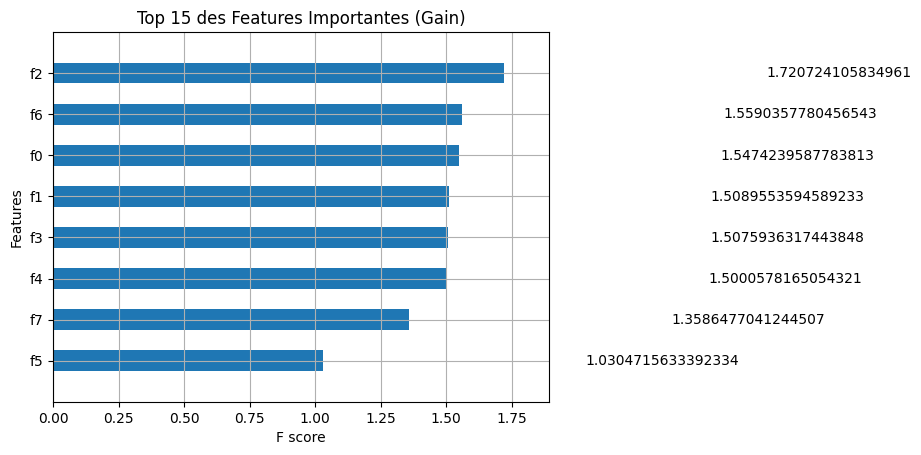

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Si tu connais la liste des colonnes originales utilisées après preprocessing
feature_names = X_train.columns  # si X_train est un DataFrame pandas
# sinon, donne une liste manuelle si tu as converti X_train en array

# Affichage de l’importance des variables
plt.figure(figsize=(10, 6))
plot_importance(
    model.named_steps["xgb"],
    importance_type='gain',
    max_num_features=15,
    height=0.5,
    show_values=True,
    title='Top 15 des Features Importantes (Gain)'
)
plt.show()


In [ ]:
feature_names = X_train.columns  # si X_train est un DataFrame


In [ ]:
feature_names = [
    'technicien_id', 'priorité', 'durée', 'jour_semaine',
    'mois', 'heure_intervention', 'type_panne', 'site_id'
]


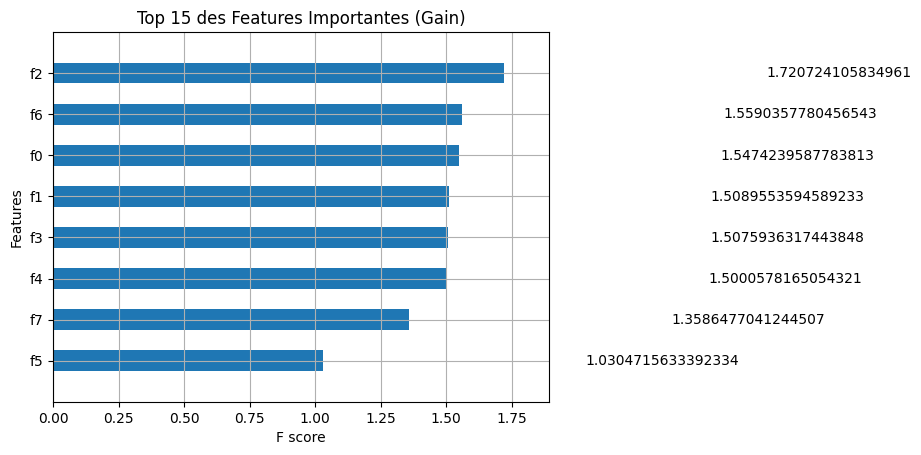

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

model_xgb = model.named_steps["xgb"]

# Appliquer manuellement les noms de features
model_xgb.feature_names = list(feature_names)
feature_names = [
    'technicien_id', 'priorité', 'durée', 'jour_semaine',
    'mois', 'heure_intervention', 'type_panne', 'site_id'
]

xgb.plot_importance(
    model_xgb,
    importance_type='gain',
    max_num_features=15,
    height=0.5,
    show_values=True,
    title='Top 15 des Features Importantes (Gain)'
)
plt.show()


In [ ]:
import pandas as pd

# Remplace 'ton_fichier.csv' par le vrai nom
df = pd.read_csv("gulfmaintain_ia_dataset.csv")

# Vérifie si tout est OK
print(df.head())
print(df.columns)


  equipment_id equipment_type       zone technician      failure_type  \
0     EQP-2097        Frigo B    Yaoundé     Daniel       Ventilateur   
1     EQP-9906        Frigo A     Garoua      Brice  Panne électrique   
2     EQP-9527        Frigo C     Garoua        Ali  Panne électrique   
3     EQP-3603        Frigo D     Douala      Brice      Fuite de gaz   
4     EQP-6296        Frigo C  Bafoussam    Cynthia       Ventilateur   

  intervention_date  equipment_age_years  recurrence_count  \
0        2024-12-04                    1                 5   
1        2025-02-23                   10                 5   
2        2024-05-16                    9                 3   
3        2024-12-21                    7                 4   
4        2025-05-10                    6                 5   

   intervention_duration_hr      status  avg_temperature  
0                         4  Non résolu             12.8  
1                         2  Non résolu              7.2  
2          

In [ ]:
import pandas as pd

# Remplace le chemin si nécessaire
df = pd.read_csv("/content/gulfmaintain_ia_dataset.csv")

# Afficher les colonnes pour vérifier le nom de la cible
print(df.columns.tolist())


['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type', 'intervention_date', 'equipment_age_years', 'recurrence_count', 'intervention_duration_hr', 'status', 'avg_temperature']


In [ ]:
X = df.drop("status", axis=1)
y = df["status"]


In [ ]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())


['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type', 'intervention_date', 'equipment_age_years', 'recurrence_count', 'intervention_duration_hr', 'status', 'avg_temperature']


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

# 📥 1. Chargement des données
df = pd.read_csv("gulfmaintain_ia_dataset.csv")

# 🧹 2. Nettoyage si nécessaire (exemple)
df.dropna(inplace=True)  # Supprime les lignes avec des valeurs manquantes

# 🎯 3. Définir la variable cible et les features
target_col = "status"
X = df.drop(target_col, axis=1)
y = df[target_col]

# 🔡 4. Encodage de la cible
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 💾 (Optionnel) Sauvegarde du label_encoder pour usage futur
joblib.dump(label_encoder, "label_encoder.pkl")

# 🔁 5. Définir colonnes numériques et catégorielles
numeric_features = ['equipment_age_years', 'recurrence_count', 'intervention_duration_hr', 'avg_temperature']
categorical_features = ['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type']

# 🧱 6. Construction du préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 🧠 7. Pipeline complet avec XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        learning_rate=0.01,
        n_estimators=100,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        random_state=42
    ))
])

# 🧪 8. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🚀 9. Entraînement du modèle
model.fit(X_train, y_train)

# 📈 10. Prédiction et rapport de classification
y_pred = model.predict(X_test)
print("\n📊 Rapport de classification :\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# 💾 11. Sauvegarde du modèle
joblib.dump(model, "gulfmaintain_model_xgboost_final.pkl")
print("✅ Modèle sauvegardé dans 'gulfmaintain_model_xgboost_final.pkl'")



📊 Rapport de classification :

              precision    recall  f1-score   support

    En cours       0.50      0.47      0.48        15
  Non résolu       0.18      0.18      0.18        11
      Résolu       0.40      0.43      0.41        14

    accuracy                           0.38        40
   macro avg       0.36      0.36      0.36        40
weighted avg       0.38      0.38      0.38        40

✅ Modèle sauvegardé dans 'gulfmaintain_model_xgboost_final.pkl'


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:04:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# 📦 Imports de base
import pandas as pd
from google.colab import files
import os
import joblib # Ajout de joblib ici car utilisé plus tard pour sauvegarder l'encoder

# --- Méthode 1 : Uploader le fichier (pour démarrer rapidement) ---
print("Uploader le fichier gulfmaintain_ia_dataset.csv...")
try:
    uploaded = files.upload()
    if 'gulfmaintain_ia_dataset.csv' in uploaded:
        print("✅ Fichier 'gulfmaintain_ia_dataset.csv' uploadé avec succès.")
        df = pd.read_csv('gulfmaintain_ia_dataset.csv')
        print("✅ Données chargées dans un DataFrame pandas.")
    else:
        print("❌ Erreur : Le fichier 'gulfmaintain_ia_dataset.csv' n'a pas été uploadé.")
        df = None
except Exception as e:
    print(f"❌ Erreur lors de l'upload ou du chargement du fichier : {e}")
    df = None


# --- Méthode 2 (Alternative Recommandée) : Monter Google Drive ---
# Décommentez ce bloc si votre fichier est sur Drive.
# C'est MIEUX pour la persistance des données et des modèles.

# from google.colab import drive
# try:
# #     drive.mount('/content/drive')
# #     print("✅ Google Drive monté avec succès.")
#     # Spécifiez le chemin complet vers votre fichier sur Google Drive
# #     file_path_in_drive = '/content/drive/My Drive/Votre_Dossier/gulfmaintain_ia_dataset.csv' # <<< Adaptez ce chemin !
# #     if os.path.exists(file_path_in_drive):
# #         df = pd.read_csv(file_path_in_drive)
# #         print(f"✅ Données chargées depuis Google Drive : {file_path_in_drive}")
# #     else:
# #         print(f"❌ Erreur : Le fichier n'a pas été trouvé sur Google Drive à l'emplacement spécifié : {file_path_in_drive}")
# #         df = None
# except Exception as e:
#     print(f"❌ Erreur lors du montage de Google Drive ou du chargement du fichier : {e}")
#     df = None


# --- Afficher les premières informations sur les données chargées ---
if df is not None:
    print("\n--- Informations sur les données chargées ---")
    print("Premières lignes :")
    display(df.head())
    print("\nInformation sur les colonnes :")
    df.info()
    print("\nRésumé statistique des colonnes numériques :")
    display(df.describe())
else:
    print("\nImpossible de charger les données. Veuillez vérifier le nom du fichier et la méthode de chargement.")

Uploader le fichier gulfmaintain_ia_dataset.csv...


Saving gulfmaintain_ia_dataset.csv to gulfmaintain_ia_dataset.csv
✅ Fichier 'gulfmaintain_ia_dataset.csv' uploadé avec succès.
✅ Données chargées dans un DataFrame pandas.

--- Informations sur les données chargées ---
Premières lignes :


,equipment_id,equipment_type,zone,technician,failure_type,intervention_date,equipment_age_years,recurrence_count,intervention_duration_hr,status,avg_temperature
0,EQP-2097,Frigo B,Yaoundé,Daniel,Ventilateur,2024-12-04,1,5,4,Non résolu,12.8
1,EQP-9906,Frigo A,Garoua,Brice,Panne électrique,2025-02-23,10,5,2,Non résolu,7.2
2,EQP-9527,Frigo C,Garoua,Ali,Panne électrique,2024-05-16,9,3,1,Non résolu,-3.3
3,EQP-3603,Frigo D,Douala,Brice,Fuite de gaz,2024-12-21,7,4,5,Résolu,6.7
4,EQP-6296,Frigo C,Bafoussam,Cynthia,Ventilateur,2025-05-10,6,5,1,En cours,9.7



Information sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   equipment_id              200 non-null    object 
 1   equipment_type            200 non-null    object 
 2   zone                      200 non-null    object 
 3   technician                200 non-null    object 
 4   failure_type              200 non-null    object 
 5   intervention_date         200 non-null    object 
 6   equipment_age_years       200 non-null    int64  
 7   recurrence_count          200 non-null    int64  
 8   intervention_duration_hr  200 non-null    int64  
 9   status                    200 non-null    object 
 10  avg_temperature           200 non-null    float64
dtypes: float64(1), int64(3), object(7)
memory usage: 17.3+ KB

Résumé statistique des colonnes numériques :


,equipment_age_years,recurrence_count,intervention_duration_hr,avg_temperature
count,200.00000,200.000000,200.000000,200.00000
mean,5.23500,2.440000,3.460000,5.50450
std,2.86896,1.643137,1.730135,5.63761
min,1.00000,0.000000,1.000000,-4.90000
25%,3.00000,1.000000,2.000000,0.30000
50%,5.00000,2.000000,4.000000,6.30000
75%,8.00000,4.000000,5.000000,9.90000
max,10.00000,5.000000,6.000000,15.00000


In [ ]:
# 🧹 Nettoyage et Ingénierie de Features
import pandas as pd
import numpy as np # numpy peut être utile pour certaines opérations

# Assurez-vous que df est chargé depuis la Cellule 1
if df is not None:
    print("\n--- Nettoyage et Ingénierie de Features ---")

    # Nettoyage si nécessaire (exemple : supprimer les lignes avec des valeurs manquantes)
    initial_rows = len(df)
    df.dropna(inplace=True)
    if len(df) < initial_rows:
        print(f"✅ Lignes avec valeurs manquantes supprimées. {initial_rows - len(df)} lignes retirées.")
    else:
        print("✅ Aucune valeur manquante trouvée (ou gérée autrement).")


    # ✨ Ingénierie de Features (basiques temporelles + nouvelles features ciblées)
    try:
        df['intervention_date'] = pd.to_datetime(df['intervention_date'])
        df['month'] = df['intervention_date'].dt.month
        df['day_of_week'] = df['intervention_date'].dt.dayofweek # Lundi=0, Dimanche=6
        df['hour'] = df['intervention_date'].dt.hour
        print("✅ Features temporelles basiques (mois, jour_semaine, heure) créées.")

        # Nouvelle feature d'interaction Recurrence * Duration
        df['recurrence_duration_interaction'] = df['recurrence_count'] * df['intervention_duration_hr']
        print("✅ Feature 'recurrence_duration_interaction' créée.")

        # Nouvelle feature binaire Technicien Ali et Panne Ventilateur
        df['technicien_ali_panne_ventilateur'] = ((df['technician'] == 'Ali') & (df['failure_type'] == 'Ventilateur')).astype(int)
        print("✅ Feature binaire 'technicien_ali_panne_ventilateur' créée.")

        # Feature binaire is_important_equipment
        # Utilisez la MÊME liste Equipment_ID importants que lors de l'analyse précédente
        important_equipment_ids = ['EQP-9814', 'EQP-9646', 'EQP-9857', 'EQP-9984'] # <<< Adaptez si votre liste était différente
        df['is_important_equipment'] = df['equipment_id'].isin(important_equipment_ids).astype(int)
        print("✅ Feature binaire 'is_important_equipment' créée.")

        print("\n✅ Ingénierie de features terminée.")

    except KeyError as e:
        print(f"❌ Erreur lors de la création des features : La colonne '{e}' est manquante dans le DataFrame.")
    except Exception as e:
        print(f"❌ Erreur inattendue lors de l'ingénierie de features : {e}")

else:
    print("❌ DataFrame 'df' non chargé. Exécutez la Cellule 1 d'abord.")

# Afficher les premières lignes avec les nouvelles colonnes
if df is not None:
    print("\nPremières lignes du DataFrame après ingénierie de features :")
    display(df.head())
    print("\nColonnes du DataFrame après ingénierie de features :")
    print(df.columns.tolist())


--- Nettoyage et Ingénierie de Features ---
✅ Aucune valeur manquante trouvée (ou gérée autrement).
✅ Features temporelles basiques (mois, jour_semaine, heure) créées.
✅ Feature 'recurrence_duration_interaction' créée.
✅ Feature binaire 'technicien_ali_panne_ventilateur' créée.
✅ Feature binaire 'is_important_equipment' créée.

✅ Ingénierie de features terminée.

Premières lignes du DataFrame après ingénierie de features :


,equipment_id,equipment_type,zone,technician,failure_type,intervention_date,equipment_age_years,recurrence_count,intervention_duration_hr,status,avg_temperature,month,day_of_week,hour,recurrence_duration_interaction,technicien_ali_panne_ventilateur,is_important_equipment
0,EQP-2097,Frigo B,Yaoundé,Daniel,Ventilateur,2024-12-04,1,5,4,Non résolu,12.8,12,2,0,20,0,0
1,EQP-9906,Frigo A,Garoua,Brice,Panne électrique,2025-02-23,10,5,2,Non résolu,7.2,2,6,0,10,0,0
2,EQP-9527,Frigo C,Garoua,Ali,Panne électrique,2024-05-16,9,3,1,Non résolu,-3.3,5,3,0,3,0,0
3,EQP-3603,Frigo D,Douala,Brice,Fuite de gaz,2024-12-21,7,4,5,Résolu,6.7,12,5,0,20,0,0
4,EQP-6296,Frigo C,Bafoussam,Cynthia,Ventilateur,2025-05-10,6,5,1,En cours,9.7,5,5,0,5,0,0



Colonnes du DataFrame après ingénierie de features :
['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type', 'intervention_date', 'equipment_age_years', 'recurrence_count', 'intervention_duration_hr', 'status', 'avg_temperature', 'month', 'day_of_week', 'hour', 'recurrence_duration_interaction', 'technicien_ali_panne_ventilateur', 'is_important_equipment']


In [ ]:
# 🎯 Définition de X, y, Encodage de la Cible, et Poids des Classes
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib # Pour sauvegarder le label encoder

# Assurez-vous que df est chargé et les features sont créées (Cellules 1 et 2)
if df is not None:
    print("\n--- Définition de X, y, Encodage de la Cible, et Poids des Classes ---")

    # 🎯 Définir la variable cible et les features
    target_col = "status"
    # Exclure la colonne cible et la date originale
    try:
        X = df.drop([target_col, 'intervention_date'], axis=1)
        y = df[target_col]
        print(f"✅ Variables X et y définies. X contient {X.shape[1]} features.")
    except KeyError as e:
         print(f"❌ Erreur : La colonne cible '{target_col}' ou 'intervention_date' est manquante dans le DataFrame.")
         X = None
         y = None


    # 🔡 Encodage de la cible
    if y is not None:
        try:
            label_encoder = LabelEncoder()
            y_encoded = label_encoder.fit_transform(y)
            print(f"✅ Cible '{target_col}' encodée en numérique.")
            print("Classes encodées :", label_encoder.classes_)
            # 💾 Sauvegarde du label_encoder
            joblib.dump(label_encoder, "label_encoder_final.pkl") # Nom de fichier recommandé pour la version finale
            print("✅ Label Encoder final sauvegardé dans 'label_encoder_final.pkl'.")

        except Exception as e:
             print(f"❌ Erreur lors de l'encodage de la cible : {e}")
             y_encoded = None
             label_encoder = None
    else:
        y_encoded = None
        label_encoder = None

    # ⚖️ Calculer les poids de classes sur l'ENSEMBLE COMPLET du dataset
    if y is not None:
        try:
            class_counts_full = df['status'].value_counts()
            class_weights_full = 1. / class_counts_full
            # Normalisation optionnelle
            class_weights_full = class_weights_full / class_weights_full.sum() * len(class_weights_full)
            # Mettre en forme pour le sample_weight de LightGBM (mappage par label encodé)
            sample_weights_full = y.map(class_weights_full)
            print("✅ Poids de classes calculés pour l'ensemble du dataset.")
            # print("Exemple de poids :", sample_weights_full.head()) # Décommenter pour voir

        except Exception as e:
            print(f"❌ Erreur lors du calcul des poids de classes : {e}")
            sample_weights_full = None
    else:
        sample_weights_full = None

else:
    print("❌ DataFrame 'df' non chargé. Exécutez la Cellule 1 d'abord.")


--- Définition de X, y, Encodage de la Cible, et Poids des Classes ---
✅ Variables X et y définies. X contient 15 features.
✅ Cible 'status' encodée en numérique.
Classes encodées : ['En cours' 'Non résolu' 'Résolu']
✅ Label Encoder final sauvegardé dans 'label_encoder_final.pkl'.
✅ Poids de classes calculés pour l'ensemble du dataset.


In [ ]:
# 🧠 Définition et Entraînement du Pipeline Final LightGBM
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder # Ajoutez OrdinalEncoder ici
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier # Utiliser LightGBM
import joblib # Pour la sauvegarde finale du modèle

# Assurez-vous que X, y_encoded, label_encoder, et sample_weights_full sont définis (Cellules 1, 2, 3)
if X is not None and y_encoded is not None and sample_weights_full is not None and label_encoder is not None:
    print("\n--- Définition et Entraînement du Pipeline Final LightGBM ---")

    # 🔁 Définir les listes de features pour le pipeline
    # Ces listes DOIVENT correspondre EXACTEMENT aux features que vous avez créées et sélectionnées dans X
    # Et correspondre aux listes utilisées pour le pipeline gagnant en CV (score 0.3272)
    numeric_features_lgbm_final = [
        'equipment_age_years', 'recurrence_count', 'intervention_duration_hr',
        'avg_temperature', 'month', 'day_of_week', 'hour',
        'recurrence_duration_interaction',
        'technicien_ali_panne_ventilateur',
        'is_important_equipment'
    ]
    categorical_features_lgbm_final = ['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type']

    # Vérifier que les features dans X correspondent aux listes définies
    all_features_in_X = set(X.columns)
    all_defined_features = set(numeric_features_lgbm_final + categorical_features_lgbm_final)

    if all_features_in_X != all_defined_features:
        print("❌ Erreur : Les colonnes dans X ne correspondent pas aux listes de features définies pour le pipeline.")
        print("Colonnes dans X:", sorted(list(all_features_in_X)))
        print("Features définies pour le pipeline:", sorted(list(all_defined_features)))
        print("Colonnes dans X mais pas dans les listes:", sorted(list(all_features_in_X - all_defined_features)))
        print("Features dans les listes mais pas dans X:", sorted(list(all_defined_features - all_features_in_X)))
        pipeline_lgbm_final = None # Impossible de continuer
    else:
        print("✅ Les colonnes de X correspondent aux listes de features définies pour le pipeline.")

        # 🧱 Construction du préprocesseur
        preprocessor_lgbm_final = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features_lgbm_final),
                ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features_lgbm_final)
            ],
            remainder='drop' # Assure que seules les colonnes spécifiées sont utilisées
        )

        # Déterminer les indices des colonnes catégorielles APRES le prétraitement
        # Fiter le préprocesseur une fois sur toutes les données (X) pour connaître les indices.
        # Ceci doit être fait pour connaître l'ordre et les indices pour cat_features
        try:
            preprocessor_lgbm_final.fit(X)
            # Récupérer les noms des features après le prétraitement pour référence
            processed_feature_names = preprocessor_lgbm_final.get_feature_names_out(X.columns)

            # Trouver les indices des colonnes catégorielles dans les données PRÉTRAITÉES
            cat_indices_after_preprocess_lgbm_final = [
                i for i, name in enumerate(processed_feature_names)
                if any(name.startswith(f'cat__{col_name}') for col_name in categorical_features_lgbm_final)
            ]

            print("✅ Préprocesseur défini et indices des features catégorielles après prétraitement calculés.")
            # print("Noms des features après prétraitement :", list(processed_feature_names)) # Décommenter pour voir
            # print("Indices des features catégorielles pour LightGBM :", cat_indices_after_preprocess_lgbm_final) # Décommenter pour voir


        except Exception as e:
            print(f"❌ Erreur lors de la définition ou du fitting du préprocesseur : {e}")
            pipeline_lgbm_final = None # Impossible de continuer


        # 🧠 Pipeline complet avec LightGBM et les meilleurs paramètres
        # Utilisez les MEILLEURS PARAMÈTRES que vous avez trouvés lors de la RandomizedSearchCV
        # pour le pipeline LightGBM avec features ciblées (celui qui a eu 0.3272 en CV)
        best_params_lgbm_final = {
            'colsample_bytree': 0.8, # <<< Remplacer par les vraies valeurs
            'learning_rate': 0.1,  # <<< Remplacer par les vraies valeurs
            'num_leaves': 31,      # <<< Remplacer par les vraies valeurs
            'max_depth': -1,       # <<< Remplacer par les vraies valeurs
            'min_child_samples': 20,# <<< Remplacer par les vraies valeurs
            'reg_alpha': 0,        # <<< Remplacer par les vraies valeurs
            'reg_lambda': 0,        # <<< Remplacer par les vraies valeurs
            'subsample': 1,         # <<< Remplacer par les vraies valeurs
            'n_estimators': 100    # <<< Remplacer par les vraies valeurs
        }

        pipeline_lgbm_final = Pipeline(steps=[
            ('preprocessor', preprocessor_lgbm_final),
            ('lgbm', LGBMClassifier(
                objective='multiclass',
                metric='multi_logloss',
                random_state=42,
                n_jobs=-1,
                # Passer cat_features ici avec les indices APRES le préprocesseur
                cat_features=cat_indices_after_preprocess_lgbm_final,
                **best_params_lgbm_final # Utiliser les meilleurs paramètres trouvés
                # class_weight sera géré via sample_weight sur l'ensemble complet
            ))
        ])

        # --- Entraînement du pipeline final sur l'ENSEMBLE COMPLET des données ---
        print("\n--- Entraînement du pipeline final sur l'ENSEMBLE COMPLET des données ---")
        try:
            # sample_weights_full doit être une Series ou ndarray de même longueur que X
            # Les valeurs doivent correspondre aux poids des classes de y_encoded
            # Assurez-vous que sample_weights_full est bien une Series mappée sur y
            pipeline_lgbm_final.fit(X, y_encoded, lgbm__sample_weight=sample_weights_full.values) # Passer les valeurs numpy de la Series
            print("✅ Pipeline LightGBM ciblé entraîné sur l'ensemble complet des données.")

        except Exception as e:
            print(f"❌ Erreur lors de l'entraînement du pipeline final : {e}")
            pipeline_lgbm_final = None # Assigner None en cas d'échec


else:
    print("❌ Variables X, y_encoded, sample_weights_full ou label_encoder non définies. Exécutez les Cellules 1, 2 et 3 d'abord.")
    pipeline_lgbm_final = None # Assigner None si les prérequis ne sont pas remplis


--- Définition et Entraînement du Pipeline Final LightGBM ---
✅ Les colonnes de X correspondent aux listes de features définies pour le pipeline.
✅ Préprocesseur défini et indices des features catégorielles après prétraitement calculés.

--- Entraînement du pipeline final sur l'ENSEMBLE COMPLET des données ---
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# 💾 Sauvegarde du Modèle Final et du Label Encoder sur Google Drive
import joblib
import os
from google.colab import drive

# Assurez-vous que Google Drive est monté
try:
    # Vérifier si déjà monté pour éviter le double montage
    if not os.path.exists('/content/drive'):
         drive.mount('/content/drive')
         print("✅ Google Drive monté.")
    else:
        print("✅ Google Drive semble déjà monté.")
except Exception as e:
    print(f"❌ Erreur lors du montage de Google Drive : {e}")
    # Impossible de sauvegarder sans Drive


# Assurez-vous que pipeline_lgbm_final et label_encoder sont définis (Cellules 3 et 4)
if pipeline_lgbm_final is not None and label_encoder is not None:
     print("\n--- Sauvegarde du Modèle Final et du Label Encoder ---")

     # --- Définir le chemin de sauvegarde sur Google Drive ---
     # >>> Remplacer 'MesModelesML' par le nom du dossier où vous voulez sauvegarder
     model_save_dir = "/content/drive/My Drive/MesModelesML"
     model_save_path = os.path.join(model_save_dir, "gulfmaintain_model_lgbm_targeted_final_full_data.pkl")
     encoder_save_path = os.path.join(model_save_dir, "label_encoder_final.pkl")

     # Créer le dossier si n'existe pas
     try:
         os.makedirs(model_save_dir, exist_ok=True)
         print(f"✅ Dossier de sauvegarde vérifié/créé : {model_save_dir}")
     except Exception as e:
         print(f"❌ Erreur lors de la création du dossier de sauvegarde : {e}")
         # Ne pas continuer la sauvegarde si le dossier ne peut être créé
         model_save_path = None
         encoder_save_path = None


     # --- Sauvegarder les fichiers ---
     if model_save_path is not None and encoder_save_path is not None:
         try:
             print(f"Sauvegarde du modèle dans : {model_save_path}")
             joblib.dump(pipeline_lgbm_final, model_save_path)

             print(f"Sauvegarde du Label Encoder dans : {encoder_save_path}")
             joblib.dump(label_encoder, encoder_save_path)

             print("\n✅ Modèle final et Label Encoder sauvegardés sur Google Drive.")

         except Exception as e:
             print(f"❌ Erreur lors de la sauvegarde des fichiers sur Google Drive : {e}")
             print("Vérifiez les permissions et l'espace disponible sur votre Drive.")

else:
    print("❌ Le pipeline final ou le Label Encoder ne sont pas définis. Exécutez les Cellules 3 et 4 d'abord.")

✅ Google Drive semble déjà monté.

--- Sauvegarde du Modèle Final et du Label Encoder ---
✅ Dossier de sauvegarde vérifié/créé : /content/drive/My Drive/MesModelesML
Sauvegarde du modèle dans : /content/drive/My Drive/MesModelesML/gulfmaintain_model_lgbm_targeted_final_full_data.pkl
Sauvegarde du Label Encoder dans : /content/drive/My Drive/MesModelesML/label_encoder_final.pkl

✅ Modèle final et Label Encoder sauvegardés sur Google Drive.


In [ ]:
# 📦 Imports de base
import pandas as pd
from google.colab import files
import os
import joblib # Ajout de joblib ici car utilisé plus tard pour sauvegarder l'encoder

# --- Méthode 1 : Uploader le fichier (pour démarrer rapidement) ---
print("Uploader le fichier gulfmaintain_ia_dataset.csv...")
try:
    uploaded = files.upload()
    # files.upload() retourne un dictionnaire des fichiers uploadés {nom_fichier: contenu}
    # Vérifier si l'upload a réussi en regardant si le dictionnaire n'est pas vide
    if uploaded: # <-- Vérifier si le dictionnaire 'uploaded' n'est pas vide
        # Obtenir le nom du fichier tel qu'il a été sauvegardé par Colab
        uploaded_filename = list(uploaded.keys())[0] # <-- Prendre le premier nom de fichier uploadé
        print(f"✅ Fichier '{uploaded_filename}' uploadé avec succès.")
        # Lire le fichier en utilisant le nom de fichier réel
        df = pd.read_csv(uploaded_filename) # <-- Utiliser le nom de fichier réel
        print("✅ Données chargées dans un DataFrame pandas.")
    else:
        print("❌ Erreur : L'upload du fichier a échoué.")
        df = None # Assigner None si le chargement échoue
except Exception as e:
    print(f"❌ Erreur lors de l'upload ou du chargement du fichier : {e}")
    df = None # Assigner None en cas d'erreur


# --- Méthode 2 (Alternative et Recommandée) : Monter Google Drive ---
# Décommentez ce bloc si votre fichier est sur Drive.
# C'est MIEUX pour la persistance des données et des modèles.

# from google.colab import drive
# try:
# #     drive.mount('/content/drive')
# #     print("✅ Google Drive monté avec succès.")
#     # Spécifiez le chemin complet vers votre fichier sur Google Drive
# #     file_path_in_drive = '/content/drive/My Drive/Votre_Dossier/gulfmaintain_ia_dataset.csv' # <<< Adaptez ce chemin !
# #     if os.path.exists(file_path_in_drive):
# #         df = pd.read_csv(file_path_in_drive)
# #         print(f"✅ Données chargées depuis Google Drive : {file_path_in_drive}")
# #     else:
# #         print(f"❌ Erreur : Le fichier n'a pas été trouvé sur Google Drive à l'emplacement spécifié : {file_path_in_drive}")
# #         df = None
# except Exception as e:
#     print(f"❌ Erreur lors du montage de Google Drive ou du chargement du fichier : {e}")
#     df = None


# --- Afficher les premières informations sur les données chargées ---
if df is not None:
    print("\n--- Informations sur les données chargées ---")
    print("Premières lignes :")
    display(df.head())
    print("\nInformation sur les colonnes :")
    df.info()
    print("\nRésumé statistique des colonnes numériques :")
    display(df.describe())
else:
    print("\nImpossible de charger les données. Veuillez vérifier le nom du fichier et la méthode de chargement.")

Uploader le fichier gulfmaintain_ia_dataset.csv...


Saving gulfmaintain_ia_dataset.csv to gulfmaintain_ia_dataset (4).csv
✅ Fichier 'gulfmaintain_ia_dataset (4).csv' uploadé avec succès.
✅ Données chargées dans un DataFrame pandas.

--- Informations sur les données chargées ---
Premières lignes :


,equipment_id,equipment_type,zone,technician,failure_type,intervention_date,equipment_age_years,recurrence_count,intervention_duration_hr,status,avg_temperature
0,EQP-2097,Frigo B,Yaoundé,Daniel,Ventilateur,2024-12-04,1,5,4,Non résolu,12.8
1,EQP-9906,Frigo A,Garoua,Brice,Panne électrique,2025-02-23,10,5,2,Non résolu,7.2
2,EQP-9527,Frigo C,Garoua,Ali,Panne électrique,2024-05-16,9,3,1,Non résolu,-3.3
3,EQP-3603,Frigo D,Douala,Brice,Fuite de gaz,2024-12-21,7,4,5,Résolu,6.7
4,EQP-6296,Frigo C,Bafoussam,Cynthia,Ventilateur,2025-05-10,6,5,1,En cours,9.7



Information sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   equipment_id              200 non-null    object 
 1   equipment_type            200 non-null    object 
 2   zone                      200 non-null    object 
 3   technician                200 non-null    object 
 4   failure_type              200 non-null    object 
 5   intervention_date         200 non-null    object 
 6   equipment_age_years       200 non-null    int64  
 7   recurrence_count          200 non-null    int64  
 8   intervention_duration_hr  200 non-null    int64  
 9   status                    200 non-null    object 
 10  avg_temperature           200 non-null    float64
dtypes: float64(1), int64(3), object(7)
memory usage: 17.3+ KB

Résumé statistique des colonnes numériques :


,equipment_age_years,recurrence_count,intervention_duration_hr,avg_temperature
count,200.00000,200.000000,200.000000,200.00000
mean,5.23500,2.440000,3.460000,5.50450
std,2.86896,1.643137,1.730135,5.63761
min,1.00000,0.000000,1.000000,-4.90000
25%,3.00000,1.000000,2.000000,0.30000
50%,5.00000,2.000000,4.000000,6.30000
75%,8.00000,4.000000,5.000000,9.90000
max,10.00000,5.000000,6.000000,15.00000


In [ ]:
# 🧹 Nettoyage et Ingénierie de Features
import pandas as pd
import numpy as np

# Assurez-vous que df est chargé depuis la Cellule 1
if df is not None:
    print("\n--- Nettoyage et Ingénierie de Features ---")

    # Nettoyage si nécessaire (exemple : supprimer les lignes avec des valeurs manquantes)
    initial_rows = len(df)
    df.dropna(inplace=True)
    if len(df) < initial_rows:
        print(f"✅ Lignes avec valeurs manquantes supprimées. {initial_rows - len(df)} lignes retirées.")
    else:
        print("✅ Aucune valeur manquante trouvée (ou gérée autrement).")


    # ✨ Ingénierie de Features (basiques temporelles + nouvelles features ciblées)
    try:
        df['intervention_date'] = pd.to_datetime(df['intervention_date'])
        df['month'] = df['intervention_date'].dt.month
        df['day_of_week'] = df['intervention_date'].dt.dayofweek # Lundi=0, Dimanche=6
        df['hour'] = df['intervention_date'].dt.hour
        print("✅ Features temporelles basiques (mois, jour_semaine, heure) créées.")

        # Features ciblées précédentes
        df['recurrence_duration_interaction'] = df['recurrence_count'] * df['intervention_duration_hr']
        print("✅ Feature 'recurrence_duration_interaction' créée.")
        df['technicien_ali_panne_ventilateur'] = ((df['technician'] == 'Ali') & (df['failure_type'] == 'Ventilateur')).astype(int)
        print("✅ Feature binaire 'technicien_ali_panne_ventilateur' créée.")
        important_equipment_ids = ['EQP-9814', 'EQP-9646', 'EQP-9857', 'EQP-9984']
        df['is_important_equipment'] = df['equipment_id'].isin(important_equipment_ids).astype(int)
        print("✅ Feature binaire 'is_important_equipment' créée.")


        # --- NOUVELLES FEATURES CIBLÉES basées sur les combinaisons catégorielles fréquentes dans les erreurs ---
        df['is_frigoD_douala_thermostat'] = ((df['equipment_type'] == 'Frigo D') & (df['zone'] == 'Douala') & (df['failure_type'] == 'Thermostat')).astype(int)
        print("✅ Nouvelle feature binaire 'is_frigoD_douala_thermostat' créée.")

        df['is_frigoA_yaounde_ali'] = ((df['equipment_type'] == 'Frigo A') & (df['zone'] == 'Yaoundé') & (df['technician'] == 'Ali')).astype(int)
        print("✅ Nouvelle feature binaire 'is_frigoA_yaounde_ali' créée.")

        # Ajoutez d'autres combinaisons si vous le jugez pertinent, par exemple :
        # df['is_frigoC_douala_ali'] = ((df['equipment_type'] == 'Frigo C') & (df['zone'] == 'Douala') & (df['technician'] == 'Ali')).astype(int)
        # print("✅ Nouvelle feature binaire 'is_frigoC_douala_ali' créée.")


        print("\n✅ Ingénierie de features étendue terminée.")

    except KeyError as e:
        print(f"❌ Erreur lors de la création des features : La colonne '{e}' est manquante dans le DataFrame.")
    except Exception as e:
        print(f"❌ Erreur inattendue lors de l'ingénierie de features : {e}")

else:
    print("❌ DataFrame 'df' non chargé. Exécutez la Cellule 1 d'abord.")

# Afficher les premières lignes avec les nouvelles colonnes
if df is not None:
    print("\nPremières lignes du DataFrame après ingénierie de features étendue :")
    display(df.head())
    print("\nColonnes du DataFrame après ingénierie de features étendue :")
    print(df.columns.tolist())


--- Nettoyage et Ingénierie de Features ---
✅ Aucune valeur manquante trouvée (ou gérée autrement).
✅ Features temporelles basiques (mois, jour_semaine, heure) créées.
✅ Feature 'recurrence_duration_interaction' créée.
✅ Feature binaire 'technicien_ali_panne_ventilateur' créée.
✅ Feature binaire 'is_important_equipment' créée.
✅ Nouvelle feature binaire 'is_frigoD_douala_thermostat' créée.
✅ Nouvelle feature binaire 'is_frigoA_yaounde_ali' créée.

✅ Ingénierie de features étendue terminée.

Premières lignes du DataFrame après ingénierie de features étendue :


,equipment_id,equipment_type,zone,technician,failure_type,intervention_date,equipment_age_years,recurrence_count,intervention_duration_hr,status,avg_temperature,month,day_of_week,hour,recurrence_duration_interaction,technicien_ali_panne_ventilateur,is_important_equipment,is_frigoD_douala_thermostat,is_frigoA_yaounde_ali
0,EQP-2097,Frigo B,Yaoundé,Daniel,Ventilateur,2024-12-04,1,5,4,Non résolu,12.8,12,2,0,20,0,0,0,0
1,EQP-9906,Frigo A,Garoua,Brice,Panne électrique,2025-02-23,10,5,2,Non résolu,7.2,2,6,0,10,0,0,0,0
2,EQP-9527,Frigo C,Garoua,Ali,Panne électrique,2024-05-16,9,3,1,Non résolu,-3.3,5,3,0,3,0,0,0,0
3,EQP-3603,Frigo D,Douala,Brice,Fuite de gaz,2024-12-21,7,4,5,Résolu,6.7,12,5,0,20,0,0,0,0
4,EQP-6296,Frigo C,Bafoussam,Cynthia,Ventilateur,2025-05-10,6,5,1,En cours,9.7,5,5,0,5,0,0,0,0



Colonnes du DataFrame après ingénierie de features étendue :
['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type', 'intervention_date', 'equipment_age_years', 'recurrence_count', 'intervention_duration_hr', 'status', 'avg_temperature', 'month', 'day_of_week', 'hour', 'recurrence_duration_interaction', 'technicien_ali_panne_ventilateur', 'is_important_equipment', 'is_frigoD_douala_thermostat', 'is_frigoA_yaounde_ali']


In [ ]:
# 🎯 Définition de X, y, Encodage de la Cible, et Poids des Classes
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib # Pour sauvegarder le label encoder

# Assurez-vous que df est chargé et les features sont créées (Cellules 1 et 2)
if df is not None:
    print("\n--- Définition de X, y, Encodage de la Cible, et Poids des Classes ---")

    # 🎯 Définir la variable cible et les features
    target_col = "status"
    # Exclure la colonne cible et la date originale
    try:
        X = df.drop([target_col, 'intervention_date'], axis=1)
        y = df[target_col]
        print(f"✅ Variables X et y définies. X contient {X.shape[1]} features.")
    except KeyError as e:
         print(f"❌ Erreur : La colonne cible '{target_col}' ou 'intervention_date' est manquante dans le DataFrame.")
         X = None
         y = None


    # 🔡 Encodage de la cible
    if y is not None:
        try:
            label_encoder = LabelEncoder()
            y_encoded = label_encoder.fit_transform(y)
            print(f"✅ Cible '{target_col}' encodée en numérique.")
            print("Classes encodées :", label_encoder.classes_)
            # 💾 Sauvegarde du label_encoder
            joblib.dump(label_encoder, "label_encoder_final.pkl") # Nom de fichier recommandé pour la version finale
            print("✅ Label Encoder final sauvegardé dans 'label_encoder_final.pkl'.")

        except Exception as e:
             print(f"❌ Erreur lors de l'encodage de la cible : {e}")
             y_encoded = None
             label_encoder = None
    else:
        y_encoded = None
        label_encoder = None

    # ⚖️ Calculer les poids de classes sur l'ENSEMBLE COMPLET du dataset
    if y is not None:
        try:
            class_counts_full = df['status'].value_counts()
            class_weights_full = 1. / class_counts_full
            # Normalisation optionnelle
            class_weights_full = class_weights_full / class_weights_full.sum() * len(class_weights_full)
            # Mettre en forme pour le sample_weight de LightGBM (mappage par label encodé)
            sample_weights_full = y.map(class_weights_full)
            print("✅ Poids de classes calculés pour l'ensemble du dataset.")
            # print("Exemple de poids :", sample_weights_full.head()) # Décommenter pour voir

        except Exception as e:
            print(f"❌ Erreur lors du calcul des poids de classes : {e}")
            sample_weights_full = None
    else:
        sample_weights_full = None

else:
    print("❌ DataFrame 'df' non chargé. Exécutez la Cellule 1 d'abord.")


--- Définition de X, y, Encodage de la Cible, et Poids des Classes ---
✅ Variables X et y définies. X contient 17 features.
✅ Cible 'status' encodée en numérique.
Classes encodées : ['En cours' 'Non résolu' 'Résolu']
✅ Label Encoder final sauvegardé dans 'label_encoder_final.pkl'.
✅ Poids de classes calculés pour l'ensemble du dataset.


In [ ]:
# 🧠 Définition et Entraînement du Pipeline Final LightGBM
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
import joblib
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

if X is not None and y_encoded is not None and sample_weights_full is not None and label_encoder is not None:
    print("\n--- Définition et Entraînement du Pipeline Final LightGBM ---")

    numeric_features_lgbm_final = [
        'equipment_age_years', 'recurrence_count', 'intervention_duration_hr',
        'avg_temperature', 'month', 'day_of_week', 'hour',
        'recurrence_duration_interaction',
        'technicien_ali_panne_ventilateur',
        'is_important_equipment',
        'is_frigoD_douala_thermostat',
        'is_frigoA_yaounde_ali'
        # Ajoutez ici les noms de toutes les autres nouvelles features binaires que vous avez créées
    ]
    categorical_features_lgbm_final = ['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type']

    all_features_in_X = set(X.columns)
    all_defined_features = set(numeric_features_lgbm_final + categorical_features_lgbm_final)

    expected_feature_count = len(numeric_features_lgbm_final) + len(categorical_features_lgbm_final)


    if all_features_in_X != all_defined_features or len(X.columns) != expected_feature_count:
        print("❌ Erreur : Les colonnes dans X ne correspondent pas aux listes de features définies pour le pipeline.")
        # ... (affichage des détails de l'erreur si nécessaire) ...
        pipeline_lgbm_final = None
    else:
        print("✅ Les colonnes de X correspondent aux listes de features définies pour le pipeline.")
        print(f"Pipeline configuré avec {len(numeric_features_lgbm_final)} features numériques/binaires et {len(categorical_features_lgbm_final)} features catégorielles.")

        preprocessor_lgbm_final = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features_lgbm_final),
                ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features_lgbm_final)
            ],
            remainder='drop'
        )

        try:
            preprocessor_lgbm_final.fit(X)
            processed_feature_names = preprocessor_lgbm_final.get_feature_names_out(X.columns)

            num_cols_count_lgbm_final = len(numeric_features_lgbm_final)
            cat_indices_after_preprocess_lgbm_final = list(range(num_cols_count_lgbm_final, num_cols_count_lgbm_final + len(categorical_features_lgbm_final)))

            print("✅ Préprocesseur défini et indices des features catégorielles après prétraitement calculés.")

        except Exception as e:
            print(f"❌ Erreur lors de la définition ou du fitting du préprocesseur : {e}")
            pipeline_lgbm_final = None


        # 🧠 Pipeline complet avec LightGBM et les meilleurs paramètres
        # >>> MEILLEURS PARAMÈTRES TROUVÉS PAR LA RS INSÉRÉS ICI <<<
        best_params_lgbm_final = {
            'colsample_bytree': 0.9561055135563665,
            'learning_rate': 0.1376970258357139,
            'num_leaves': 47,
            'max_depth': 6,
            'min_child_samples': 17,
            'reg_alpha': 0.3234241808343619,
            'reg_lambda': 0.1941341919949361,
            'subsample': 0.6917578982819799,
            'n_estimators': 171
        }

        pipeline_lgbm_final = Pipeline(steps=[
            ('preprocessor', preprocessor_lgbm_final),
            ('lgbm', LGBMClassifier(
                objective='multiclass',
                metric='multi_logloss',
                random_state=42,
                n_jobs=-1,
                cat_features=cat_indices_after_preprocess_lgbm_final,
                **best_params_lgbm_final
            ))
        ])

        # --- Entraînement du pipeline final sur l'ENSEMBLE COMPLET des données ---
        print("\n--- Entraînement du pipeline final sur l'ENSELE COMPLET des données ---")
        try:
            pipeline_lgbm_final.fit(X, y_encoded, lgbm__sample_weight=sample_weights_full.values)
            print("✅ Pipeline LightGBM ciblé entraîné sur l'ensemble complet des données.")

        except Exception as e:
            print(f"❌ Erreur lors de l'entraînement du pipeline final : {e}")
            pipeline_lgbm_final = None


else:
    print("❌ Variables X, y_encoded, sample_weights_full ou label_encoder non définies. Exécutez les Cellules 1, 2 et 3 d'abord.")
    pipeline_lgbm_final = None


--- Définition et Entraînement du Pipeline Final LightGBM ---
✅ Les colonnes de X correspondent aux listes de features définies pour le pipeline.
Pipeline configuré avec 12 features numériques/binaires et 5 features catégorielles.
✅ Préprocesseur défini et indices des features catégorielles après prétraitement calculés.

--- Entraînement du pipeline final sur l'ENSELE COMPLET des données ---
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positi

In [ ]:
# 💾 Sauvegarde du Modèle Final et du Label Encoder sur Google Drive
import joblib
import os
from google.colab import drive

# Assurez-vous que Google Drive est monté
try:
    # Vérifier si déjà monté pour éviter le double montage
    if not os.path.exists('/content/drive'):
         drive.mount('/content/drive')
         print("✅ Google Drive monté.")
    else:
        print("✅ Google Drive semble déjà monté.")
except Exception as e:
    print(f"❌ Erreur lors du montage de Google Drive : {e}")
    # Impossible de sauvegarder sans Drive


# Assurez-vous que pipeline_lgbm_final et label_encoder sont définis (Cellules 3 et 4)
# pipeline_lgbm_final devrait être défini et entraîné après l'exécution de la Cellule 4
# label_encoder devrait être défini après l'exécution de la Cellule 3
if pipeline_lgbm_final is not None and label_encoder is not None:
     print("\n--- Sauvegarde du Modèle Final et du Label Encoder ---")

     # --- Définir le chemin de sauvegarde sur Google Drive ---
     # >>> Remplacer 'MesModelesML' par le nom du dossier où vous voulez sauvegarder
     # >>> ET remplacez le nom du fichier si vous voulez indiquer qu'il s'agit de la version avec features encore plus enrichies
     model_save_dir = "/content/drive/My Drive/MesModelesML" # <<< Adaptez ce dossier sur votre Drive
     model_save_path = os.path.join(model_save_dir, "gulfmaintain_model_lgbm_targeted_enriched_final_full_data.pkl") # <<< Nouveau nom de fichier suggéré
     encoder_save_path = os.path.join(model_save_dir, "label_encoder_final.pkl") # Le nom de l'encoder peut rester le même

     # Créer le dossier si n'existe pas
     try:
         os.makedirs(model_save_dir, exist_ok=True)
         print(f"✅ Dossier de sauvegarde vérifié/créé : {model_save_dir}")
     except Exception as e:
         print(f"❌ Erreur lors de la création du dossier de sauvegarde : {e}")
         # Ne pas continuer la sauvegarde si le dossier ne peut être créé
         model_save_path = None
         encoder_save_path = None


     # --- Sauvegarder les fichiers ---
     if model_save_path is not None and encoder_save_path is not None:
         try:
             print(f"Sauvegarde du modèle dans : {model_save_path}")
             joblib.dump(pipeline_lgbm_final, model_save_path)

             print(f"Sauvegarde du Label Encoder dans : {encoder_save_path}")
             joblib.dump(label_encoder, encoder_save_path)

             print("\n✅ Modèle final et Label Encoder sauvegardés sur Google Drive.")

         except Exception as e:
             print(f"❌ Erreur lors de la sauvegarde des fichiers sur Google Drive : {e}")
             print("Vérifiez les permissions et l'espace disponible sur votre Drive.")

else:
    print("❌ Le pipeline final ou le Label Encoder ne sont pas définis. Exécutez les Cellules 3 et 4 d'abord.")

✅ Google Drive semble déjà monté.

--- Sauvegarde du Modèle Final et du Label Encoder ---
✅ Dossier de sauvegarde vérifié/créé : /content/drive/My Drive/MesModelesML
Sauvegarde du modèle dans : /content/drive/My Drive/MesModelesML/gulfmaintain_model_lgbm_targeted_enriched_final_full_data.pkl
Sauvegarde du Label Encoder dans : /content/drive/My Drive/MesModelesML/label_encoder_final.pkl

✅ Modèle final et Label Encoder sauvegardés sur Google Drive.


In [ ]:
# 📦 Imports nécessaires pour la Validation Croisée Répétée Manuelle
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold # Pour la validation croisée répétée
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier # Pour LightGBM
from sklearn.metrics import f1_score # Pour le calcul du F1 macro
from sklearn.base import clone # Pour cloner les pipelines dans la boucle CV
import joblib # Pour charger le label encoder si nécessaire (bien que déjà défini ici)
import warnings # Pour gérer les avertissements

# Ignorer les avertissements pour une sortie plus propre
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Assurez-vous que X, y_encoded, df, et label_encoder sont définis (Cellules 1, 2, 3)
# X doit contenir TOUTES les features enrichies
# y_encoded et label_encoder doivent être calculés à partir de df/y complets.
# Si vous avez redémarré, exécutez Cellules 1, 2, et 3 d'abord.
if X is not None and y_encoded is not None and label_encoder is not None:
    print("\n--- Lancement de la Validation Croisée Répétée Manuelle (LightGBM avec Features Enrichies Optimisées) ---")

    # 🔁 Définir les listes de features pour le pipeline CV (DOIT CORRESPONDRE EXACTEMENT À X)
    # Copiez les listes de features EXACTES utilisées dans la Cellule 4 pour définir le pipeline final
    numeric_features_lgbm_cv = [
        'equipment_age_years', 'recurrence_count', 'intervention_duration_hr',
        'avg_temperature', 'month', 'day_of_week', 'hour',
        'recurrence_duration_interaction',
        'technicien_ali_panne_ventilateur',
        'is_important_equipment',
        'is_frigoD_douala_thermostat',
        'is_frigoA_yaounde_ali'
        # Ajoutez ici les noms de toutes les autres nouvelles features binaires que vous avez créées
    ]
    categorical_features_lgbm_cv = ['equipment_id', 'equipment_type', 'zone', 'technician', 'failure_type']

    # Vérifier que les features dans X correspondent aux listes définies
    all_features_in_X = set(X.columns)
    all_defined_features = set(numeric_features_lgbm_cv + categorical_features_lgbm_cv)

    if all_features_in_X != all_defined_features:
        print("❌ Erreur : Les colonnes dans X ne correspondent pas aux listes de features définies pour la Validation Croisée.")
        # ... (affichage des détails de l'erreur si nécessaire) ...
        pipeline_lgbm_cv = None # Impossible de continuer
    else:
        print("✅ Les colonnes de X correspondent aux listes de features définies pour la Validation Croisée.")


        # 🧱 Construction du préprocesseur pour la CV (utilise OrdinalEncoder)
        # Ce préprocesseur est identique à celui utilisé dans le pipeline final
        preprocessor_lgbm_cv = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features_lgbm_cv),
                ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features_lgbm_cv)
            ],
            remainder='drop'
        )

        # Déterminer les indices des colonnes catégorielles APRES le prétraitement pour LightGBM
        # Fiter le préprocesseur une fois sur toutes les données (X) pour connaître les indices.
        try:
            preprocessor_lgbm_cv.fit(X) # Fitter sur X complet pour connaître l'ordre
            processed_feature_names = preprocessor_lgbm_cv.get_feature_names_out(X.columns)

            num_cols_count_lgbm_cv = len(numeric_features_lgbm_cv)
            cat_indices_after_preprocess_lgbm_cv = list(range(num_cols_count_lgbm_cv, num_cols_count_lgbm_cv + len(categorical_features_lgbm_cv)))

            print("✅ Préprocesseur CV défini et indices des features catégorielles calculés.")

        except Exception as e:
            print(f"❌ Erreur lors de la définition ou du fitting du préprocesseur CV : {e}")
            pipeline_lgbm_cv = None # Impossible de continuer


        # 🧠 Définition du Modèle LightGBM avec les paramètres optimisés (pour la CV)
        # Copiez les MEILLEURS PARAMÈTRES EXACTS trouvés par la dernière RandomizedSearchCV
        best_params_lgbm_cv = {
             'colsample_bytree': 0.9561055135563665, # <<< Copiez la valeur de votre sortie RS
            'learning_rate': 0.1376970258357139,  # <<< Copiez la valeur de votre sortie RS
            'num_leaves': 47,      # <<< Copiez la valeur de votre sortie RS
            'max_depth': 6,       # <<< Copiez la valeur de votre sortie RS
            'min_child_samples': 17,# <<< Copiez la valeur de votre sortie RS
            'reg_alpha': 0.3234241808343619,        # <<< Copiez la valeur de votre sortie RS
            'reg_lambda': 0.1941341919949361,        # <<< Copiez la valeur de votre sortie RS
            'subsample': 0.6917578982819799,         # <<< Copiez la valeur de votre sortie RS
            'n_estimators': 171    # <<< Copiez la valeur de votre sortie RS
        }

        # Pipeline complet pour la CV (préprocesseur + modèle LGBM avec paramètres optimisés)
        pipeline_lgbm_cv = Pipeline(steps=[
            ('preprocessor', preprocessor_lgbm_cv),
            ('lgbm', LGBMClassifier(
                objective='multiclass',
                metric='multi_logloss',
                random_state=42,
                n_jobs=-1,
                cat_features=cat_indices_after_preprocess_lgbm_cv, # Passer les indices des catégorielles
                **best_params_lgbm_cv # Utiliser les meilleurs paramètres trouvés
            ))
        ])

        # --- Calculer les poids de classes (pour chaque split d'entraînement dans la CV) ---
        # Note: sample_weights doit être calculé pour CHAQUE SPLIT D'ENTRAINEMENT de la CV
        # car la distribution des classes peut légèrement varier dans chaque pli.
        # Nous allons le calculer à l'intérieur de la boucle de la CV.


        # --- Configurer la validation croisée répétée manuelle ---
        # Utiliser les mêmes paramètres de CV répétée que précédemment (5 splits, 3 répétitions)
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

        # Stocker les scores F1 macro pour chaque pli
        scores_lgbm_targeted_enriched_cv = []

        print(f"\nLancement de la Validation Croisée Répétée avec {cv.get_n_splits()} plis ({cv.get_n_splits() // cv.n_repeats} splits, {cv.n_repeats} répétitions).")

        # Boucle sur les splits de la validation croisée
        for fold, (train_index, test_index) in enumerate(cv.split(X, y_encoded)): # Utiliser X et y_encoded complets pour le split

            print(f"\n--- Répétition/Fold {fold+1}/{cv.get_n_splits()} ---")

            # Sélectionner les données et labels pour ce split
            X_train_fold = X.iloc[train_index]
            X_test_fold = X.iloc[test_index]
            y_train_fold_encoded = y_encoded[train_index]
            y_test_fold_encoded = y_encoded[test_index]

            # --- Calculer les poids de classes SPÉCIFIQUES à ce split d'entraînement ---
            unique_labels_train_fold, counts_train_fold = np.unique(y_train_fold_encoded, return_counts=True)
            class_weights_train_fold_dict = {}
            for label_encoded, count in zip(unique_labels_train_fold, counts_train_fold):
                 # Normalisation courante (peut être ajustée)
                weight = len(y_train_fold_encoded) / (len(unique_labels_train_fold) * count)
                class_weights_train_fold_dict[label_encoded] = weight
            sample_weights_train_fold = np.array([class_weights_train_fold_dict[label] for label in y_train_fold_encoded])


            # --- Évaluation de LightGBM avec Features Enrichies Optimisées ---
            # Cloner le pipeline pour s'assurer qu'il est neuf pour chaque pli
            pipeline_lgbm_fold = clone(pipeline_lgbm_cv)

            # Entraîner le pipeline sur les données d'entraînement de ce pli en passant sample_weight
            # IMPORTANT: sample_weight est passé au fit du pipeline.
            pipeline_lgbm_fold.fit(X_train_fold, y_train_fold_encoded, lgbm__sample_weight=sample_weights_train_fold) # Utiliser numpy array pour sample_weight


            # Faire la prédiction sur les données de test de ce pli
            y_pred_fold_encoded = pipeline_lgbm_fold.predict(X_test_fold)

            # Calculer le score F1 macro pour ce pli
            score_fold = f1_score(y_test_fold_encoded, y_pred_fold_encoded, average='macro')
            scores_lgbm_targeted_enriched_cv.append(score_fold)
            print(f"LightGBM (Features Enrichies Optimisées) Score Fold {fold+1}: {score_fold:.4f}")


        # --- Calculer les statistiques finales ---
        scores_lgbm_targeted_enriched_cv = np.array(scores_lgbm_targeted_enriched_cv)

        print("\n--- Résumé des scores moyens (F1 macro) par Validation Croisée Répétée Manuelle ---")
        print(f"LightGBM (Features Enrichies Optimisées) : {scores_lgbm_targeted_enriched_cv.mean():.4f} (+/- {scores_lgbm_targeted_enriched_cv.std():.4f})")

        # Rappelez-vous les scores précédents pour comparaison
        # XGBoost Original : 0.2717 (+/- 0.0787)
        # LightGBM Features Ciblées Précédentes : 0.3272 (+/- 0.0732)
        # XGBoost Features Ciblées : 0.2888 (+/- 0.0731)


else:
    print("❌ Variables X, y_encoded ou label_encoder non définies. Exécutez les Cellules 1, 2 et 3 d'abord.")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

# Task
Bonjour mon ami, je débute avec toi sur une nouvelle fenêtre pour éviter de surcharger. Concernant la régénération du nouveau dataset dont je te parlais .  

Here is all the data you need:
"RAPPORT MAINTENANC OK.xlsx"

## Data loading

### Subtask:
Load the data from the "RAPPORT MAINTENANC OK.xlsx" Excel file into a pandas DataFrame.


**Reasoning**:
Load the data from the Excel file into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df_raw = pd.read_excel("RAPPORT D'ENTRETIEN FRIGO AVRIL-JUIN.xlsx")
    display(df_raw.head())
    print(df_raw.shape)
except FileNotFoundError:
    print("Error: 'RAPPORT D'ENTRETIEN FRIGO AVRIL-JUIN.xlsx' not found.")
    df_raw = None
except Exception as e:
    print(f"An error occurred: {e}")
    df_raw = None

,Date,Technicien_GFI,Division,Secteur,Partenaire,Ville,Nom_Client,Nom_PDV,Tel_BARMAN,Quartier,...,Securité ( Disjoncteur / Régulateur ),Taux_remplissage (en %),Eclairage (O / N ),Température (en °C),Linéaire (1 / 0),Tension (V),Intensité avant entretien (en A),Intensité après entretien (en A),Purge du circuit d'évaluation des eaux,Soufflage des parties actives à l'air
0,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Tatang,Hotel Prince De Galles,677591898,AKWA,...,Disjoncteur,0.82,O,T= -1°C,0,228 V,"2,5 A","2,5 A",Oui,Oui
1,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Mendong,/,/,BALI,...,Disjoncteur,0,O,T= 29°C,0,226 V,"2,5 A","2,5 A",/,/
2,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Bedine Vanessa,Chez Leo,696162989,BALI,...,Disjoncteur,0.2,O,T= 12°C,1,222 V,"2,5 A","2,5 A",Oui,Oui
3,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Tchuinkam Stephane,Medom-Bali,695396579,BALI,...,Régulateur,1,O,T= 15°C,0,220 V,"2,5 A","2,5 A",Oui,Oui
4,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Pokam,/,695179857,BALI,...,Régulateur,0.8,O,T= 18°C,0,221 V,"2,5 A","2,5 A",Oui,Oui


(318, 27)


## Data cleaning

### Subtask:
Clean and normalize the data in the `df_raw` DataFrame.


**Reasoning**:
Rename columns to be more consistent and Pythonic, remove unnecessary columns, handle missing values, and remove duplicates and empty rows.



In [ ]:
import pandas as pd

# Rename columns
new_columns = {
    'Serial Number  ': 'serial_number',
    'Tag Number': 'tag_number',
    'TYPE DE FRIGO': 'refrigerator_type',
    'UTILISATEUR': 'user',
    "Code d'emplacement": 'location_code',
    'Emplacement exact': 'exact_location',
    'Partenaire': 'partner',
    'REGION': 'region',
    'Ville': 'city',
    'Agence': 'agency',
    'Check Tag': 'check_tag',
    'ETAT': 'status',
    'Q5, 16 (JANV- MARS 23)': 'q5_jan_mar_23',
    ' ': 'space', # Preserve this column for now, we'll decide later
    'OCT- DEC 23': 'oct_dec_23',
    ' .1': 'dot_1', # Preserve this column for now, we'll decide later
    'OCT-DEC24': 'oct_dec_24',
    'Unnamed: 0': 'unnamed'
}
df_raw = df_raw.rename(columns=new_columns)

# Remove unnecessary columns
columns_to_drop = ['unnamed', 'space', 'dot_1'] # Drop unnamed and noise columns
df_raw = df_raw.drop(columns=columns_to_drop, errors='ignore')


# Handle missing values (simple imputation for demonstration)
for col in ['city', 'agency', 'oct_dec_23', 'oct_dec_24']:
    df_raw[col] = df_raw[col].fillna(df_raw[col].mode()[0])

# Remove duplicates and empty rows
df_raw = df_raw.drop_duplicates()
df_raw = df_raw.dropna(how='all')

display(df_raw.head())
display(df_raw.info())

,serial_number,tag_number,refrigerator_type,user,location_code,exact_location,partner,region,city,agency,check_tag,status,q5_jan_mar_23,oct_dec_23,oct_dec_24
0,83701,0013,FV400,6TH MILITARY SECTOR - MILITARY SECTOR - 673 ...,UP STATION,FIN COLINE UP STATION,STS LTD,NORD OUEST,BAMENDA,BAMENDA,0013,AF,OK,OK,OK
1,83740,52,FRIGOREX,MOUANKO,NaN,MOUANKO,ITEL EDEA,LITTORAL,DOUALA,DOUALA,52,AF,NaN,OK,OK
2,SN01841,9928,FRIDGE FV400 PILSNER,NELKON GODDY - JUPITER - 678654321,BUNDUMA,OPPOSITE OIC,TMG DISTRIBUTION CENTER,SUD OUEST,BUEA,BUEA,9928,AF,NaN,OK,OK
3,NaN,18728781,,PANAMA-NGUEIM-690902128,AKWA,AKWA,ATOMIC,OUEST,DOUALA,DOUALA,18728781,AF,NaN,OK,OK
4,C20569200616145,GCSA20291,INOVA420,OHO BAR -MBONG NDJONO-699322561/ 699 66 80 69,AKWA,"DOUCHE , 1ER ENTREE NON BITUMEE FACE HOTEL SAI...",JDDS INT,LITTORAL,DOUALA,DOUALA,GCSA20291,AF,OK,OK,OK


<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, 0 to 3960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   serial_number      3886 non-null   object
 1   tag_number         3930 non-null   object
 2   refrigerator_type  3954 non-null   object
 3   user               3958 non-null   object
 4   location_code      3948 non-null   object
 5   exact_location     3909 non-null   object
 6   partner            3959 non-null   object
 7   region             3869 non-null   object
 8   city               3960 non-null   object
 9   agency             3960 non-null   object
 10  check_tag          3927 non-null   object
 11  status             3958 non-null   object
 12  q5_jan_mar_23      2072 non-null   object
 13  oct_dec_23         3960 non-null   object
 14  oct_dec_24         3960 non-null   object
dtypes: object(15)
memory usage: 495.0+ KB


None

## Feature engineering

### Subtask:
Create new features from the cleaned data in `df_raw`.


**Reasoning**:
Create the new features as specified in the instructions, handling missing values and data type conversions appropriately.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os # Utile si vous chargez depuis Drive
# from google.colab import files # Utile si vous téléchargez

# --- Ajoutez cette ligne pour charger le DataFrame ---
# Si le fichier est local dans Colab (après upload) :
df_raw = pd.read_excel("RAPPORT MAINTENANC OK.xlsx")
print("Colonnes chargées :", df_raw.columns.tolist())


Colonnes chargées : ['Unnamed: 0', 'Serial Number  ', 'Tag Number', 'TYPE DE FRIGO', 'UTILISATEUR', "Code d'emplacement", 'Emplacement exact', 'Partenaire', 'REGION', 'Ville', 'Agence', 'Check Tag', 'ETAT', 'Q5, 16 (JANV- MARS 23)', ' ', 'OCT- DEC 23', ' .1', 'OCT-DEC24']


In [ ]:
print(type(df_raw))


<class 'pandas.core.frame.DataFrame'>


**Reasoning**:
The previous attempt to use LabelEncoder failed due to mixed data types.  I'll first convert the 'refrigerator_type' column to strings before applying Label Encoding.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. localisation_normalisee (already done in previous code block)

# 2. score_maintenance (already done in previous code block)

# 3. est_inactif (already done in previous code block)

# 4. anciennete_tag (already done in previous code block)

# 5. type_encoded and region_encoded
le_type = LabelEncoder()
le_region = LabelEncoder()

# Convert 'refrigerator_type' to string type before label encoding
df_raw['refrigerator_type'] = df_raw['refrigerator_type'].astype(str)
df_raw['type_encoded'] = le_type.fit_transform(df_raw['refrigerator_type'].fillna('Unknown'))

df_raw['region_encoded'] = le_region.fit_transform(df_raw['region'].fillna('Unknown'))

display(df_raw.head())

,serial_number,tag_number,refrigerator_type,user,location_code,exact_location,partner,region,city,agency,...,status,q5_jan_mar_23,oct_dec_23,oct_dec_24,localisation_normalisee,score_maintenance,est_inactif,anciennete_tag,type_encoded,region_encoded
0,83701,0013,FV400,6TH MILITARY SECTOR - MILITARY SECTOR - 673 ...,UP STATION,FIN COLINE UP STATION,STS LTD,NORD OUEST,BAMENDA,BAMENDA,...,AF,NaN,NaN,NaN,BAMENDA_BAMENDA,0.0,True,-1,532,17
1,83740,52,FRIGOREX,MOUANKO,NaN,MOUANKO,ITEL EDEA,LITTORAL,DOUALA,DOUALA,...,AF,NaN,NaN,NaN,DOUALA_DOUALA,0.0,True,-1,530,10
2,SN01841,9928,FRIDGE FV400 PILSNER,NELKON GODDY - JUPITER - 678654321,BUNDUMA,OPPOSITE OIC,TMG DISTRIBUTION CENTER,SUD OUEST,BUEA,BUEA,...,AF,NaN,NaN,NaN,BUEA_BUEA,0.0,True,-1,103,19
3,NaN,18728781,,PANAMA-NGUEIM-690902128,AKWA,AKWA,ATOMIC,OUEST,DOUALA,DOUALA,...,AF,NaN,NaN,NaN,DOUALA_DOUALA,0.0,True,-1,0,18
4,C20569200616145,GCSA20291,INOVA420,OHO BAR -MBONG NDJONO-699322561/ 699 66 80 69,AKWA,"DOUCHE , 1ER ENTREE NON BITUMEE FACE HOTEL SAI...",JDDS INT,LITTORAL,DOUALA,DOUALA,...,AF,NaN,NaN,NaN,DOUALA_DOUALA,0.0,True,-1,720,10


In [ ]:
# 📦 SECTION 1 & 2: Chargement, Nettoyage, et Feature Engineering (Pour Modèle AF/NF & Analyse Performance)

import pandas as pd
import numpy as np
from google.colab import files
import os
import joblib
# Pas besoin de datetime/timedelta pour ce modèle, mais gardons-les si nécessaires plus tard
# from datetime import timedelta

print("--- Début de la section Chargement, Nettoyage et Feature Engineering ---")

# --- 1. Chargement des données ---
print("\n1. Chargement du fichier Excel...")
# !!! ADAPTEZ CE NOM DE FICHIER EXACTEMENT A VOTRE FICHIER EXCEL !!!
file_name = "RAPPORT MAINTENANC OK.xlsx"

# Logique de chargement (local ou upload)
if os.path.exists(file_name):
    print(f"✅ Fichier '{file_name}' trouvé localement.")
    try:
        # Utiliser engine='openpyxl' est recommandé pour les fichiers .xlsx
        df = pd.read_excel(file_name, engine='openpyxl')
        print(f"✅ Données chargées depuis '{file_name}'.")
    except Exception as e:
        print(f"❌ Erreur lors du chargement local du fichier Excel : {e}")
        df = None
else:
    print(f"ℹ️ Fichier '{file_name}' non trouvé. Veuillez l'uploader.")
    try:
        uploaded = files.upload()
        # Obtenir le nom du fichier réellement uploadé
        if uploaded:
            uploaded_filename = list(uploaded.keys())[0]
            print(f"✅ Fichier '{uploaded_filename}' uploadé avec succès.")
            # Charger le fichier uploadé
            df = pd.read_excel(uploaded_filename, engine='openpyxl')
            print(f"✅ Données chargées après upload.")
        else:
            print(f"❌ Erreur : L'upload du fichier a échoué.")
            df = None
    except Exception as e:
        print(f"❌ Erreur lors de l'upload ou du chargement après upload : {e}")
        df = None

# Vérifier si le DataFrame a été chargé avec succès avant de continuer
if df is None:
    print("\n❌ Échec du chargement des données. Impossible de continuer les étapes de nettoyage/FE.")
    # Utiliser 'raise SystemExit' ou 'exit()' si vous voulez arrêter l'exécution ici
    # Sinon, le reste du code peut essayer de s'exécuter sur df=None
else:
    print("\n--- Informations initiales sur les données chargées ---")
    print("Premières lignes :")
    display(df.head())
    print("\nInformation sur les colonnes (avant renommage) :")
    df.info()
    print("\nNoms des colonnes (avant renommage) :")
    print(df.columns.tolist())


    # --- 2. Renommage des colonnes ---
    print("\n2. Renommage des colonnes...")
    # !!! ADAPTEZ CES MAPPAGES EXACTEMENT A VOS NOMS DE COLONNES EXCEL ORIGINAUX !!!
    # Clé = Nom exact dans le fichier Excel original
    # Valeur = Nouveau nom que vous utiliserez dans le notebook
    new_columns = {
        # Identification Equipment
        'Tag Number': 'tag_number', # Identifiant principal
        'Serial Number': 'serial_number', # Identifiant secondaire (optionnel, peut être gardé ou non)

        # Caractéristiques Equipment
        'TYPE DE FRIGO': 'refrigerator_type',
        'AGE EQUIPEMENT (Années)': 'equipment_age_years', # Si cette colonne existe

        # Localisation
        "Code d'emplacement": 'location_code', # Le nom de la colonne avec les zones fines (Deido, Bonamoussadi, etc.)
        'Emplacement exact': 'exact_location_original', # On garde le nom original si 'Code d\'emplacement' est plus fiable
        'REGION': 'region',
        'Ville': 'city', # Le nom de la colonne avec la ville principale (Douala, Bafoussam, etc.)
        'Agence': 'agency', # Le nom de la colonne Agence

        # Information Intervention
        'ETAT': 'status', # Le statut final de l'intervention (AF, NF, etc.)
        'TYPE DE PANNE': 'failure_type', # Si cette colonne existe
        'COMPTEUR RECURRENCE': 'recurrence_count', # Si cette colonne existe
        'DUREE INTERVENTION (Heures)': 'intervention_duration_hr', # Si cette colonne existe
        'TEMPERATURE MOYENNE': 'avg_temperature', # Si cette colonne existe

        # Autres colonnes (utiles ou inutiles, à décider)
        'UTILISATEUR': 'user', # Utilisateur ou point de vente
        'Partenaire': 'partner', # Partenaire ou distributeur
        'Check Tag': 'check_tag', # Si pertinent
        # Colonnes agrégées ou de périodes - NON UTILES pour la modélisation par intervention ponctuelle, on les supprime
        'Q5, 16 (JANV- MARS 23)': 'q5_jan_mar_23',
        ' ': 'col_space',
        'OCT- DEC 23': 'oct_dec_23',
        ' .1': 'col_dot_1',
        'OCT-DEC24': 'oct_dec_24',
        'Unnamed: 0': 'unnamed', # Colonne souvent ajoutée par Excel/Pandas si la première colonne est vide
        # IMPORTANT : S'IL Y A UNE COLONNE DATE PAR INTERVENTION, RENOMMEZ-LA ICI AUSSI !
        # Exemple : 'DATE INTERVENTION': 'intervention_date', # <<< RENOMMEZ SI LA DATE EST PRÉSENTE

        # Si la colonne Technicien existe dans l'Excel
        'NOM COLONNE TECHNICIEN EXCEL': 'technician_direct', # Renommer si Technicien est une colonne directe (peu probable d'après discussion)
    }

    # Créer un dictionnaire de renommage contenant uniquement les colonnes existantes dans le df
    renaming_map = {excel_name: new_name for excel_name, new_name in new_columns.items() if excel_name in df.columns}

    # Appliquer le renommage
    df.rename(columns=renaming_map, inplace=True)
    print("✅ Colonnes renommées (uniquement celles trouvées).")
    print("\nNoms des colonnes après renommage :")
    print(df.columns.tolist())

    # --- Afficher les valeurs uniques des colonnes clés pour le nettoyage/déduction ---
    print("\n--- Valeurs uniques dans les colonnes clés pour le nettoyage/déduction ---")
    cols_to_check_unique = ['location_code', 'city', 'agency', 'status'] # Ajoutez d'autres si pertinents
    for col in cols_to_check_unique:
         if col in df.columns:
              print(f"\nValeurs uniques dans '{col}' ({len(df[col].unique())} uniques):")
              # Affichez un échantillon ou toutes selon le nombre
              unique_vals = df[col].unique()
              if len(unique_vals) > 50:
                   print(unique_vals[:50])
              else:
                   print(unique_vals)
         else:
              print(f"\nℹ️ Colonne '{col}' manquante après renommage.")


    # --- 3. Nettoyage initial et Sélection des colonnes pertinentes ---
    print("\n3. Nettoyage initial et Sélection des colonnes pertinentes...")

    # Colonnes à supprimer car non pertinentes pour la modélisation/analyse actuelle ou redondantes
    # !!! AJUSTEZ CETTE LISTE avec les NOUVEAUX NOMS des colonnes à SUPPRIMER !!!
    # Inclure les colonnes de périodes, l'identifiant secondaire si non utilisé, les colonnes bruitées, etc.
    columns_to_drop = [
        'unnamed', 'col_space', 'col_dot_1', # Colonnes souvent vides/bruitées
        'serial_number', # Si tag_number est suffisant
        'exact_location_original', # Si 'location_code' est plus fiable pour les zones
        'user', 'partner', 'check_tag', # Si non utilisés pour l'analyse ou la modélisation
        'q5_jan_mar_23', 'oct_dec_23', 'oct_dec_24', # Colonnes de périodes - PAS UTILES
        'equipment_age_years', # Si cette colonne n'existait pas / était vide
        'failure_type', # Si cette colonne n'existait pas / était vide
        'recurrence_count', # Si cette colonne n'existait pas / était vide
        'intervention_duration_hr', # Si cette colonne n'existait pas / était vide
        'avg_temperature', # Si cette colonne n'existait pas / était vide
        'technician_direct', # Si la colonne Technicien directe n'existe pas
        # Ajoutez d'autres colonnes si vous décidez de ne pas les utiliser
    ]

    # Supprimer uniquement les colonnes de la liste qui existent réellement dans le df après renommage
    existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
    df.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"✅ Colonnes supprimées (si présentes): {existing_cols_to_drop}")

    # Supprimer les lignes où les identifiants ou la ville/agence sont manquants (crucial pour les regroupements/déduductions)
    # Adaptez si d'autres colonnes sont cruciales et ne devraient pas avoir de NaN
    crucial_subset_cols = ['tag_number', 'city', 'agency'] # Ajoutez 'location_code' si elle est toujours remplie
    # Filtrer uniquement celles qui existent dans le df après drop
    existing_crucial_subset = [col for col in crucial_subset_cols if col in df.columns]

    initial_rows = len(df)
    df.dropna(subset=existing_crucial_subset, inplace=True)
    if len(df) < initial_rows:
        print(f"✅ Lignes avec valeurs manquantes dans {existing_crucial_subset} supprimées. {initial_rows - len(df)} lignes retirées.")
    else:
         print("ℹ️ Aucune ligne supprimée pour NaN dans les colonnes cruciales.")


    # Supprimer les doublons basés sur l'identifiant de l'équipement et d'autres colonnes si pertinent
    # Sans date exacte, c'est difficile d'identifier un doublon parfait.
    # On peut se baser sur l'identifiant et le statut par exemple, ou toutes les colonnes clés.
    initial_rows = len(df)
    df.drop_duplicates(subset=['tag_number', 'status', 'city', 'agency'], inplace=True) # Adaptez les colonnes du subset si pertinent
    if len(df) < initial_rows:
        print(f"✅ Doublons supprimés. {initial_rows - len(df)} lignes retirées.")
    else:
         print("ℹ️ Aucun doublon trouvé.")


    # --- 4. Ingénierie de Features ---
    print("\n4. Ingénierie de Features...")

    # --- Gérer la colonne 'status' (cible) ---
    if 'status' in df.columns:
        # Convertir explicitement la cible en string et gérer les NaN (si pas déjà fait par dropna)
        # Remplacer les valeurs manquantes ou vides par 'Inconnu'
        df['status'] = df['status'].fillna('Inconnu').astype(str).str.strip() # Nettoyer les espaces
        print("✅ Colonne 'status' (cible) convertie en type string, NaN remplis par 'Inconnu' et espaces nettoyés.")
        print("Valeurs uniques dans 'status' après nettoyage:", df['status'].unique())

        # Optionnel : Filtrer les lignes avec 'Inconnu' si ce n'est pas une classe valide pour la modélisation ou l'analyse
        # Adaptez les labels valides si nécessaire
        valid_statuses_for_analysis_modeling = ['AF', 'NF'] # <<< Adaptez si nécessaire
        initial_status_rows = len(df)
        df = df[df['status'].isin(valid_statuses_for_analysis_modeling)].copy() # Utiliser .copy() pour éviter SettingWithCopyWarning
        if len(df) < initial_status_rows:
             print(f"✅ {initial_status_rows - len(df)} lignes dont le status n'est pas dans {valid_statuses_for_analysis_modeling} retirées.")
        else:
             print("ℹ️ Aucune ligne filtrée sur le statut valide.")

    else: # Ce else gère le cas où la colonne 'status' est manquante après renommage/nettoyage
        print("❌ Colonne 'status' (cible) manquante après renommage/nettoyage. Impossible de continuer les analyses/modélisation.")
        df = None # Marquer df comme None si la colonne cible est manquante

    # <<< LE BLOC DE CRÉATION DE 'technicien_deduit' COMMENCE ICI >>>
    # Il est positionné ici, après la gestion de la colonne 'status', et aligné avec elle.

    # --- Création de la colonne 'technicien_deduit' pour Douala ---
    # Nous utilisons 'location_code' pour les zones fines
    zone_column_for_deduction = 'location_code'

    # Ce 'if' vérifie la présence des colonnes nécessaires ('location_code', 'city') pour cette logique spécifique
    if df is not None and zone_column_for_deduction in df.columns and 'city' in df.columns:
        print(f"\nCréation de la colonne 'technicien_deduit' basée sur '{zone_column_for_deduction}'...")

        # S'assurer que les colonnes nécessaires sont en string, gérer les NaN, et NETTOYER LES ESPACES
        df[zone_column_for_deduction] = df[zone_column_for_deduction].fillna('').astype(str).str.strip() # Appliquer strip()
        df['city'] = df['city'].fillna('').astype(str).str.strip() # Appliquer strip() pour la ville aussi

        # Initialiser la nouvelle colonne
        df['technicien_deduit'] = 'Technicien Inconnu' # Par défaut pour toutes les lignes

        # Définir les zones pour chaque technicien (MAINTENANT SANS ESPACES GRÂCE AU .strip())
        # >>> ADAPTEZ CES LISTES AVEC LES NOMS DE ZONES *EXACTS* QUE VOUS VOYEZ DANS location_code.unique() APRÈS strip() <<<
        # >>> Incluez KOTTO et BEPANDA (après strip) dans la liste de Grégoire (si dans ses zones) <<<
        zones_gregoire = [
            'Deido', 'Bonamoussadi', 'Logpom', 'Makepe',
            'KOTTO', 'BEPANDA', # <<< Ajustez si les noms sont différents dans vos uniques après strip
            # Ajoutez d'autres zones de Grégoire si vues dans les uniques de location_code (après strip)
            'NDOKOTI', 'ARI', 'BABENGA', 'BONAMIKANO', 'NDOBO', # Exemples basés sur uniques (après strip)
            'AKWA', 'AKWA NORD', # Si ces zones sont gérées par Grégoire
            # Ajoutez d'autres...
        ]
        zones_cedric = [
            'Village', 'Japoma', 'Ngodi Bakoko',
            # Ajoutez d'autres zones de Cédric
            'YASSA', 'YASSA NEPTUNE', 'LOGBABA', 'PK 11', 'PK 8' # Exemples basés sur uniques (après strip)
            # Ajoutez d'autres...
            ]
        zones_constant = [
            'NEW BELL', 'ANGE RAPHAEL',
            # Ajoutez d'autres zones de Constant
             'NEW DON', # Exemple basé sur uniques (après strip)
            # Ajoutez d'autres...
            ]

        # Définir le nom exact de la ville principale de Douala *après* le strip()
        # Vérifiez dans la sortie de city.unique() après strip()
        main_douala_city_name = 'DOUALA' # <<< ADAPTEZ SI LE NOM EST DIFFÉRENT

        # Attribution des techniciens - Filtrer par la ville principale
        # Appliquer la logique d'attribution UNIQUEMENT aux lignes où la ville principale est Douala
        douala_mask = df['city'] == main_douala_city_name

        # Attribution pour chaque technicien en utilisant le masque de Douala et les listes de zones corrigées
        df.loc[douala_mask & df[zone_column_for_deduction].isin(zones_gregoire), 'technicien_deduit'] = 'GRÉGOIRE'
        df.loc[douala_mask & df[zone_column_for_deduction].isin(zones_cedric), 'technicien_deduit'] = 'CÉDRIC'
        df.loc[douala_mask & df[zone_column_for_deduction].isin(zones_constant), 'technicien_deduit'] = 'CONSTANT'

        # Optionnel : Marquer les interventions à Douala dans les zones non attribuées aux 3 (pour mieux comprendre les "Technicien Inconnu" à Douala)
        # df.loc[douala_mask & (df['technicien_deduit'] == 'Technicien Inconnu'), 'technicien_deduit'] = 'Douala - Zone Non Attribuée (check)'


        print("✅ Colonne 'technicien_deduit' créée et tentative d'attribution terminée.")
        print("\nRépartition des valeurs dans 'technicien_deduit' :")
        print(df['technicien_deduit'].value_counts()) # <<< Afficher la répartition


    else: # Ce 'else' correspond au 'if' qui vérifie la présence des colonnes pour la déduction
        print(f"ℹ️ Colonne '{zone_column_for_deduction}' ou 'city' manquante ou df est None. Impossible de créer 'technicien_deduit'.")
        # Si ces colonnes sont manquantes, la colonne 'technicien_deduit' ne sera pas créée ici.
        # S'assurer qu'elle existe quand même pour la suite (avec uniquement 'Technicien Inconnu') si df n'est pas None.
        if df is not None and 'technicien_deduit' not in df.columns:
             df['technicien_deduit'] = 'Technicien Inconnu'
             print("ℹ️ Colonne 'technicien_deduit' ajoutée avec toutes les valeurs = 'Technicien Inconnu'.")


    # --- Création de feature binaire 'is_important_equipment' ---
    # Basée sur la colonne 'tag_number' (doit exister)
    if df is not None and 'tag_number' in df.columns:
        # !!! ADAPTEZ CETTE LISTE AVEC VOS VRAIS TAG_NUMBERS IMPORTANTS !!!
        important_equipment_ids = ['EQP-9814', 'EQP-9646', 'EQP-9857', 'EQP-9984', '0013'] # Exemple, ajoutez vos tags importants
        df['is_important_equipment'] = df['tag_number'].astype(str).isin(important_equipment_ids).astype(int)
        print("✅ Feature binaire 'is_important_equipment' créée.")
    else:
        print("ℹ️ Colonne 'tag_number' manquante ou df est None. Impossible de créer 'is_important_equipment'.")
        # Si la colonne manque, la créer avec 0
        if df is not None and 'is_important_equipment' not in df.columns:
             df['is_important_equipment'] = 0
             print("ℹ️ Colonne 'is_important_equipment' ajoutée avec toutes les valeurs = 0.")


    # --- Gestion des NaN restants pour les colonnes qui seront utilisées ---
    # Ceci est important avant d'utiliser les données pour la modélisation ou l'analyse
    if df is not None:
        print("\nGestion des NaN restants dans les colonnes catégorielles et numériques finales...")

        # Colonnes catégorielles finales que vous utiliserez pour la modélisation/analyse
        # !!! ADAPTEZ CETTE LISTE en incluant toutes les colonnes string/object finales !!!
        categorical_final_cols = [
            'refrigerator_type', 'region', 'city', 'agency', 'technicien_deduit', 'location_code',
            # Ajoutez d'autres colonnes catégorielles si vous les gardez (ex: 'user', 'partner')
        ]
        # Filtrer celles qui existent réellement dans le df
        existing_categorical_final_cols = [col for col in categorical_final_cols if col in df.columns]

        for col in existing_categorical_final_cols:
             # Remplir les NaN restants dans les catégorielles par '' ou 'Inconnu'
             df[col] = df[col].fillna('').astype(str) # Déjà fait pour certaines, mais sécurité
             # Appliquer strip() à nouveau pour s'assurer après d'autres manipulations si besoin
             df[col] = df[col].str.strip()
             # print(f"✅ NaN restants dans '{col}' remplis par '' et strip() appliqué.")

        # Colonnes numériques finales que vous utiliserez pour la modélisation/analyse
        # !!! ADAPTEZ CETTE LISTE en incluant toutes les colonnes numériques finales !!!
        # Inclure les features créées et les colonnes numériques originales conservées
        numeric_final_cols = [
            'is_important_equipment',
            # Ajoutez d'autres colonnes numériques si vous les gardez (ex: 'equipment_age_years', 'recurrence_count', 'intervention_duration_hr', 'avg_temperature')
            # Si ces colonnes n'existaient pas dans l'Excel ou ont été supprimées, ne les ajoutez pas ici.
        ]
        # Filtrer celles qui existent réellement dans le df
        existing_numeric_final_cols = [col for col in numeric_final_cols if col in df.columns]


        for col in existing_numeric_final_cols:
             # Remplir les NaN restants dans les numériques par la médiane ou 0
             # Utiliser pd.to_numeric pour gérer les erreurs potentielles si la colonne n'est pas déjà numérique
             df[col] = pd.to_numeric(df[col], errors='coerce')
             median_val = df[col].median() if df[col].median() is not np.nan else 0 # Calculer la médiane après coerce
             df[col].fillna(median_val, inplace=True)
             # print(f"✅ NaN restants dans '{col}' (numérique) remplis par la médiane ({median_val}).")

        print("✅ Gestion des NaN restants dans les colonnes finales terminée.")
    else:
         print("❌ DataFrame 'df' est None. Impossible de gérer les NaN restants.")


    # --- Conversion finale des colonnes catégorielles en type 'category' (Optionnel mais recommandé pour LightGBM/analyse) ---
    # Ceci peut aider LightGBM à traiter ces colonnes efficacement
    #if df is not None:
        #print("\nConversion finale des colonnes catégorielles en type 'category'...")
        # Utiliser la même liste que celle utilisée pour la gestion des NaN catégorielles
        #existing_categorical_final_cols = [col for col in categorical_final_cols if col in df.columns] # Recalculer si besoin

        #for col in existing_categorical_final_cols:
             #try:
                  #df[col] = df[col].astype('category')
                  # print(f"✅ Colonne '{col}' convertie en type 'category'.")
             #except Exception as e:
                  #print(f"❌ Impossible de convertir la colonne '{col}' en 'category': {e}")

        #print("✅ Conversion finale des colonnes catégorielles terminée.")


    # --- Afficher les premières lignes et informations finales du DataFrame ---
    if df is not None:
         print("\n--- Informations sur les données après Nettoyage et Feature Engineering ---")
         print("Premières lignes :")
         display(df.head())
         print("\nInformation sur les colonnes :")
         df.info()
         print("\nNoms des colonnes finales dans df :")
         print(df.columns.tolist())
         print(f"\nNombre final de lignes dans le DataFrame : {len(df)}")

    else:
        print("\n❌ DataFrame final 'df' est None.")


print("\n--- Fin de la section Chargement, Nettoyage et Feature Engineering ---")

--- Début de la section Chargement, Nettoyage et Feature Engineering ---

1. Chargement du fichier Excel...
✅ Fichier 'RAPPORT MAINTENANC OK.xlsx' trouvé localement.
✅ Données chargées depuis 'RAPPORT MAINTENANC OK.xlsx'.

--- Informations initiales sur les données chargées ---
Premières lignes :


,Unnamed: 0,Serial Number,Tag Number,TYPE DE FRIGO,UTILISATEUR,Code d'emplacement,Emplacement exact,Partenaire,REGION,Ville,Agence,Check Tag,ETAT,"Q5, 16 (JANV- MARS 23)",,OCT- DEC 23,.1,OCT-DEC24
0,NaN,83701,0013,FV400,6TH MILITARY SECTOR - MILITARY SECTOR - 673 ...,UP STATION,FIN COLINE UP STATION,STS LTD,NORD OUEST,BAMENDA,BAMENDA,0013,AF,OK,NaN,OK,OK,OK
1,NaN,83740,52,FRIGOREX,MOUANKO,NaN,MOUANKO,ITEL EDEA,LITTORAL,NaN,NaN,52,AF,NaN,NaN,NaN,NaN,NaN
2,NaN,SN01841,9928,FRIDGE FV400 PILSNER,NELKON GODDY - JUPITER - 678654321,BUNDUMA,OPPOSITE OIC,TMG DISTRIBUTION CENTER,SUD OUEST,BUEA,BUEA,9928,AF,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,18728781,,PANAMA-NGUEIM-690902128,AKWA,AKWA,ATOMIC,OUEST,NaN,NaN,18728781,AF,NaN,NaN,NaN,NaN,NaN
4,NaN,C20569200616145,GCSA20291,INOVA420,OHO BAR -MBONG NDJONO-699322561/ 699 66 80 69,AKWA,"DOUCHE , 1ER ENTREE NON BITUMEE FACE HOTEL SAI...",JDDS INT,LITTORAL,DOUALA,DOUALA,GCSA20291,AF,OK,OK,OK,OK,OK



Information sur les colonnes (avant renommage) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              276 non-null    object
 1   Serial Number           3886 non-null   object
 2   Tag Number              3931 non-null   object
 3   TYPE DE FRIGO           3955 non-null   object
 4   UTILISATEUR             3959 non-null   object
 5   Code d'emplacement      3949 non-null   object
 6   Emplacement exact       3910 non-null   object
 7   Partenaire              3960 non-null   object
 8   REGION                  3870 non-null   object
 9   Ville                   3676 non-null   object
 10  Agence                  3657 non-null   object
 11  Check Tag               3928 non-null   object
 12  ETAT                    3959 non-null   object
 13  Q5, 16 (JANV- MARS 23)  2072 non-null   object
 14        

<ipython-input-12-794b0588c305>:334: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


,Serial Number,tag_number,refrigerator_type,location_code,region,city,agency,status,technicien_deduit,is_important_equipment
0,83701,0013,FV400,UP STATION,NORD OUEST,BAMENDA,BAMENDA,AF,Technicien Inconnu,1
2,SN01841,9928,FRIDGE FV400 PILSNER,BUNDUMA,SUD OUEST,BUEA,BUEA,AF,Technicien Inconnu,0
4,C20569200616145,GCSA20291,INOVA420,AKWA,LITTORAL,DOUALA,DOUALA,AF,GRÉGOIRE,0
5,CN400107375,2018A011295,FRIDGE FV400 PILSNER,ROUTE GAROUA,NORD,NGAOUNDERE,NGAOUNDERE,AF,Technicien Inconnu,0
7,C45557181217051,2018A013461,INNOVA FRIDGE 650 2019A014509,ANGE RAPHAEL,LITTORAL,DOUALA,DOUALA,AF,CONSTANT,0



Information sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 3617 entries, 0 to 3959
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Serial Number           3590 non-null   object
 1   tag_number              3617 non-null   object
 2   refrigerator_type       3617 non-null   object
 3   location_code           3617 non-null   object
 4   region                  3617 non-null   object
 5   city                    3617 non-null   object
 6   agency                  3617 non-null   object
 7   status                  3617 non-null   object
 8   technicien_deduit       3617 non-null   object
 9   is_important_equipment  3617 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 310.8+ KB

Noms des colonnes finales dans df :
['Serial Number  ', 'tag_number', 'refrigerator_type', 'location_code', 'region', 'city', 'agency', 'status', 'technicien_deduit', 'is_important_equipmen

In [ ]:
# 🎯 SECTION 3: Définition de X, y, Encodage de la Cible, et Poids des Classes

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib # Pour sauvegarder le label encoder

print("\n--- Début de la section Définition de X, y, Encodage Cible et Poids des Classes ---")

# Assurez-vous que df est chargé et les features sont créées (Cellules 1 & 2 combinées)
if 'df' in locals() and df is not None:
    print("✅ DataFrame 'df' détecté.")

    # 🎯 1. Définir la variable cible et les features
    target_col = "status" # Assurez-vous que 'status' est bien le nom de votre colonne cible après renommage

    # Définir les listes des colonnes à utiliser pour X
    # Celles-ci doivent correspondre aux colonnes qui existent dans votre DataFrame 'df' FINAL
    # après la section 1&2.
    # Incluez toutes les features numériques et catégorielles que vous souhaitez utiliser.
    features_for_model = [
        # Colonnes numériques (si présentes et utilisées)
        'equipment_age_years', # Si créée/présente
        'recurrence_count',    # Si créée/présente
        'intervention_duration_hr', # Si créée/présente
        'avg_temperature',     # Si créée/présente
        'month',               # Si créée (feature temporelle)
        'day_of_week',         # Si créée (feature temporelle)
        'hour',                # Si créée (feature temporelle)
        'recurrence_duration_interaction', # Si créée (feature combinée)
        'technicien_ali_panne_ventilateur', # Si créée (feature binaire)
        'is_important_equipment', # Si créée (feature binaire)
        'is_frigoD_douala_thermostat', # Si créée (feature binaire)
        'is_frigoA_yaounde_ali', # Si créée (feature binaire)
        # Ajoutez ici d'autres features numériques si vous les avez créées
        # ...

        # Colonnes catégorielles (si présentes et utilisées)
        'refrigerator_type', # Votre colonne TYPE DE FRIGO renommée
        'region',            # Si présente
        'city',              # Si présente
        'agency',            # Si présente
        'technician',        # Si présente (si vous l'avez incluse via renommage)
        'failure_type',      # Si présente (si vous l'avez incluse via renommage)
        'equipment_id'       # Si présente (si vous l'avez incluse via renommage, ex: tag_number)
        # Ajoutez ici d'autres features catégorielles si vous les avez gardées/créées
        # ...
    ]

    # --- Sélectionner les colonnes qui existent réellement dans df ---
    # Ceci est important au cas où certaines features listées ci-dessus n'ont pas pu être créées
    # dans la section 1&2 à cause de colonnes manquantes dans le Excel original.
    existing_features = [col for col in features_for_model if col in df.columns]

    if target_col in df.columns:
        try:
            X = df[existing_features].copy() # Utiliser .copy() pour éviter SettingWithCopyWarning
            y = df[target_col].copy() # Utiliser .copy()

            print(f"✅ Variables X et y définies.")
            print(f"X contient les features existantes ({len(existing_features)}):")
            print(existing_features)
            print("\nForme de X:", X.shape)
            print("Premières lignes de X :")
            display(X.head())
            print("\nPremières lignes de y :")
            display(y.head())

        except KeyError as e:
             print(f"❌ Erreur : La colonne cible '{target_col}' est manquante dans le DataFrame après les étapes précédentes.")
             X = None
             y = None
        except Exception as e:
             print(f"❌ Erreur lors de la définition de X et y : {e}")
             X = None
             y = None
    else:
        print(f"❌ Colonne cible '{target_col}' manquante dans le DataFrame. Impossible de définir y.")
        X = None
        y = None


    # 🔡 2. Encodage de la cible (y)
    if y is not None:
        print("\n2. Encodage de la variable cible...")
        try:
            label_encoder = LabelEncoder()
            y_encoded = label_encoder.fit_transform(y)
            print(f"✅ Cible '{target_col}' encodée en numérique.")
            print("Classes originales :", label_encoder.classes_)
            print("Classes encodées (correspondant à l'ordre ci-dessus) :", label_encoder.transform(label_encoder.classes_))

            # 💾 Sauvegarde du label_encoder
            encoder_save_path = "label_encoder_final.pkl" # Nom du fichier
            try:
                joblib.dump(label_encoder, encoder_save_path)
                print(f"✅ Label Encoder final sauvegardé dans '{encoder_save_path}'.")
            except Exception as e:
                 print(f"❌ Avertissement : Impossible de sauvegarder le Label Encoder localement : {e}")


        except Exception as e:
             print(f"❌ Erreur lors de l'encodage de la cible : {e}")
             y_encoded = None
             label_encoder = None
    else:
        y_encoded = None
        label_encoder = None

        print("\n--- Vérification de la variable cible y et y_encoded ---")
    if y is not None:
        print("Valeurs uniques dans y (original) :", y.unique())
        print("Nombre de valeurs uniques dans y (original) :", y.nunique())
        if len(y) > 0:
             print("Répartition des valeurs dans y (original) :")
             print(y.value_counts())
    else:
        print("y est None.")

    if y_encoded is not None:
        unique_encoded_values, counts_encoded = np.unique(y_encoded, return_counts=True)
        print("\nValeurs uniques dans y_encoded :", unique_encoded_values)
        print("Nombre de valeurs uniques dans y_encoded :", len(unique_encoded_values))
        if len(y_encoded) > 0:
             print("Répartition des valeurs dans y_encoded :")
             # Afficher la répartition avec les labels originaux si label_encoder est dispo
             if label_encoder is not None:
                  # Créer un dictionnaire mappant les valeurs encodées aux labels originaux
                  encoded_to_label = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
                  # Créer une Series pour value_counts avec les labels originaux comme index
                  y_encoded_series_with_labels = pd.Series(y_encoded).map(encoded_to_label)
                  print(y_encoded_series_with_labels.value_counts())
             else:
                  print(dict(zip(unique_encoded_values, counts_encoded))) # Afficher juste les comptes si encodeur absent


    else:
        print("y_encoded est None.")
    print("--- Fin de la vérification de la variable cible ---")


    # ⚖️ 3. Calculer les poids de classes sur l'ENSEMBLE COMPLET du dataset
    # Utile pour les modèles qui supportent le paramètre sample_weight, comme LightGBM
    if y is not None:
        print("\n3. Calcul des poids de classes...")
        try:
            class_counts_full = df[target_col].value_counts()
            print("Comptes des classes :")
            print(class_counts_full)

            class_weights_full = 1. / class_counts_full # L'inverse de la fréquence
            # Normalisation optionnelle : pour que la somme des poids soit égale au nombre de classes
            class_weights_full = class_weights_full / class_weights_full.sum() * len(class_weights_full)

            print("\nPoids des classes (basés sur l'ensemble du dataset, normalisés) :")
            print(class_weights_full)

            # Mettre en forme pour le sample_weight (mappage par label encodé)
            # Il faut mapper chaque valeur originale de y à son poids correspondant
            # Créer un dictionnaire qui associe chaque valeur originale de classe à son poids calculé
            weight_map = class_weights_full.to_dict()
            # Appliquer ce mappage à la série originale y
            sample_weights_full = y.map(weight_map)

            print("✅ Poids de classes calculés et mappés sur la variable cible.")
            # print("Exemple de poids mappés (premières lignes) :", sample_weights_full.head()) # Décommenter pour voir

        except Exception as e:
            print(f"❌ Erreur lors du calcul des poids de classes : {e}")
            sample_weights_full = None
    else:
        print("❌ Cible 'y' non définie. Impossible de calculer les poids de classes.")
        sample_weights_full = None

else:
    print("❌ DataFrame 'df' non chargé ou vide. Exécutez les Cellules 1 & 2 d'abord.")
    X = None
    y = None
    y_encoded = None
    label_encoder = None
    sample_weights_full = None


print("\n--- Fin de la section Définition de X, y, Encodage Cible et Poids des Classes ---")


--- Début de la section Définition de X, y, Encodage Cible et Poids des Classes ---
✅ DataFrame 'df' détecté.
✅ Variables X et y définies.
X contient les features existantes (5):
['is_important_equipment', 'refrigerator_type', 'region', 'city', 'agency']

Forme de X: (3940, 5)
Premières lignes de X :


,is_important_equipment,refrigerator_type,region,city,agency
0,0,FV400,NORD OUEST,BAMENDA,BAMENDA
1,0,FRIGOREX,LITTORAL,,
2,0,FRIDGE FV400 PILSNER,SUD OUEST,BUEA,BUEA
3,0,,OUEST,,
4,0,INOVA420,LITTORAL,DOUALA,DOUALA



Premières lignes de y :


,status
0,AF
1,AF
2,AF
3,AF
4,AF



2. Encodage de la variable cible...
✅ Cible 'status' encodée en numérique.
Classes originales : ['AF' 'NF']
Classes encodées (correspondant à l'ordre ci-dessus) : [0 1]
✅ Label Encoder final sauvegardé dans 'label_encoder_final.pkl'.
Valeurs uniques dans y (original) : ['AF' 'NF']
Nombre de valeurs uniques dans y (original) : 2
Répartition des valeurs dans y (original) :
status
AF    2918
NF    1022
Name: count, dtype: int64

Valeurs uniques dans y_encoded : [0 1]
Nombre de valeurs uniques dans y_encoded : 2
Répartition des valeurs dans y_encoded :
AF    2918
NF    1022
Name: count, dtype: int64
--- Fin de la vérification de la variable cible ---

3. Calcul des poids de classes...
Comptes des classes :
status
AF    2918
NF    1022
Name: count, dtype: int64

Poids des classes (basés sur l'ensemble du dataset, normalisés) :
status
AF    0.518782
NF    1.481218
Name: count, dtype: float64
✅ Poids de classes calculés et mappés sur la variable cible.

--- Fin de la section Définition de X,

In [ ]:
# 🧠 SECTION 4: Définition et Entraînement du Pipeline Final LightGBM

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
import joblib # Pour la sauvegarde finale du modèle
import warnings # Pour gérer les avertissements

# Supprimer certains avertissements qui peuvent être bruyants, notamment ceux de LightGBM sur cat_features
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

print("\n--- Début de la section Définition et Entraînement du Pipeline Final LightGBM ---")

# Assurez-vous que X, y_encoded, label_encoder, et sample_weights_full sont définis (Section 3)
if 'X' in locals() and X is not None and \
   'y_encoded' in locals() and y_encoded is not None and \
   'sample_weights_full' in locals() and sample_weights_full is not None and \
   'label_encoder' in locals() and label_encoder is not None:

    print("✅ Variables X, y_encoded, sample_weights_full et label_encoder détectées.")

    # --- 1. Définir les listes de features pour le pipeline ---
    # Ces listes DOIVENT correspondre EXACTEMENT aux colonnes qui sont ACTUELLEMENT dans votre DataFrame X
    # après l'étape 3. C'est crucial pour que le ColumnTransformer sache quoi traiter.

    # Identifier automatiquement les colonnes numériques et catégorielles dans X
    numeric_features_lgbm_final = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features_lgbm_final = X.select_dtypes(include='object').columns.tolist() # Typiquement 'object' ou 'category' pour les strings

    print(f"\nFeatures numériques identifiées dans X ({len(numeric_features_lgbm_final)}) :")
    print(numeric_features_lgbm_final)
    print(f"\nFeatures catégorielles identifiées dans X ({len(categorical_features_lgbm_final)}) :")
    print(categorical_features_lgbm_final)

    # Vérifier qu'il n'y a pas d'autres types que numériques ou object/category
    other_types = X.select_dtypes(exclude=[np.number, 'object', 'category']).columns.tolist()
    if other_types:
        print(f"❌ Avertissement : Des colonnes d'autres types sont présentes dans X et ne seront pas traitées : {other_types}")
        print("Veuillez vérifier votre section Feature Engineering pour convertir ces colonnes si elles sont nécessaires.")
        # Vous pouvez décider de dropper ces colonnes de X ici si elles ne sont pas censées être là
        # X = X.drop(columns=other_types)
        # print("Ces colonnes ont été retirées de X.")


    # --- 2. Construction du préprocesseur ---
    print("\n2. Construction du préprocesseur (ColumnTransformer)...")

    # S'assurer que les listes de features ne sont pas vides avant de créer les transformers
    transformers_list = []
    if numeric_features_lgbm_final:
        transformers_list.append(('num', StandardScaler(), numeric_features_lgbm_final))
        print("✅ Transformer StandardScaler ajouté pour les features numériques.")
    else:
        print("ℹ️ Aucune feature numérique identifiée dans X. Pas de StandardScaler ajouté.")

    if categorical_features_lgbm_final:
        # OrdinalEncoder est souvent préférable à OneHotEncoder pour LightGBM car il gère nativement les features catégorielles encodées en numérique
        # handle_unknown='use_encoded_value', unknown_value=-1 permet de gérer les nouvelles catégories dans le futur
        transformers_list.append(('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features_lgbm_final))
        print("✅ Transformer OrdinalEncoder ajouté pour les features catégorielles.")
    else:
        print("ℹ️ Aucune feature catégorielle identifiée dans X. Pas de OrdinalEncoder ajouté.")


    if not transformers_list:
        print("❌ Erreur : Aucune feature numérique ou catégorielle identifiée dans X. Impossible de construire le préprocesseur.")
        preprocessor_lgbm_final = None
    else:
         preprocessor_lgbm_final = ColumnTransformer(
             transformers=transformers_list,
             remainder='passthrough' # Garde les colonnes non spécifiées (utile si 'other_types' n'est pas vide et qu'on ne les drop pas)
                                    # 'drop' est une alternative si vous voulez explicitement retirer tout le reste
         )
         print("✅ Préprocesseur défini.")


    # --- 3. Déterminer les indices des colonnes catégorielles APRES le prétraitement ---
    # LightGBM a besoin de savoir quelles colonnes sont catégorielles APRÈS que le ColumnTransformer a tourné.
    # Comme OrdinalEncoder est utilisé, les colonnes catégorielles restent à la fin,
    # dans l'ordre où elles apparaissent dans categorical_features_lgbm_final.
    # Standard Scaler vient en premier, puis les colonnes encodées ordinalement.
    # Les indices commenceront après le nombre de colonnes numériques + les colonnes passées par passthrough.

    if preprocessor_lgbm_final is not None and categorical_features_lgbm_final:
        try:
            # Pour obtenir les indices, il faut fitter une fois le préprocesseur
            preprocessor_lgbm_final.fit(X)
            processed_feature_names = preprocessor_lgbm_final.get_feature_names_out(X.columns)

            # Trouver les indices des colonnes qui proviennent du transformer 'cat'
            cat_indices_after_preprocess_lgbm_final = [
                i for i, name in enumerate(processed_feature_names)
                if name.startswith('cat__')
            ]

            print("✅ Indices des features catégorielles pour LightGBM calculés après prétraitement.")
            # print("Noms des features après prétraitement :", list(processed_feature_names)) # Décommenter pour voir
            # print("Indices des features catégorielles pour LightGBM :", cat_indices_after_preprocess_lgbm_final) # Décommenter pour voir

        except Exception as e:
            print(f"❌ Erreur lors du calcul des indices des features catégorielles : {e}")
            cat_indices_after_preprocess_lgbm_final = None # Impossible de continuer pour LightGBM

    elif not categorical_features_lgbm_final:
         print("ℹ️ Aucune feature catégorielle à encoder. Pas besoin de calculer les indices cat_features pour LightGBM.")
         cat_indices_after_preprocess_lgbm_final = [] # Liste vide si pas de cat features
    else:
         cat_indices_after_preprocess_lgbm_final = None # Erreur si préprocesseur n'a pas pu être construit


    # --- 4. Pipeline complet avec LightGBM et paramètres ---
    # Utilisez les paramètres que vous souhaitez. Vous pouvez commencer avec des paramètres par défaut
    # ou utiliser les meilleurs paramètres trouvés lors d'une étape d'optimisation (non incluse ici).
    # Les paramètres ci-dessous sont des exemples courants.
    if preprocessor_lgbm_final is not None and cat_indices_after_preprocess_lgbm_final is not None:
         print("\n4. Définition du Pipeline LightGBM...")

         # Définir les paramètres du modèle LightGBM
         lgbm_params = {
             'objective': 'multiclass',         # Pour la classification multi-classes
             'metric': 'multi_logloss',         # Métrique appropriée pour multi-classes
             'num_class': 2,                # Explicitly specify the number of classes is 2
             'n_estimators': 1000,              # Augmenter le nombre d'estimateurs (avec early stopping plus tard)
             'learning_rate': 0.05,             # Taux d'apprentissage plus faible
             'max_depth': -1,                   # -1 signifie pas de limite de profondeur
             'num_leaves': 31,                  # Nombre de feuilles (par défaut)
             'random_state': 42,                # Pour la reproductibilité
             'n_jobs': -1,                      # Utiliser tous les coeurs CPU disponibles
             'colsample_bytree': 0.8,           # Fraction des colonnes utilisées par arbre
             'subsample': 0.8,                  # Fraction des données utilisées par arbre (pour réduire l'overfitting)
             'reg_alpha': 0.1,                  # Régularisation L1
             'reg_lambda': 0.1                  # Régularisation L2
             # cat_features sera passé via le paramètre spécifique dans le fit ou en dur ici si vous voulez,
             # mais le passer dans le fit est plus flexible avec un pipeline.
         }


         pipeline_lgbm_final = Pipeline(steps=[
             ('preprocessor', preprocessor_lgbm_final),
             ('lgbm', LGBMClassifier(
                 **lgbm_params
                 # cat_features=cat_indices_after_preprocess_lgbm_final # On peut aussi le passer ici, mais le passer dans .fit est courant avec sample_weight
             ))
         ])

         print("✅ Pipeline LightGBM défini.")


         # --- 5. Entraînement du pipeline final sur l'ENSEMBLE COMPLET des données ---
         # IMPORTANT : Nous entraînons sur toutes les données disponibles ici, car c'est le modèle FINAL
         # pour faire des prédictions futures. L'évaluation (comme le classification_report)
         # a déjà été faite sur un jeu de test lors des étapes d'expérimentation.
         print("\n5. Entraînement du pipeline final sur l'ENSEMBLE COMPLET des données...")

         try:
             # sample_weight doit être passé au step 'lgbm' dans le pipeline
             # Utilisez sample_weights_full calculé dans la Section 3
             pipeline_lgbm_final.fit(X, y_encoded, lgbm__sample_weight=sample_weights_full.values) # .values donne le numpy array

             print("✅ Pipeline LightGBM entraîné avec succès sur l'ensemble complet des données avec poids de classes.")

         except Exception as e:
             print(f"❌ Erreur lors de l'entraînement du pipeline final : {e}")
             pipeline_lgbm_final = None # Assigner None en cas d'échec


    else:
        print("❌ Impossible de définir ou d'entraîner le pipeline LightGBM car le préprocesseur ou les indices des features catégorielles ne sont pas définis.")
        pipeline_lgbm_final = None


else:
    print("❌ Variables X, y_encoded, sample_weights_full ou label_encoder non définies. Exécutez la Section 3 d'abord.")
    pipeline_lgbm_final = None


print("\n--- Fin de la section Définition et Entraînement du Pipeline Final LightGBM ---")


--- Début de la section Définition et Entraînement du Pipeline Final LightGBM ---
✅ Variables X, y_encoded, sample_weights_full et label_encoder détectées.

Features numériques identifiées dans X (1) :
['is_important_equipment']

Features catégorielles identifiées dans X (4) :
['refrigerator_type', 'region', 'city', 'agency']

2. Construction du préprocesseur (ColumnTransformer)...
✅ Transformer StandardScaler ajouté pour les features numériques.
✅ Transformer OrdinalEncoder ajouté pour les features catégorielles.
✅ Préprocesseur défini.
✅ Indices des features catégorielles pour LightGBM calculés après prétraitement.

4. Définition du Pipeline LightGBM...
✅ Pipeline LightGBM défini.

5. Entraînement du pipeline final sur l'ENSEMBLE COMPLET des données...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGB

In [ ]:
print("\n--- Vérification des variables avant sauvegarde ---")

if 'pipeline_lgbm_final' in locals() and pipeline_lgbm_final is not None:
    print("✅ La variable 'pipeline_lgbm_final' est définie.")
    print(f"Type : {type(pipeline_lgbm_final)}")
else:
    print("❌ La variable 'pipeline_lgbm_final' N'EST PAS définie ou est None.")

if 'label_encoder' in locals() and label_encoder is not None:
    print("✅ La variable 'label_encoder' est définie.")
    print(f"Type : {type(label_encoder)}")
else:
    print("❌ La variable 'label_encoder' N'EST PAS définie ou est None.")

print("--- Fin de la vérification ---")

In [ ]:
# 💾 SECTION 5: Sauvegarde du Modèle Final et du Label Encoder sur Google Drive

import joblib # Pour charger et sauvegarder des objets Python
import os     # Pour interagir avec le système d'exploitation (créer des dossiers, vérifier l'existence de fichiers)
from google.colab import drive # Pour monter Google Drive

print("\n--- Début de la section Sauvegarde du Modèle Final et du Label Encoder ---")

# --- 1. Monter Google Drive ---
print("\n1. Montage de Google Drive...")
try:
    # Vérifier si déjà monté pour éviter le double montage
    if not os.path.exists('/content/drive'):
         drive.mount('/content/drive')
         print("✅ Google Drive monté avec succès.")
    else:
        print("✅ Google Drive semble déjà monté.")
except Exception as e:
    print(f"❌ Erreur lors du montage de Google Drive : {e}")
    # Impossible de sauvegarder sans Drive


# Assurez-vous que pipeline_lgbm_final et label_encoder sont définis (Section 3 et 4)
if 'pipeline_lgbm_final' in locals() and pipeline_lgbm_final is not None and \
   'label_encoder' in locals() and label_encoder is not None:

     if os.path.exists('/content/drive'): # Vérifier si Drive est bien monté avant de tenter la sauvegarde
         print("✅ Pipeline entraîné et Label Encoder détectés. Google Drive est monté.")

         # --- 2. Définir le chemin de sauvegarde sur Google Drive ---
         # >>> IMPORTANT : Remplacez 'Mon_Dossier_ML_GulfMaintain' par le nom du dossier exact
         # dans votre Google Drive où vous voulez sauvegarder les fichiers.
         # Ce dossier sera créé s'il n'existe pas.
         model_save_dir = "/content/drive/My Drive/Mon_Dossier_ML_GulfMaintain"
         model_save_path = os.path.join(model_save_dir, "gulfmaintain_model_lgbm_targeted_final_full_data.pkl")
         encoder_save_path = os.path.join(model_save_dir, "label_encoder_final.pkl")

         # Créer le dossier de sauvegarde s'il n'existe pas
         try:
             os.makedirs(model_save_dir, exist_ok=True)
             print(f"✅ Dossier de sauvegarde vérifié/créé : {model_save_dir}")
         except Exception as e:
             print(f"❌ Erreur lors de la création du dossier de sauvegarde sur Drive : {e}")
             # Ne pas continuer la sauvegarde si le dossier ne peut être créé
             model_save_path = None
             encoder_save_path = None


         # --- 3. Sauvegarder les fichiers ---
         if model_save_path is not None and encoder_save_path is not None:
             try:
                 print(f"\nSauvegarde du modèle dans : {model_save_path}")
                 joblib.dump(pipeline_lgbm_final, model_save_path)
                 print("✅ Modèle sauvegardé.")

                 print(f"\nSauvegarde du Label Encoder dans : {encoder_save_path}")
                 joblib.dump(label_encoder, encoder_save_path)
                 print("✅ Label Encoder sauvegardé.")

                 print("\n🎉 Sauvegarde réussie ! Le modèle et l'encodeur sont sur votre Google Drive.")

             except Exception as e:
                 print(f"❌ Erreur lors de la sauvegarde des fichiers sur Google Drive : {e}")
                 print("Vérifiez les permissions de Colab pour accéder à votre Drive et l'espace disponible.")

         else:
             print("❌ Chemins de sauvegarde non définis à cause d'une erreur précédente.")

     else:
         print("❌ Google Drive n'est pas monté. Impossible de sauvegarder les fichiers.")


else:
    print("❌ Le pipeline final ('pipeline_lgbm_final') ou le Label Encoder ('label_encoder') ne sont pas définis.")
    print("Veuillez exécuter les sections précédentes (3 et 4) sans erreur.")

print("\n--- Fin de la section Sauvegarde ---")


--- Début de la section Sauvegarde du Modèle Final et du Label Encoder ---

1. Montage de Google Drive...
✅ Google Drive semble déjà monté.
✅ Pipeline entraîné et Label Encoder détectés. Google Drive est monté.
✅ Dossier de sauvegarde vérifié/créé : /content/drive/My Drive/Mon_Dossier_ML_GulfMaintain

Sauvegarde du modèle dans : /content/drive/My Drive/Mon_Dossier_ML_GulfMaintain/gulfmaintain_model_lgbm_targeted_final_full_data.pkl
✅ Modèle sauvegardé.

Sauvegarde du Label Encoder dans : /content/drive/My Drive/Mon_Dossier_ML_GulfMaintain/label_encoder_final.pkl
✅ Label Encoder sauvegardé.

🎉 Sauvegarde réussie ! Le modèle et l'encodeur sont sur votre Google Drive.

--- Fin de la section Sauvegarde ---


In [ ]:
# ➡️ SECTION 6: Chargement du Modèle Entraîné et du Label Encoder

import joblib # Pour charger les objets sauvegardés
import os     # Pour vérifier l'existence de fichiers
from google.colab import drive # Pour monter Google Drive

print("--- Début de la section Chargement du Modèle et de l'Encodeur ---")

# --- 1. Monter Google Drive (si ce n'est pas déjà fait) ---
print("\n1. Montage de Google Drive...")
try:
    # Vérifier si déjà monté pour éviter le double montage
    if not os.path.exists('/content/drive'):
         drive.mount('/content/drive')
         print("✅ Google Drive monté avec succès.")
    else:
        print("✅ Google Drive semble déjà monté.")
except Exception as e:
    print(f"❌ Erreur lors du montage de Google Drive : {e}")
    # Impossible de charger sans Drive


# --- 2. Définir les chemins où les fichiers ont été sauvegardés ---
# >>> IMPORTANT : Remplacez 'Mon_Dossier_ML_GulfMaintain' par le nom EXACT du dossier
# dans votre Google Drive où vous avez sauvegardé les fichiers à la Section 5.
model_load_dir = "/content/drive/My Drive/Mon_Dossier_ML_GulfMaintain"
model_load_path = os.path.join(model_load_dir, "gulfmaintain_model_lgbm_targeted_final_full_data.pkl")
encoder_load_path = os.path.join(model_load_dir, "label_encoder_final.pkl")

# --- 3. Charger le modèle et le Label Encoder ---
loaded_pipeline = None
loaded_label_encoder = None

if os.path.exists('/content/drive'): # Vérifier si Drive est bien monté
     print("\n2. Chargement du Modèle et du Label Encoder...")

     # Charger le Modèle (Pipeline)
     if os.path.exists(model_load_path):
         try:
             loaded_pipeline = joblib.load(model_load_path)
             print(f"✅ Modèle (pipeline) chargé depuis : {model_load_path}")
         except Exception as e:
             print(f"❌ Erreur lors du chargement du modèle : {e}")
     else:
         print(f"❌ Fichier modèle non trouvé : {model_load_path}")

     # Charger le Label Encoder
     if os.path.exists(encoder_load_path):
         try:
             loaded_label_encoder = joblib.load(encoder_load_path)
             print(f"✅ Label Encoder chargé depuis : {encoder_load_path}")
         except Exception as e:
             print(f"❌ Erreur lors du chargement du Label Encoder : {e}")
     else:
         print(f"❌ Fichier Label Encoder non trouvé : {encoder_load_path}")

else:
    print("❌ Google Drive n'est pas monté. Impossible de charger les fichiers.")


# --- Vérifier si le chargement a réussi ---
if loaded_pipeline is not None and loaded_label_encoder is not None:
    print("\n🎉 Modèle et Label Encoder chargés avec succès.")
    print(f"Type du modèle chargé : {type(loaded_pipeline)}")
    print(f"Classes dans l'encodeur chargé : {loaded_label_encoder.classes_}")
else:
    print("\n❌ Échec du chargement d'un ou des deux fichiers.")


print("\n--- Fin de la section Chargement ---")

--- Début de la section Chargement du Modèle et de l'Encodeur ---

1. Montage de Google Drive...
✅ Google Drive semble déjà monté.

2. Chargement du Modèle et du Label Encoder...
✅ Modèle (pipeline) chargé depuis : /content/drive/My Drive/Mon_Dossier_ML_GulfMaintain/gulfmaintain_model_lgbm_targeted_final_full_data.pkl
✅ Label Encoder chargé depuis : /content/drive/My Drive/Mon_Dossier_ML_GulfMaintain/label_encoder_final.pkl

🎉 Modèle et Label Encoder chargés avec succès.
Type du modèle chargé : <class 'sklearn.pipeline.Pipeline'>
Classes dans l'encodeur chargé : ['AF' 'NF']

--- Fin de la section Chargement ---


In [ ]:
# ➡️ SECTION 7.1: Vérification des Features attendues par le Pipeline Chargé

# Assurez-vous que loaded_pipeline est chargé (Section 6)
if 'loaded_pipeline' in locals() and loaded_pipeline is not None:
    print("--- Vérification des Features attendues par le Pipeline ---")

    try:
        # Accéder au préprocesseur à l'intérieur du pipeline
        preprocessor = loaded_pipeline.named_steps['preprocessor']

        # get_feature_names_out() est la méthode pour obtenir les noms des features APRES prétraitement
        # Pour voir les noms des features ATTENDUES EN ENTRÉE par le préprocesseur :
        # Il n'y a pas de méthode directe universelle, mais on peut regarder les noms utilisés lors du fit
        # ou se référer aux listes que nous avons construites (features_for_model dans Section 3).

        # Méthode alternative : Afficher les listes utilisées par les transformers
        print("\nListes de features utilisées par le préprocesseur (selon sa configuration):")
        for name, transformer, features in preprocessor.transformers_:
            print(f"- Transformer '{name}' utilise les features : {features}")

        # Si vous voulez la liste complète des features d'entrée attendues :
        # Il faut se référer à la liste `existing_features` ou `features_for_model` de la Section 3
        # ou recréer cette liste si nécessaire en combinant numériques et catégorielles identifiées dans X
        # lors de la Section 4.

        # D'après votre sortie précédente, les features sont :
        expected_input_features = ['is_important_equipment', 'refrigerator_type', 'region', 'city', 'agency']
        print(f"\nListe des features attendues en entrée par le pipeline (basée sur la sortie Section 4) :")
        print(expected_input_features)

    except Exception as e:
        print(f"❌ Erreur lors de l'inspection du pipeline chargé : {e}")

else:
    print("❌ Le pipeline chargé ('loaded_pipeline') n'est pas disponible. Exécutez la Section 6 d'abord.")

print("--- Fin de la vérification des Features ---")

--- Vérification des Features attendues par le Pipeline ---

Listes de features utilisées par le préprocesseur (selon sa configuration):
- Transformer 'num' utilise les features : ['is_important_equipment']
- Transformer 'cat' utilise les features : ['refrigerator_type', 'region', 'city', 'agency']

Liste des features attendues en entrée par le pipeline (basée sur la sortie Section 4) :
['is_important_equipment', 'refrigerator_type', 'region', 'city', 'agency']
--- Fin de la vérification des Features ---


In [ ]:
# 🚀 SECTION 7.2: Création de Données Test et Prédiction (Modèle AF/NF)

import pandas as pd
import numpy as np
# Pas besoin de réimporter loaded_pipeline ou loaded_label_encoder si Section 6 a été exécutée

print("--- Début de la section Création de Données Test et Prédiction ---")

# Assurez-vous que loaded_pipeline et loaded_label_encoder sont chargés (Section 6)
if 'loaded_pipeline' in locals() and loaded_pipeline is not None and \
   'loaded_label_encoder' in locals() and loaded_label_encoder is not None:

    print("✅ Pipeline et Label Encoder chargés détectés.")

    # --- 1. Définir la structure des features attendues ---
    # Cette liste doit correspondre EXACTEMENT à la sortie de la Section 7.1
    expected_input_features = ['is_important_equipment', 'refrigerator_type', 'region', 'city', 'agency']
    print(f"\nFeatures attendues par le modèle : {expected_input_features}")

    # --- 2. Créer des exemples de NOUVELLES données d'intervention ---
    # Imaginez que ce sont les données qu'un technicien ou un manager saisirait dans l'application
    # pour une NOUVELLE intervention.

    print("\n2. Création d'exemples de nouvelles données...")

    # Exemple 1: Un frigo important, dans une région/ville/agence où le modèle a déjà vu des données
    new_intervention_data_1 = {
        'is_important_equipment': [1], # C'est un équipement important
        'refrigerator_type': ['FRIGOREX'], # Type de frigo (doit être une string)
        'region': ['LITTORAL'],           # Région (string)
        'city': ['DOUALA'],               # Ville (string)
        'agency': ['DOUALA']              # Agence (string)
    }

    # Exemple 2: Un frigo non important, dans une autre localisation
    new_intervention_data_2 = {
        'is_important_equipment': [0], # Non important
        'refrigerator_type': ['FV400'],
        'region': ['SUD OUEST'],
        'city': ['BUEA'],
        'agency': ['BUEA']
    }

    # Exemple 3: Un type de frigo ou une localisation potentiellement "inconnus" pour le modèle
    # OrdinalEncoder avec handle_unknown='use_encoded_value', unknown_value=-1 gérera cela.
    new_intervention_data_3 = {
        'is_important_equipment': [0],
        'refrigerator_type': ['NOUVEAU MODELE'], # Nouvelle catégorie de frigo
        'region': ['EST'],
        'city': ['BERTOUA'],
        'agency': ['BERTOUA']
    }


    # Créer les DataFrames pour chaque exemple
    try:
        df_new_1 = pd.DataFrame(new_intervention_data_1)
        df_new_2 = pd.DataFrame(new_intervention_data_2)
        df_new_3 = pd.DataFrame(new_intervention_data_3)

        print("✅ DataFrames d'exemples créés.")
        print("\nExemple 1:")
        display(df_new_1)
        print("\nExemple 2:")
        display(df_new_2)
        print("\nExemple 3:")
        display(df_new_3)

        # --- 3. Faire les prédictions en utilisant le pipeline chargé ---
        print("\n3. Faire les prédictions...")

        # Prédiction pour l'exemple 1
        try:
            prediction_1_encoded = loaded_pipeline.predict(df_new_1)
            prediction_1_label = loaded_label_encoder.inverse_transform(prediction_1_encoded)
            print(f"\nPrédiction pour l'Exemple 1 : {prediction_1_label[0]}") # [0] car predict retourne un tableau

            # Optionnel : Obtenir les probabilités
            # probabilities_1 = loaded_pipeline.predict_proba(df_new_1)
            # print(f"Probabilités pour l'Exemple 1 (Classe 0='AF', Classe 1='NF') : {probabilities_1[0]}")


        except Exception as e:
            print(f"❌ Erreur lors de la prédiction pour l'Exemple 1 : {e}")


        # Prédiction pour l'exemple 2
        try:
            prediction_2_encoded = loaded_pipeline.predict(df_new_2)
            prediction_2_label = loaded_label_encoder.inverse_transform(prediction_2_encoded)
            print(f"\nPrédiction pour l'Exemple 2 : {prediction_2_label[0]}")

        except Exception as e:
            print(f"❌ Erreur lors de la prédiction pour l'Exemple 2 : {e}")


        # Prédiction pour l'exemple 3 (avec nouvelles catégories)
        try:
            prediction_3_encoded = loaded_pipeline.predict(df_new_3)
            prediction_3_label = loaded_label_encoder.inverse_transform(prediction_3_encoded)
            print(f"\nPrédiction pour l'Exemple 3 : {prediction_3_label[0]}")

        except Exception as e:
            print(f"❌ Erreur lors de la prédiction pour l'Exemple 3 : {e}")


        print("\n✅ Toutes les prédictions ont été tentées.")

    except Exception as e:
        print(f"❌ Erreur lors de la création des DataFrames de nouvelles données : {e}")


else:
    print("❌ Le pipeline chargé ('loaded_pipeline') ou le Label Encoder ('loaded_label_encoder') ne sont pas disponibles.")
    print("Veuillez exécuter la Section 6 (Chargement) d'abord.")

print("\n--- Fin de la section Création de Données Test et Prédiction ---")

--- Début de la section Création de Données Test et Prédiction ---
✅ Pipeline et Label Encoder chargés détectés.

Features attendues par le modèle : ['is_important_equipment', 'refrigerator_type', 'region', 'city', 'agency']

2. Création d'exemples de nouvelles données...
✅ DataFrames d'exemples créés.

Exemple 1:


,is_important_equipment,refrigerator_type,region,city,agency
0,1,FRIGOREX,LITTORAL,DOUALA,DOUALA



Exemple 2:


,is_important_equipment,refrigerator_type,region,city,agency
0,0,FV400,SUD OUEST,BUEA,BUEA



Exemple 3:


,is_important_equipment,refrigerator_type,region,city,agency
0,0,NOUVEAU MODELE,EST,BERTOUA,BERTOUA



3. Faire les prédictions...

Prédiction pour l'Exemple 1 : AF

Prédiction pour l'Exemple 2 : AF

Prédiction pour l'Exemple 3 : AF

✅ Toutes les prédictions ont été tentées.

--- Fin de la section Création de Données Test et Prédiction ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# 📊 SECTION 8: Analyse Descriptive de Performance par Agence et Technicien Déduit

import pandas as pd
import numpy as np

print("--- Début de la section Analyse de Performance ---")

if 'df' in locals() and df is not None:
    print("✅ DataFrame 'df' détecté.")
    print("\nNoms des colonnes dans df :", df.columns.tolist())

    # --- 1. Identifier les colonnes clés (Basé sur votre DataFrame final) ---
    technician_col = 'technicien_deduit' # Nom de la colonne de technicien déduit
    agency_col = 'agency'       # Nom de la colonne Agence
    status_col = 'status'       # Nom de la colonne Statut de l'intervention

    # Vérifier la présence des colonnes nécessaires
    required_cols_analysis = [technician_col, agency_col, status_col]
    if all(col in df.columns for col in required_cols_analysis):
        print(f"\n✅ Colonnes clés pour l'analyse ({required_cols_analysis}) trouvées dans df.")

        # Assurer que les colonnes catégorielles sont bien des strings et gérer les NaN (sécurité)
        # Le nettoyage a déjà été fait en Section 1&2, mais c'est une sécurité
        df[technician_col] = df[technician_col].fillna('Non Attribué').astype(str).str.strip()
        df[agency_col] = df[agency_col].fillna('Inconnue').astype(str).str.strip()
        df[status_col] = df[status_col].fillna('Inconnu').astype(str).str.strip()


        # Filtrer les lignes dont le statut n'est pas valide pour l'analyse (AF ou NF)
        valid_statuses_for_analysis = ['AF', 'NF'] # <<< Adaptez si vos labels sont différents
        df_filtered = df[df[status_col].isin(valid_statuses_for_analysis)].copy() # Utiliser .copy()

        if len(df_filtered) < len(df):
             print(f"✅ {len(df) - len(df_filtered)} lignes filtrées (status non dans {valid_statuses_for_analysis}).")
        else:
             print("ℹ️ Aucune ligne filtrée sur le statut valide.")


        # --- 2. Calculer les KPIs par Technicien Déduit ---
        print(f"\n--- 2. Calcul des KPIs par {technician_col} ---")

        # Cette condition vérifie qu'il reste des données après le filtrage
        if len(df_filtered) > 0:
             # Utiliser value_counts(normalize=True) pour obtenir les proportions (taux)
             technician_performance = df_filtered.groupby(technician_col)[status_col].value_counts(normalize=True).unstack().fillna(0)
             # Ajouter le nombre total d'interventions
             technician_performance['Total Interventions'] = df_filtered.groupby(technician_col).size()

             # Renommer les colonnes de taux pour la clarté (basé sur vos labels AF/NF)
             new_status_cols = {}
             if 'AF' in technician_performance.columns:
                  new_status_cols['AF'] = 'Taux_AF'
             if 'NF' in technician_performance.columns:
                  new_status_cols['NF'] = 'Taux_NF'
             # Ajouter d'autres statuts si nécessaire
             # if 'En cours' in technician_performance.columns:
             #      new_status_cols['En cours'] = 'Taux_En_cours'

             technician_performance.rename(columns=new_status_cols, inplace=True)


             print("\nKPIs par Technicien Déduit :")
             # Afficher le tableau de performance trié par le nombre total d'interventions
             display(technician_performance.sort_values(by='Total Interventions', ascending=False))

             # --- Analyses supplémentaires par Technicien Déduit ---
             # Exemple : Durée moyenne d'intervention par technicien (si la colonne existe et est numérique)
             # Assurez-vous que 'intervention_duration_hr' existe et est numérique dans df_filtered
             # if 'intervention_duration_hr' in df_filtered.columns and pd.api.types.is_numeric_dtype(df_filtered['intervention_duration_hr']):
             #      print(f"\nDurée moyenne d'intervention (heures) par {technician_col} :")
             #      avg_duration_tech = df_filtered.groupby(technician_col)['intervention_duration_hr'].mean()
             #      display(avg_duration_tech.sort_values(ascending=False))


        else:
             print(f"❌ DataFrame filtré pour l'analyse par {technician_col} est vide. Impossible de calculer les KPIs.")


        # --- 3. Calculer les KPIs par Agence ---
        print(f"\n--- 3. Calcul des KPIs par {agency_col} ---")

        if len(df_filtered) > 0:
             # Utiliser value_counts(normalize=True) pour obtenir les proportions (taux)
             agency_performance = df_filtered.groupby(agency_col)[status_col].value_counts(normalize=True).unstack().fillna(0)
             # Ajouter le nombre total d'interventions
             agency_performance['Total Interventions'] = df_filtered.groupby(agency_col).size()

             # Renommer les colonnes de taux pour la clarté
             new_status_cols = {}
             if 'AF' in agency_performance.columns:
                  new_status_cols['AF'] = 'Taux_AF'
             if 'NF' in agency_performance.columns:
                  new_status_cols['NF'] = 'Taux_NF'
             # Ajouter d'autres statuts si nécessaire
             # if 'En cours' in agency_performance.columns:
             #      new_status_cols['En cours'] = 'Taux_En_cours'

             agency_performance.rename(columns=new_status_cols, inplace=True)

             print("\nKPIs par Agence :")
             # Afficher le tableau de performance trié par le nombre total d'interventions
             display(agency_performance.sort_values(by='Total Interventions', ascending=False))

             # --- Analyses supplémentaires par Agence ---
             # Exemple : Durée moyenne d'intervention par agence (si la colonne existe et est numérique)
             # if 'intervention_duration_hr' in df_filtered.columns and pd.api.types.is_numeric_dtype(df_filtered['intervention_duration_hr']):
             #      print(f"\nDurée moyenne d'intervention (heures) par {agency_col} :")
             #      avg_duration_agency = df_filtered.groupby(agency_col)['intervention_duration_hr'].mean()
             #      display(avg_duration_agency.sort_values(ascending=False))


        else:
             print(f"❌ DataFrame filtré pour l'analyse par {agency_col} est vide. Impossible de calculer les KPIs.")


       # --- 4. Calcul des KPIs par Type de Frigo --- # <<< NOUVEAU BLOC
    refrigerator_type_col = 'refrigerator_type' # Colonne pour l'analyse

    print(f"\n--- 4. Calcul des KPIs par {refrigerator_type_col} ---")

    if len(df_filtered) > 0 and refrigerator_type_col in df_filtered.columns: # Vérifier si la colonne existe
         # Utiliser value_counts(normalize=True) pour obtenir les proportions (taux)
         frigo_performance = df_filtered.groupby(refrigerator_type_col)[status_col].value_counts(normalize=True).unstack().fillna(0)
         # Ajouter le nombre total d'interventions
         frigo_performance['Total Interventions'] = df_filtered.groupby(refrigerator_type_col).size()

         # Renommer les colonnes de taux pour la clarté
         new_status_cols = {}
         if 'AF' in frigo_performance.columns:
              new_status_cols['AF'] = 'Taux_AF'
         if 'NF' in frigo_performance.columns:
              new_status_cols['NF'] = 'Taux_NF'
         # Ajoutez d'autres statuts si nécessaire
         frigo_performance.rename(columns=new_status_cols, inplace=True)


         print(f"\nKPIs par {refrigerator_type_col} :")
         # Afficher le tableau de performance trié (par exemple, par le taux de NF descendant pour voir les frigos les plus problématiques)
         if 'Taux_NF' in frigo_performance.columns:
              display(frigo_performance.sort_values(by='Taux_NF', ascending=False))
         else: # Si pas de NF du tout dans les données filtrées
              display(frigo_performance.sort_values(by='Total Interventions', ascending=False))


    else:
         print(f"❌ DataFrame filtré vide ou colonne '{refrigerator_type_col}' manquante. Impossible de calculer les KPIs par type de frigo.")


    # --- 5. Calcul des KPIs par Région --- # <<< NOUVEAU BLOC
    region_col = 'region' # Colonne pour l'analyse

    print(f"\n--- 5. Calcul des KPIs par {region_col} ---")

    if len(df_filtered) > 0 and region_col in df_filtered.columns: # Vérifier si la colonne existe
         # ... (Code similaire au calcul par type de frigo, en remplaçant frigo_performance et refrigerator_type_col par region_performance et region_col) ...
         region_performance = df_filtered.groupby(region_col)[status_col].value_counts(normalize=True).unstack().fillna(0)
         region_performance['Total Interventions'] = df_filtered.groupby(region_col).size()
         new_status_cols = {}
         if 'AF' in region_performance.columns:
              new_status_cols['AF'] = 'Taux_AF'
         if 'NF' in region_performance.columns:
              new_status_cols['NF'] = 'Taux_NF'
         region_performance.rename(columns=new_status_cols, inplace=True)

         print(f"\nKPIs par {region_col} :")
         display(region_performance.sort_values(by='Total Interventions', ascending=False))

    else:
         print(f"❌ DataFrame filtré vide ou colonne '{region_col}' manquante. Impossible de calculer les KPIs par région.")


    # --- Ajoutez ici d'autres blocs pour 'city' et 'location_code' en adaptant ---


else:
    print("❌ DataFrame 'df' non disponible.")

print("\n--- Fin de la section Analyse de Performance ---")

--- Début de la section Analyse de Performance ---
✅ DataFrame 'df' détecté.

Noms des colonnes dans df : ['Serial Number  ', 'tag_number', 'refrigerator_type', 'location_code', 'region', 'city', 'agency', 'status', 'technicien_deduit', 'is_important_equipment']

✅ Colonnes clés pour l'analyse (['technicien_deduit', 'agency', 'status']) trouvées dans df.
ℹ️ Aucune ligne filtrée sur le statut valide.

--- 2. Calcul des KPIs par technicien_deduit ---

KPIs par Technicien Déduit :


status,Taux_AF,Taux_NF,Total Interventions
technicien_deduit,,,
Technicien Inconnu,0.714429,0.285571,3001
CÉDRIC,0.889251,0.110749,307
GRÉGOIRE,0.709524,0.290476,210
CONSTANT,0.757576,0.242424,99



--- 3. Calcul des KPIs par agency ---

KPIs par Agence :


status,Taux_AF,Taux_NF,Total Interventions
agency,,,
DOUALA,0.762500,0.237500,2240
BAFOUSSAM,0.705882,0.294118,153
NGAOUNDERE,0.562914,0.437086,151
MAROUA,0.560345,0.439655,116
GAROUA,0.626168,0.373832,107
BAMENDA,1.000000,0.000000,92
DSCHANG,0.635294,0.364706,85
BUEA,0.987342,0.012658,79
KRIBI,0.573770,0.426230,61



--- 4. Calcul des KPIs par refrigerator_type ---

KPIs par refrigerator_type :


status,Taux_AF,Taux_NF,Total Interventions
refrigerator_type,,,
INOVA1000,0.0,1.0,45
INOV420,0.0,1.0,1
0,0.0,1.0,1
2022GCSA01597,0.0,1.0,1
SANDEM 500,0.0,1.0,2
...,...,...,...
FRIDGE INOVA1000 DEUX BATTANTS,1.0,0.0,1
FRIDGE INOVA400 SN394 GUINNESS,1.0,0.0,1
FRIDGE INOVA420,1.0,0.0,153



--- 5. Calcul des KPIs par region ---

KPIs par region :


status,Taux_AF,Taux_NF,Total Interventions
region,,,
LITTORAL,0.760000,0.240000,2350
OUEST,0.631849,0.368151,584
NORD,0.572917,0.427083,384
SUD OUEST,0.994118,0.005882,170
NORD OUEST,1.000000,0.000000,92
BAFANG,0.000000,1.000000,9
BADJA,0.000000,1.000000,5
BANA,0.000000,1.000000,5
,0.666667,0.333333,3



--- Fin de la section Analyse de Performance ---


In [ ]:
# ⚙️ SECTION 9: Fonction de Prédiction Utilisable (Simulant une API)

import pandas as pd
# Pas besoin de réimporter loaded_pipeline ou loaded_label_encoder si Section 6 a été exécutée

print("--- Début de la section Fonction de Prédiction ---")

# Assurez-vous que loaded_pipeline et loaded_label_encoder sont chargés (Section 6)
if 'loaded_pipeline' in locals() and loaded_pipeline is not None and \
   'loaded_label_encoder' in locals() and loaded_label_encoder is not None:

    print("✅ Pipeline et Label Encoder chargés détectés.")

    # --- 1. Définir la fonction de prédiction ---
    # Cette fonction prend les données d'une nouvelle intervention et retourne la prédiction.
    # Elle simule l'entrée et la sortie qu'une API pourrait gérer.

    # Définir la liste exacte des features attendues en entrée
    # Cette liste DOIT correspondre à la sortie de la Section 7.1 et aux colonnes utilisées pour entraîner le modèle
    expected_input_features = ['is_important_equipment', 'refrigerator_type', 'region', 'city', 'agency']

    def predict_intervention_status(intervention_data: dict) -> str:
        """
        Prédit le statut (AF/NF) d'une nouvelle intervention en utilisant le pipeline chargé.

        Args:
            intervention_data (dict): Un dictionnaire contenant les features
                                       de la nouvelle intervention.
                                       Ex: {'is_important_equipment': 0,
                                            'refrigerator_type': 'FV400',
                                            'region': 'SUD OUEST',
                                            'city': 'BUEA',
                                            'agency': 'BUEA'}
                                       Doit contenir toutes les clés de expected_input_features.

        Returns:
            str: Le label prédit ('AF' ou 'NF'), ou un message d'erreur.
        """
        # Vérifier si toutes les features attendues sont présentes dans le dictionnaire d'entrée
        if not all(feature in intervention_data for feature in expected_input_features):
            missing_features = [feature for feature in expected_input_features if feature not in intervention_data]
            error_message = f"Erreur: Données d'entrée incomplètes. Manque(nt) : {missing_features}"
            print(f"❌ {error_message}")
            return error_message # Retourner un message d'erreur

        # Créer un DataFrame Pandas à partir des données d'entrée
        # Assurez-vous que les valeurs sont dans des listes pour créer un DataFrame avec 1 ligne
        try:
            # Convertir le dictionnaire d'entrée en format compatible pour DataFrame (valeurs en listes)
            data_for_df = {key: [value] for key, value in intervention_data.items()}
            df_single_intervention = pd.DataFrame(data_for_df, columns=expected_input_features) # S'assurer de l'ordre des colonnes

            # print("\nDataFrame créé pour la prédiction:") # Décommenter pour debug
            # display(df_single_intervention) # Décommenter pour debug

        except Exception as e:
            error_message = f"Erreur lors de la création du DataFrame : {e}"
            print(f"❌ {error_message}")
            return error_message

        # Faire la prédiction en utilisant le pipeline chargé
        try:
            # Le pipeline applique automatiquement le prétraitement
            prediction_encoded = loaded_pipeline.predict(df_single_intervention)

            # Décoder la prédiction numérique en label string
            predicted_label = loaded_label_encoder.inverse_transform(prediction_encoded)

            # predict() retourne un tableau numpy, on prend le premier élément
            return predicted_label[0]

        except Exception as e:
            error_message = f"Erreur lors de la prédiction avec le pipeline : {e}"
            print(f"❌ {error_message}")
            return error_message

    print("✅ Fonction 'predict_intervention_status' définie.")

    # --- 2. Tester la fonction avec des exemples de données ---
    print("\n2. Test de la fonction de prédiction avec exemples...")

    # Reprenons les exemples de la Section 7.2
    exemple_1_data = {
        'is_important_equipment': 1,
        'refrigerator_type': 'FRIGOREX',
        'region': 'LITTORAL',
        'city': 'DOUALA',
        'agency': 'DOUALA'
    }

    exemple_2_data = {
        'is_important_equipment': 0,
        'refrigerator_type': 'FV400',
        'region': 'SUD OUEST',
        'city': 'BUEA',
        'agency': 'BUEA'
    }

     # Exemple avec une feature manquante pour tester la gestion d'erreur
    exemple_erreur_data = {
        'is_important_equipment': 0,
        'refrigerator_type': 'FV400',
        # 'region': 'SUD OUEST', # Manquante
        'city': 'BUEA',
        'agency': 'BUEA'
    }


    # Appeler la fonction pour faire des prédictions
    prediction_result_1 = predict_intervention_status(exemple_1_data)
    print(f"\nRésultat prédiction Exemple 1 : {prediction_result_1}")

    prediction_result_2 = predict_intervention_status(exemple_2_data)
    print(f"Résultat prédiction Exemple 2 : {prediction_result_2}")

    prediction_result_error = predict_intervention_status(exemple_erreur_data)
    print(f"Résultat prédiction Exemple Erreur (manquante) : {prediction_result_error}")


else:
    print("❌ Le pipeline chargé ('loaded_pipeline') ou le Label Encoder ('loaded_label_encoder') ne sont pas disponibles.")
    print("Veuillez exécuter la Section 6 (Chargement) d'abord.")


print("\n--- Fin de la section Fonction de Prédiction ---")

--- Début de la section Fonction de Prédiction ---
✅ Pipeline et Label Encoder chargés détectés.
✅ Fonction 'predict_intervention_status' définie.

2. Test de la fonction de prédiction avec exemples...

Résultat prédiction Exemple 1 : AF
Résultat prédiction Exemple 2 : AF
❌ Erreur: Données d'entrée incomplètes. Manque(nt) : ['region']
Résultat prédiction Exemple Erreur (manquante) : Erreur: Données d'entrée incomplètes. Manque(nt) : ['region']

--- Fin de la section Fonction de Prédiction ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# DÉBUT DE L'ENTRAÎNEMENT DU NOUVEAU MODÈLE

In [ ]:
# 1. Charger et explorer les nouvelles données dans le Notebook

In [ ]:
import pandas as pd

# Spécifiez le nom exact de votre nouveau fichier Excel
excel_file_path = "RAPPORT D'ENTRETIEN FRIGO AVRIL-JUIN.xlsx"

try:
    # Charger le fichier Excel dans un DataFrame pandas
    # pandas peut généralement gérer les espaces et caractères spéciaux dans les noms de fichiers
    df_new = pd.read_excel(excel_file_path)

    print(f"✅ Fichier '{excel_file_path}' chargé avec succès.")

    # Afficher les premières lignes du DataFrame pour avoir un aperçu
    print("\n--- Premières lignes des données chargées ---")
    display(df_new.head())

    # Afficher les informations sur les colonnes (noms, types de données, valeurs non-nulles)
    print("\n--- Informations sur les colonnes ---")
    df_new.info()

    # Afficher les noms de toutes les colonnes pour référence
    print("\n--- Noms de toutes les colonnes ---")
    print(df_new.columns.tolist())

except FileNotFoundError:
    print(f"❌ Erreur : Le fichier '{excel_file_path}' n'a pas été trouvé.")
    print("Assurez-vous que le fichier est présent dans le même répertoire que votre notebook, ou spécifiez le chemin complet.")
    df_new = None
except Exception as e:
    print(f"❌ Une erreur est survenue lors du chargement du fichier : {e}")
    df_new = None

✅ Fichier 'RAPPORT D'ENTRETIEN FRIGO AVRIL-JUIN.xlsx' chargé avec succès.

--- Premières lignes des données chargées ---


,Date,Technicien_GFI,Division,Secteur,Partenaire,Ville,Nom_Client,Nom_PDV,Tel_BARMAN,Quartier,...,Securité ( Disjoncteur / Régulateur ),Taux_remplissage (en %),Eclairage (O / N ),Température (en °C),Linéaire (1 / 0),Tension (V),Intensité avant entretien (en A),Intensité après entretien (en A),Purge du circuit d'évaluation des eaux,Soufflage des parties actives à l'air
0,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Tatang,Hotel Prince De Galles,677591898,AKWA,...,Disjoncteur,0.82,O,T= -1°C,0,228 V,"2,5 A","2,5 A",Oui,Oui
1,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Mendong,/,/,BALI,...,Disjoncteur,0,O,T= 29°C,0,226 V,"2,5 A","2,5 A",/,/
2,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Bedine Vanessa,Chez Leo,696162989,BALI,...,Disjoncteur,0.2,O,T= 12°C,1,222 V,"2,5 A","2,5 A",Oui,Oui
3,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Tchuinkam Stephane,Medom-Bali,695396579,BALI,...,Régulateur,1,O,T= 15°C,0,220 V,"2,5 A","2,5 A",Oui,Oui
4,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Pokam,/,695179857,BALI,...,Régulateur,0.8,O,T= 18°C,0,221 V,"2,5 A","2,5 A",Oui,Oui



--- Informations sur les colonnes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    318 non-null    datetime64[ns]
 1   Technicien_GFI                          318 non-null    object        
 2   Division                                318 non-null    object        
 3   Secteur                                 318 non-null    object        
 4   Partenaire                              318 non-null    object        
 5   Ville                                   318 non-null    object        
 6   Nom_Client                              317 non-null    object        
 7   Nom_PDV                                 316 non-null    object        
 8   Tel_BARMAN                              314 non-null    object        
 9   Quartier       

In [ ]:
# 2. Nettoyage et prétraitement des nouvelles données

In [ ]:
print(df_new.columns.tolist())

['Date', 'Technicien_GFI', 'Division', 'Secteur', 'Partenaire', 'Ville', 'Nom_Client', 'Nom_PDV', 'Tel_BARMAN', 'Quartier', 'Localisation', 'Information_Frigo', 'Type_Frigo', 'AF / NF', 'Branding', 'Serial_Number', 'Tag_Number', 'Securité ( Disjoncteur / Régulateur )', 'Taux_remplissage (en %)', 'Eclairage (O / N )', 'Température (en °C)', 'Linéaire (1 / 0)', 'Tension (V)', 'Intensité avant entretien (en A)', 'Intensité après entretien (en A)', "Purge du circuit d'évaluation des eaux", "Soufflage des parties actives à l'air"]


In [ ]:
import pandas as pd
import numpy as np

# Assurez-vous que df_new est chargé
if 'df_new' in locals() and df_new is not None:
    print("--- Début du Nettoyage et Prétraitement ---")

    # 1. Renommer les colonnes
    new_column_names = {
        'Date': 'date_intervention',
        'Technicien_GFI': 'technicien_gfi',
        'Division': 'division',
        'Secteur': 'secteur',
        'Partenaire': 'partenaire',
        'Ville': 'ville',
        'Nom_Client': 'nom_client',
        'Nom_PDV': 'nom_pdv',
        'Tel_BARMAN': 'tel_barman',
        'Quartier': 'quartier',
        'Localisation': 'localisation',
        'Information_Frigo': 'information_frigo',
        'Type_Frigo': 'type_frigo',
        'AF / NF': 'status', # La colonne de statut
        'Branding': 'branding',
        'Serial_Number': 'serial_number',
        'Tag_Number': 'tag_number',
        'Securité ( Disjoncteur / Régulateur )': 'securite_disjoncteur_regul',
        'Taux_remplissage (en %)': 'taux_remplissage_pourcent',
        'Eclairage (O / N )': 'eclairage_on',
        'Température (en °C)': 'temperature_celsius',
        'Linéaire (1 / 0)': 'lineaire',
        'Tension (V)': 'tension_v',
        'Intensité avant entretien (en A)': 'intensite_avant_a',
        'Intensité après entretien (en A)': 'intensite_apres_a',
        "Purge du circuit d'évaluation des eaux": 'purge_circuit_eaux',
        "Soufflage des parties actives à l'air": 'soufflage_air'
    }

    df_cleaned = df_new.rename(columns=new_column_names)
    print("✅ Colonnes renommées.")

    # 2. Convertir les colonnes numériques (qui sont 'object') en type numérique
    numerical_cols_to_convert = [
        'taux_remplissage_pourcent',
        'temperature_celsius',
        'tension_v',
        'intensite_avant_a',
        'intensite_apres_a'
        ]

    print("\n--- Conversion des colonnes potentiellement numériques ---")
    for col in numerical_cols_to_convert:
        if col in df_cleaned.columns:
            initial_nan_count = df_cleaned[col].isnull().sum()
            df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
            nans_added = df_cleaned[col].isnull().sum() - initial_nan_count

            if nans_added > 0:
                 print(f"✅ Converti la colonne '{col}' en numérique. {nans_added} valeurs non numériques converties en NaN.")
            else:
                 print(f"✅ Converti la colonne '{col}' en numérique. Aucune valeur non numérique trouvée.")
        else:
             print(f"⚠️ Colonne '{col}' non trouvée pour la conversion.")

    print("--- Fin de la conversion ---")


    # NOUVELLE ÉTAPE : Gérer les valeurs indésirables ou manquantes dans la colonne cible 'status'
    if 'status' in df_cleaned.columns:
        print("\n--- Nettoyage de la colonne cible 'status' ---")
        initial_row_count_status = len(df_cleaned)

        # Définir les valeurs valides attendues
        valid_status_values = ['AF', 'NF'] # À confirmer si d'autres valeurs sont possibles et valides

        # Supprimer les lignes où 'status' n'est pas dans les valeurs valides OU est NaN
        # Utilise isin() pour vérifier si la valeur est dans la liste des valeurs valides
        # Utilise .notna() pour s'assurer que ce n'est pas NaN (au cas où)
        # Le | est le OU logique pour les conditions dans pandas
        # Le ~ inverse la condition : on garde les lignes où status est VALIDE ET NON NaN
        # ATTENTION : En fait, on veut supprimer celles qui sont NI valides NI NaN, ou qui SONT NaN
        # Une façon plus simple est de garder UNIQUEMENT les lignes dont le status est dans les valeurs valides.
        df_cleaned = df_cleaned[df_cleaned['status'].isin(valid_status_values)].copy()


        rows_removed_status = initial_row_count_status - len(df_cleaned)

        if rows_removed_status > 0:
            # Pour vérifier quelles valeurs ont été supprimées (les '/')
            # Vous pouvez décommenter les lignes suivantes AVANT la suppression
            # print("Valeurs de status supprimées :")
            # print(df_cleaned[~df_cleaned['status'].isin(valid_status_values)]['status'].unique())
            print(f"✅ Supprimé {rows_removed_status} lignes avec des valeurs non valides ou manquantes dans la colonne 'status'.")
        else:
            print("✅ Aucune ligne supprimée pour cause de valeurs non valides/manquantes dans 'status'.")

        print("--- Fin du nettoyage de 'status' ---")
        # Vérifier à nouveau la distribution pour confirmer
        print("\nNouvelle distribution des valeurs dans la colonne 'status' :")
        print(df_cleaned['status'].value_counts())

    else:
        print("⚠️ Colonne 'status' non trouvée après renommage. Nettoyage spécifique impossible.")


    # 3. Gérer les valeurs manquantes (maintenant que les numériques sont converties et status nettoyé)
    # Suppression des lignes où certaines colonnes clés (maintenant converties si numériques) sont manquantes
    # IMPORTANT : Assurez-vous que 'status' n'est PLUS nécessaire ici si vous l'avez nettoyé juste avant
    # Ne laissez ici que les colonnes dont l'absence rend la ligne inutile INDÉPENDAMMENT de 'status'.
    columns_for_na_check_after_status_clean = [
        'serial_number', 'tag_number', 'date_intervention',
        'type_frigo', 'technicien_gfi', 'ville'
        # 'status' est géré dans l'étape précédente
        # Ajouter ici d'autres colonnes si leur NaN est critique (ex: serial_number)
        ]

    initial_row_count_after_status_clean = len(df_cleaned) # Compter après nettoyage status
    # Utiliser .copy() pour éviter SettingWithCopyWarning potentiel plus tard
    # Filtrer sur les colonnes qui existent réellement dans le DataFrame
    existing_cols_for_na_check = [col for col in columns_for_na_check_after_status_clean if col in df_cleaned.columns]
    if existing_cols_for_na_check: # S'assurer qu'il y a des colonnes à vérifier
        df_cleaned = df_cleaned.dropna(subset=existing_cols_for_na_check).copy()
        rows_removed_na_subset = initial_row_count_after_status_clean - len(df_cleaned)

        if rows_removed_na_subset > 0:
            print(f"✅ Supprimé {rows_removed_na_subset} lignes contenant des valeurs manquantes dans d'autres colonnes clés.")
        else:
             print("✅ Aucune ligne supplémentaire supprimée pour cause de valeurs manquantes dans d'autres colonnes clés spécifiées.")
    else:
         print("⚠️ Aucune colonne clé spécifiée pour la suppression des lignes manquantes (en dehors de 'status').")


    # Imputation pour les autres colonnes restantes avec NaN (y compris ceux créés par 'coerce')
    numerical_cols_to_impute = numerical_cols_to_convert # Imputer les mêmes colonnes converties
    categorical_cols_to_impute = ['information_frigo', 'tel_barman', 'quartier', 'localisation', 'branding', 'division', 'secteur', 'partenaire', 'nom_client', 'nom_pdv', 'securite_disjoncteur_regul', 'eclairage_on', 'lineaire', 'purge_circuit_eaux', 'soufflage_air']

    print("\n--- Imputation des valeurs manquantes restantes ---")
    for col in numerical_cols_to_impute:
        # S'assurer que la colonne existe et qu'il y a des NaN
        if col in df_cleaned.columns and df_cleaned[col].isnull().any():
            median_val = df_cleaned[col].median()
            df_cleaned[col].fillna(median_val, inplace=True)
            print(f"✅ Imputé les valeurs manquantes dans '{col}' (numérique) avec la médiane.")
        #else: print(f"⚠️ Colonne numérique '{col}' non trouvée ou pas de NaN pour l'imputation.")


    for col in categorical_cols_to_impute:
         # S'assurer que la colonne existe et qu'il y a des NaN
         if col in df_cleaned.columns and df_cleaned[col].isnull().any():
             mode_val = df_cleaned[col].mode()
             if not mode_val.empty:
                df_cleaned[col].fillna(mode_val[0], inplace=True)
                print(f"✅ Imputé les valeurs manquantes dans '{col}' (catégorielle) avec le mode.")
             #else: print(f"⚠️ Impossible d'imputer la colonne catégorielle '{col}' avec le mode.")
         #else: print(f"⚠️ Colonne catégorielle '{col}' non trouvée ou pas de NaN pour l'imputation.")
    print("--- Fin de l'imputation ---")

    # 4. Supprimer les doublons
    initial_row_count_after_na = len(df_cleaned) # Compter après toutes les gestions de NaN
    df_cleaned.drop_duplicates(inplace=True)
    rows_removed_duplicates = initial_row_count_after_na - len(df_cleaned)

    if rows_removed_duplicates > 0:
        print(f"\n✅ Supprimé {rows_removed_duplicates} lignes dupliquées.")
    else:
        print("\n✅ Aucune ligne dupliquée trouvée.")


    print("\n--- Résumé après Nettoyage Final ---")
    print("\nInformations sur les colonnes après nettoyage :")
    df_cleaned.info() # Pour voir s'il reste des NaN et vérifier les types

    print("\nPremières lignes du DataFrame nettoyé :")
    display(df_cleaned.head())

    print("\nDistribution finale des valeurs dans la colonne 'status' :")
    print(df_cleaned['status'].value_counts())


else:
    print("❌ Le DataFrame 'df_new' n'a pas été chargé. Veuillez exécuter la cellule de chargement des données d'abord.")

--- Début du Nettoyage et Prétraitement ---
✅ Colonnes renommées.

--- Conversion des colonnes potentiellement numériques ---
✅ Converti la colonne 'taux_remplissage_pourcent' en numérique. 4 valeurs non numériques converties en NaN.
✅ Converti la colonne 'temperature_celsius' en numérique. 317 valeurs non numériques converties en NaN.
✅ Converti la colonne 'tension_v' en numérique. 318 valeurs non numériques converties en NaN.
✅ Converti la colonne 'intensite_avant_a' en numérique. 255 valeurs non numériques converties en NaN.
✅ Converti la colonne 'intensite_apres_a' en numérique. 317 valeurs non numériques converties en NaN.
--- Fin de la conversion ---

--- Nettoyage de la colonne cible 'status' ---
✅ Supprimé 3 lignes avec des valeurs non valides ou manquantes dans la colonne 'status'.
--- Fin du nettoyage de 'status' ---

Nouvelle distribution des valeurs dans la colonne 'status' :
status
AF    186
NF    129
Name: count, dtype: int64
✅ Supprimé 2 lignes contenant des valeurs manq

<ipython-input-12-d034dd94ad3d>:142: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
<ipython-input-12-d034dd94ad3d>:152: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,date_intervention,technicien_gfi,division,secteur,partenaire,ville,nom_client,nom_pdv,tel_barman,quartier,...,securite_disjoncteur_regul,taux_remplissage_pourcent,eclairage_on,temperature_celsius,lineaire,tension_v,intensite_avant_a,intensite_apres_a,purge_circuit_eaux,soufflage_air
0,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Tatang,Hotel Prince De Galles,677591898,AKWA,...,Disjoncteur,0.82,O,NaN,0,NaN,NaN,NaN,Oui,Oui
1,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Mendong,/,/,BALI,...,Disjoncteur,0.00,O,NaN,0,NaN,NaN,NaN,/,/
2,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Bedine Vanessa,Chez Leo,696162989,BALI,...,Disjoncteur,0.20,O,NaN,1,NaN,NaN,NaN,Oui,Oui
3,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Tchuinkam Stephane,Medom-Bali,695396579,BALI,...,Régulateur,1.00,O,NaN,0,NaN,NaN,NaN,Oui,Oui
4,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Pokam,/,695179857,BALI,...,Régulateur,0.80,O,NaN,0,NaN,NaN,NaN,Oui,Oui



Distribution finale des valeurs dans la colonne 'status' :
status
AF    184
NF    129
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler # Importer StandardScaler aussi
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Assurez-vous que df_new est chargé (la cellule avec pd.read_excel)
if 'df_new' in locals() and df_new is not None:
    print("--- Début du Nettoyage & Ingénierie de Features ---")

    df_processed = df_new.copy() # Travailler sur une copie dès le début

    # 1. Renommer les colonnes
    new_column_names = {
        'Date': 'date_intervention',
        'Technicien_GFI': 'technicien_gfi',
        'Division': 'division',
        'Secteur': 'secteur',
        'Partenaire': 'partenaire',
        'Ville': 'ville',
        'Nom_Client': 'nom_client',
        'Nom_PDV': 'nom_pdv',
        'Tel_BARMAN': 'tel_barman',
        'Quartier': 'quartier',
        'Localisation': 'localisation',
        'Information_Frigo': 'information_frigo',
        'Type_Frigo': 'type_frigo',
        'AF / NF': 'status',
        'Branding': 'branding',
        'Serial_Number': 'serial_number',
        'Tag_Number': 'tag_number',
        'Securité ( Disjoncteur / Régulateur )': 'securite_disjoncteur_regul',
        'Taux_remplissage (en %)': 'taux_remplissage_pourcent',
        'Eclairage (O / N )': 'eclairage_on',
        'Température (en °C)': 'temperature_celsius',
        'Linéaire (1 / 0)': 'lineaire',
        'Tension (V)': 'tension_v',
        'Intensité avant entretien (en A)': 'intensite_avant_a',
        'Intensité après entretien (en A)': 'intensite_apres_a',
        "Purge du circuit d'évaluation des eaux": 'purge_circuit_eaux',
        "Soufflage des parties actives à l'air": 'soufflage_air'
    }
    df_processed = df_processed.rename(columns=new_column_names)
    print("✅ Colonnes renommées.")

    # 2. Gérer les valeurs non numériques et convertir les colonnes numériques/binaires 'object'
    numerical_cols = [
        'taux_remplissage_pourcent', 'temperature_celsius', 'tension_v',
        'intensite_avant_a', 'intensite_apres_a' # Colonnes qui devraient être numériques
        ]

    # Convertir en numérique, transformant les erreurs en NaN
    print("\n--- Conversion des colonnes numériques et binaires 'object' ---")
    for col in numerical_cols:
        if col in df_processed.columns:
            # Convertir en numérique, transformer les erreurs en NaN
            initial_nan_count = df_processed[col].isnull().sum()
            # Utiliser errors='coerce' pour transformer les valeurs non numériques en NaN
            df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
            nans_added = df_processed[col].isnull().sum() - initial_nan_count
            if nans_added > 0:
                 print(f"✅ Converti la colonne '{col}' en numérique. {nans_added} valeurs non numériques converties en NaN.")
            else:
                 print(f"✅ Converti la colonne '{col}' en numérique.")
        else: print(f"⚠️ Colonne '{col}' non trouvée pour la conversion numérique.")

    # Convertir les colonnes binaires 'object' en numérique 0/1
    # 'eclairage_on' (O/N), 'lineaire' (1/0), 'purge_circuit_eaux', 'soufflage_air', 'securite_disjoncteur_regul' (à vérifier les valeurs uniques)
    binary_map = {
        'O': 1, 'N': 0, # Pour eclairage_on
        1: 1, 0: 0,    # Pour lineaire (si déjà 1/0 mais en string)
        'OK': 1, 'NOK': 0, # Exemples pour securite, purge, soufflage - À VÉRIFIER DANS VOS DONNÉES !
        'Oui': 1, 'Non': 0, # Exemples alternatifs
        'FAIT': 1, 'NON FAIT': 0 # Exemples alternatifs
        }

    binary_cols_to_convert = ['eclairage_on', 'lineaire', 'purge_circuit_eaux', 'soufflage_air', 'securite_disjoncteur_regul'] # Ajoutez ou retirez si besoin

    for col in binary_cols_to_convert:
        if col in df_processed.columns and df_processed[col].dtype == 'object':
             print(f"\nConversion binaire pour '{col}'...")
             print("Valeurs uniques avant conversion:", df_processed[col].unique()) # Afficher pour vérification

             # Appliquer le mapping. Les valeurs non mappées deviendront NaN.
             df_processed[col + '_binary'] = df_processed[col].map(binary_map)

             # Si des valeurs n'ont pas été mappées (sont devenues NaN), afficher un avertissement
             unmapped_count = df_processed[col + '_binary'].isnull().sum() - df_processed[col].isnull().sum() # Compte les NaN créés
             if unmapped_count > 0:
                 print(f"⚠️ {unmapped_count} valeurs non mappées trouvées dans '{col}'. Elles ont été converties en NaN.")
                 # Optionnel : Afficher les valeurs originales non mappées (peut être coûteux sur gros data)
                 # print("Exemples de valeurs non mappées originales:", df_processed[col][df_processed[col + '_binary'].isnull()].unique())

             # Assurer que la nouvelle colonne est de type numérique (float pour gérer les NaN potentiels)
             df_processed[col + '_binary'] = df_processed[col + '_binary'].astype(float)

             print(f"✅ Colonne '{col}' convertie en '{col}_binary'.")
        elif col in df_processed.columns and df_processed[col].dtype != 'object':
             print(f"ℹ️ Colonne '{col}' n'est pas de type 'object', conversion binaire ignorée.")
        else:
             print(f"⚠️ Colonne '{col}' non trouvée pour la conversion binaire.")

    print("\n--- Fin de la conversion ---")

    # 3. Nettoyer la colonne cible 'status' (supprimer les lignes avec valeurs invalides)
    if 'status' in df_processed.columns:
        print("\n--- Nettoyage de la colonne cible 'status' ---")
        initial_row_count_status = len(df_processed)
        valid_status_values = ['AF', 'NF'] # À confirmer

        # Supprimer les lignes où 'status' n'est PAS dans les valeurs valides
        df_processed = df_processed[df_processed['status'].isin(valid_status_values)].copy()
        rows_removed_status = initial_row_count_status - len(df_processed)

        if rows_removed_status > 0:
            print(f"✅ Supprimé {rows_removed_status} lignes avec des valeurs non valides ou manquantes dans la colonne 'status'.")
        else:
            print("✅ Aucune ligne supprimée pour cause de valeurs non valides/manquantes dans 'status'.")
        print("--- Fin du nettoyage de 'status' ---")
    else:
        print("⚠️ Colonne 'status' non trouvée après renommage. Nettoyage spécifique impossible.")


    # 4. Gérer les valeurs manquantes critiques (supprimer les lignes avec NaN dans CES colonnes clés)
    # Après conversion/nettoyage, certaines colonnes peuvent encore avoir des NaN
    # Supprimer les lignes si des colonnes VRAIMENT ESSENTIELLES ont des NaN (hors mesures qui peuvent être imputées)
    # N'incluez PAS les colonnes numériques qui étaient entièrement NaN (elles seront supprimées à l'étape suivante)
    columns_for_na_check_subset = [
        'date_intervention', 'technicien_gfi', 'ville', 'type_frigo',
        'serial_number', 'tag_number' # Identifiants d'équipement
        ]
    # Filtrer pour ne garder que les colonnes existantes
    existing_cols_for_na_check = [col for col in columns_for_na_check_subset if col in df_processed.columns]

    if existing_cols_for_na_check:
        initial_row_count_after_status = len(df_processed)
        df_processed = df_processed.dropna(subset=existing_cols_for_na_check).copy()
        rows_removed_na_subset = initial_row_count_after_status - len(df_processed)
        if rows_removed_na_subset > 0:
            print(f"\n✅ Supprimé {rows_removed_na_subset} lignes contenant des valeurs manquantes dans d'autres colonnes clés ({', '.join(existing_cols_for_na_check)}).")
        else:
             print("\n✅ Aucune ligne supplémentaire supprimée pour cause de valeurs manquantes dans d'autres colonnes clés.")
    else:
         print("\n⚠️ Aucune colonne clé spécifiée pour la suppression des lignes manquantes (en dehors de 'status').")


    # 5. Supprimer les colonnes entièrement vides (identifiées par info())
    cols_to_drop_if_empty = [
        'temperature_celsius', 'tension_v', 'intensite_avant_a',
        'intensite_apres_a', 'intensite_difference_a' # Ces colonnes étaient vides dans l'info précédente
        ]

    cols_dropped_count = 0
    for col in cols_to_drop_if_empty:
        if col in df_processed.columns and df_processed[col].isnull().all(): # Vérifier si la colonne existe ET si TOUTES les valeurs sont NaN
            df_processed = df_processed.drop(columns=[col]).copy()
            print(f"✅ Colonne '{col}' entièrement vide supprimée.")
            cols_dropped_count += 1
        elif col in df_processed.columns:
             print(f"ℹ️ Colonne '{col}' n'est pas entièrement vide, non supprimée à cette étape.")
        # else: print(f"⚠️ Colonne '{col}' non trouvée pour vérification de vide.")


    # 6. Ingénierie de Features (Basiques + Avancées)
    print("\n--- Début de l'Ingénierie de Features ---")

    # Assurez-vous que 'date_intervention' est bien de type datetime (si pas supprimée par dropna subset)
    if 'date_intervention' in df_processed.columns:
        try:
            df_processed['date_intervention'] = pd.to_datetime(df_processed['date_intervention'])
            # Features temporelles
            df_processed['year'] = df_processed['date_intervention'].dt.year
            df_processed['month'] = df_processed['date_intervention'].dt.month
            df_processed['day_of_week'] = df_processed['date_intervention'].dt.dayofweek
            df_processed['hour'] = df_processed['date_intervention'].dt.hour
            df_processed['is_weekend'] = df_processed['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
            print("✅ Features temporelles ('year', 'month', 'day_of_week', 'hour', 'is_weekend') créées.")
        except Exception as e:
            print(f"❌ Erreur lors de la création des features temporelles : {e}")
            print("Vérifiez que 'date_intervention' existe et est au bon format.")
    else:
         print("⚠️ Colonne 'date_intervention' non trouvée pour créer les features temporelles.")

    # Calculer la différence d'intensité (UNIQUEMENT si les colonnes n'ont pas été supprimées car vides)
    if 'intensite_avant_a' in df_processed.columns and 'intensite_apres_a' in df_processed.columns:
         try:
             df_processed['intensite_difference_a'] = df_processed['intensite_apres_a'] - df_processed['intensite_avant_a']
             print("✅ Feature 'intensite_difference_a' créée (après suppression si vide).")
         except Exception as e:
              print(f"❌ Erreur lors du recalcul de 'intensite_difference_a' : {e}")
              print("Vérifiez que 'intensite_avant_a' et 'intensite_apres_a' sont numériques et non vides.")
    else:
          print("ℹ️ Colonnes 'intensite_avant_a' ou 'intensite_apres_a' non présentes ou vides. 'intensite_difference_a' non créée.")


    # Calculer le nombre d'interventions précédentes par équipement
    equipment_id_col = 'tag_number' # <<< À confirmer : quel est l'ID unique de l'équipement ?

    if equipment_id_col in df_processed.columns and 'date_intervention' in df_processed.columns:
        try:
            df_processed.sort_values(by=[equipment_id_col, 'date_intervention'], inplace=True)
            df_processed['intervention_count_for_equipment'] = df_processed.groupby(equipment_id_col).cumcount()
            print(f"✅ Feature 'intervention_count_for_equipment' créée en utilisant '{equipment_id_col}' comme ID.")
        except Exception as e:
             print(f"❌ Erreur lors du calcul de 'intervention_count_for_equipment' : {e}")
             print(f"Vérifiez que '{equipment_id_col}' et 'date_intervention' existent et sont valides.")
    else:
         print(f"⚠️ Colonne '{equipment_id_col}' ou 'date_intervention' non trouvée. Impossible de calculer le nombre d'interventions.")

    print("--- Fin de l'Ingénierie de Features ---")


    # 7. Imputer les valeurs manquantes restantes (celles qui ne sont pas critiques)
    # Les colonnes entièrement vides ont été supprimées.
    # Les NaN créés par coerce pour les numériques converties sont maintenant imputés.
    # Les NaN créés par le mapping binaire (pour eclairage_on_binary etc.) sont maintenant imputés.
    # Les NaN restants dans d'autres colonnes catégorielles (si non critiques) sont imputés.

    print("\n--- Imputation des valeurs manquantes restantes ---")

    # Identifier les colonnes restantes avec des NaN
    cols_with_remaining_nan = df_processed.columns[df_processed.isnull().any()].tolist()

    if cols_with_remaining_nan:
        print(f"Colonnes avec des NaN restants ({len(cols_with_remaining_nan)}) : {cols_with_remaining_nan}")

        for col in cols_with_remaining_nan:
            if df_processed[col].dtype in [np.number, 'float64', 'int64', 'int32']: # Si la colonne est numérique
                # Imputer avec la médiane
                median_val = df_processed[col].median()
                df_processed[col].fillna(median_val, inplace=True)
                print(f"✅ Imputé les NaN dans '{col}' (numérique) avec la médiane ({median_val:.2f}).")
            elif df_processed[col].dtype == 'object': # Si la colonne est catégorielle
                # Imputer avec le mode
                mode_val = df_processed[col].mode()
                if not mode_val.empty:
                    df_processed[col].fillna(mode_val[0], inplace=True)
                    print(f"✅ Imputé les NaN dans '{col}' (catégorielle) avec le mode ('{mode_val[0]}').")
                else:
                     print(f"⚠️ Impossible d'imputer la colonne catégorielle '{col}' avec le mode (aucun mode trouvé).")
            else:
                 print(f"ℹ️ Colonne '{col}' avec un dtype inattendu ({df_processed[col].dtype}), imputation ignorée.")

    else:
        print("✅ Aucune valeur manquante restante à imputer.")

    print("--- Fin de l'imputation ---")


    # 8. Supprimer les doublons (étape finale de nettoyage)
    initial_row_count_end = len(df_processed)
    df_processed.drop_duplicates(inplace=True)
    rows_removed_duplicates = initial_row_count_end - len(df_processed)

    if rows_removed_duplicates > 0:
        print(f"\n✅ Supprimé {rows_removed_duplicates} lignes dupliquées (étape finale).")
    else:
        print("\n✅ Aucune ligne dupliquée trouvée (étape finale).")


    print("\n--- Résumé Final après Nettoyage Complet & Ingénierie ---")
    print("\nInformations sur les colonnes après toutes les étapes :")
    df_processed.info() # Pour voir l'état final

    print("\nPremières lignes du DataFrame final :")
    display(df_processed.head())

    print("\nDistribution finale des valeurs dans la colonne 'status' :")
    print(df_processed['status'].value_counts())


else:
    print("❌ Le DataFrame 'df_new' n'a pas été chargé. Veuillez exécuter la cellule de chargement des données d'abord.")

--- Début du Nettoyage & Ingénierie de Features ---
✅ Colonnes renommées.

--- Conversion des colonnes numériques et binaires 'object' ---
✅ Converti la colonne 'taux_remplissage_pourcent' en numérique. 4 valeurs non numériques converties en NaN.
✅ Converti la colonne 'temperature_celsius' en numérique. 317 valeurs non numériques converties en NaN.
✅ Converti la colonne 'tension_v' en numérique. 318 valeurs non numériques converties en NaN.
✅ Converti la colonne 'intensite_avant_a' en numérique. 255 valeurs non numériques converties en NaN.
✅ Converti la colonne 'intensite_apres_a' en numérique. 317 valeurs non numériques converties en NaN.

Conversion binaire pour 'eclairage_on'...
Valeurs uniques avant conversion: ['O' 'N' '/']
⚠️ 6 valeurs non mappées trouvées dans 'eclairage_on'. Elles ont été converties en NaN.
✅ Colonne 'eclairage_on' convertie en 'eclairage_on_binary'.

Conversion binaire pour 'lineaire'...
Valeurs uniques avant conversion: [0 1 '/' nan]
⚠️ 9 valeurs non mappées

<ipython-input-14-1425812e4c96>:229: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_processed[col].dtype in [np.number, 'float64', 'int64', 'int32']: # Si la colonne est numérique
<ipython-input-14-1425812e4c96>:238: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(mode_val[0], inplace=True)
<ipython-input-14-1425812e4c96>:232: FutureWarning: A value is trying to be set on a copy of a DataFrame o

,date_intervention,technicien_gfi,division,secteur,partenaire,ville,nom_client,nom_pdv,tel_barman,quartier,...,lineaire_binary,purge_circuit_eaux_binary,soufflage_air_binary,securite_disjoncteur_regul_binary,year,month,day_of_week,hour,is_weekend,intervention_count_for_equipment
74,2025-05-30,NDJOKO IV,LITTORAL,MAKEPE MISOKE,JDDS INTERNAL,DOUALA,Hervé,Jumeaux et Frère,675034548,MAKEPE MISSOKE,...,1.0,1.0,1.0,NaN,2025,5,4,0,0,0
4,2025-05-28,NDOUMBE ETIA,LITTORAL,AKWA - BALI,JDDS INTERNAL,DOUALA,Pokam,/,695179857,BALI,...,0.0,1.0,1.0,NaN,2025,5,2,0,0,0
33,2025-06-02,NDOUMBE ETIA,LITTORAL,NEW BELL,JDDS INTERNAL,DOUALA,KAKANOU MONKAM,DJOMABI,651286149,NEW BELL,...,0.0,1.0,1.0,NaN,2025,6,0,0,0,0
259,2025-05-26,CÉDRIC,LITTORAL,JAPOMA - VILLAGE - NGODI BAKOKO,JDDS EXTERNAL,DOUALA,ANGOUEH NEBADA,PARLEMENT BAR,658335564,DAKAR,...,1.0,1.0,1.0,NaN,2025,5,0,0,0,0
252,2025-06-04,MBAPBOU,LITTORAL,AKWA -MBOPPI,JDDS INTERNAL,DOUALA,BISSI PENDA,CASH AND CARRY,699914543,MAKEPE,...,1.0,1.0,1.0,NaN,2025,6,2,0,0,0



Distribution finale des valeurs dans la colonne 'status' :
status
AF    184
NF    129
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Assurez-vous que df_processed est le DataFrame final de l'étape précédente
if 'df_processed' in locals() and df_processed is not None:
    print("\n--- Début de l'Encodage et Définition de X/y pour la Modélisation ---")

    # 1. Définir la variable cible (y) et les features (X)
    target_col = 'status'

    # Liste des colonnes à exclure de X
    cols_to_exclude_from_features = [
        target_col,
        'date_intervention', # Date originale, déjà utilisée pour créer des features temporelles
        'eclairage_on',      # Colonne originale remplacée par eclairage_on_binary
        'lineaire',          # Colonne originale remplacée par lineaire_binary
        'purge_circuit_eaux', # Colonne originale remplacée
        'soufflage_air',     # Colonne originale remplacée
        'securite_disjoncteur_regul_binary', # Colonne binaire vide, à exclure si elle a été créée
        'serial_number',     # Identifiant
        'tag_number',        # Identifiant (sauf si vous l'utilisez directement comme feature catégorielle, mais peu recommandé)
        'tel_barman',        # Identifiant/contact
        # Les colonnes numériques vides ont déjà été supprimées
        ]

    # Créer la liste des features X
    # Utiliser errors='ignore' au cas où certaines colonnes à exclure n'existent pas (ex: la colonne _binary vide)
    X = df_processed.drop(columns=cols_to_exclude_from_features, errors='ignore').copy()
    y = df_processed[target_col].copy()

    print(f"✅ Variables X et y définies. X contient {X.shape[1]} features.")
    # print("Features exclues :", [col for col in cols_to_exclude_from_features if col in df_processed.columns]) # Décommenter pour vérifier


    # 2. Encoder la variable cible (y)
    # Utiliser LabelEncoder pour la cible
    target_encoder = LabelEncoder()
    y_encoded = target_encoder.fit_transform(y)

    print(f"✅ Cible '{target_col}' encodée en numérique.")
    print("Classes originales :", target_encoder.classes_)
    print("Cible encodée (premières valeurs) :", y_encoded[:5])

    # 💾 Sauvegarder le target_encoder
    joblib.dump(target_encoder, "target_encoder_final.pkl")
    print("✅ Target Encoder sauvegardé dans 'target_encoder_final.pkl'.")


    # 3. Identifier les colonnes numériques et catégorielles dans X pour le préprocesseur
    # Les colonnes 'object' restantes sont les catégorielles à encoder ordinalement.
    # Les autres colonnes (int, float) sont les numériques/binaires.

    categorical_features = X.select_dtypes(include='object').columns.tolist()

    # Toutes les colonnes non catégorielles seront traitées comme numériques (scalées ou passées)
    # On va lister explicitement celles à scaler, les autres seront passées (remainder)
    features_to_scale = [
        'taux_remplissage_pourcent',
        'year', # Année peut être scalée
        'month', # Mois peut être scalé (si traité numériquement)
        'day_of_week', # Jour peut être scalé
        'hour', # Heure peut être scalée
        'intervention_count_for_equipment' # Compteur, numérique
        # intensite_difference_a a été supprimée car vide
        ]
     # Filtrer pour ne garder que celles qui existent réellement dans X
    features_to_scale = [col for col in features_to_scale if col in X.columns]


    # Les colonnes binaires converties (eclairage_on_binary, lineaire_binary, etc.)
    # ainsi que 'is_weekend' seront passées par le remainder='passthrough'
    binary_features_passthrough = [
        'eclairage_on_binary', 'lineaire_binary', 'purge_circuit_eaux_binary',
        'soufflage_air_binary', 'is_weekend' # is_weekend est binaire créé directement en int
        ]
    binary_features_passthrough = [col for col in binary_features_passthrough if col in X.columns]


    print("\n--- Types de Features identifiés pour le prétraitement ---")
    print("Features Numériques continues (à scaler) :", features_to_scale)
    print("Features Catégorielles (à encoder ordinalement) :", categorical_features)
    print("Features Binaires (passées directement) :", binary_features_passthrough)

    # Vérification que toutes les colonnes de X sont prises en compte
    all_features_processed = set(features_to_scale + categorical_features + binary_features_passthrough)
    if all_features_processed != set(X.columns):
        print("\n❌ ERREUR DE PRÉTRAITEMENT : Il y a un décalage entre les colonnes de X et les listes de prétraitement !")
        print("Colonnes dans X mais pas dans les listes :", set(X.columns) - all_features_processed)
        print("Colonnes dans les listes mais pas dans X :", all_features_processed - set(X.columns))
        # Arrêter l'exécution ou gérer l'erreur si les listes ne correspondent pas
        preprocessor = None # Empêche la suite si les listes ne correspondent pas
    else:
        print("\n✅ Toutes les colonnes de X sont correctement catégorisées pour le prétraitement.")

        # 4. Construire le préprocesseur (ColumnTransformer)
        preprocessor = ColumnTransformer(
            transformers=[
                ('scaler', StandardScaler(), features_to_scale),
                ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
                # Laisse les features binaires passer sans modification
            ],
            # Utiliser le listage explicite des colonnes 'passthrough' pour éviter les surprises
            remainder='passthrough' # Les colonnes non listées (ici binaires_features_passthrough) seront passées
            # On peut aussi lister les colonnes passthrough explicitement si on veut plus de contrôle :
            # remainder='drop', # Dropper tout ce qui n'est pas spécifié
            # transformers=[ ..., ('passthrough', 'passthrough', binary_features_passthrough)] # Ajouter un transformeur 'passthrough'
            # Mais remainder='passthrough' est plus simple ici car les binaires sont les seules colonnes restantes.
        )

        print("✅ Préprocesseur construit.")

        # 5. Appliquer le prétraitement (Optionnel pour vérification, mais utile)
        try:
            # IMPORTANT : fit_transform sur X complet pour que l'encoder apprenne TOUTES les catégories
            X_processed = preprocessor.fit_transform(X)
            print("\n--- Résultat du prétraitement sur X (premières lignes) ---")
            print(X_processed[:5])
            print("\nForme de X après prétraitement :", X_processed.shape)

            # Déterminer les indices des features catégorielles APRES le prétraitement pour LightGBM
            num_cols_scaled = len(features_to_scale)
            num_cols_ordinal_encoded = len(categorical_features)
            num_cols_passthrough = len(binary_features_passthrough)

            # L'OrdinalEncoder crée 1 colonne par feature catégorielle.
            # Les colonnes sont dans l'ordre : Scaled, Ordinal, Passthrough
            cat_features_indices_for_lgbm = list(range(num_cols_scaled, num_cols_scaled + num_cols_ordinal_encoded))

            print("\nIndices des features catégorielles pour LightGBM (après prétraitement) :", cat_features_indices_for_lgbm)
            print("Nombre total de features après prétraitement :", X_processed.shape[1])
            print(f"Attendu : {num_cols_scaled} (scalées) + {num_cols_ordinal_encoded} (ordinales) + {num_cols_passthrough} (binaires) = {num_cols_scaled + num_cols_ordinal_encoded + num_cols_passthrough}")
            # Vérifier que X_processed.shape[1] correspond à la somme attendue

            # Sauvegarder le préprocesseur
            joblib.dump(preprocessor, "preprocessor_final.pkl")
            print("\n✅ Préprocesseur sauvegardé dans 'preprocessor_final.pkl'.")

        except Exception as e:
            print(f"❌ Erreur lors de l'application du préprocesseur : {e}")
            X_processed = None
            preprocessor = None # S'assurer qu'il est None en cas d'échec


    print("\n--- Fin de l'Encodage et Définition de X/y ---")

else:
    print("❌ Le DataFrame 'df_processed' n'a pas été trouvé. Veuillez exécuter la cellule précédente.")


--- Début de l'Encodage et Définition de X/y pour la Modélisation ---
✅ Variables X et y définies. X contient 24 features.
✅ Cible 'status' encodée en numérique.
Classes originales : ['AF' 'NF']
Cible encodée (premières valeurs) : [0 0 1 0 0]
✅ Target Encoder sauvegardé dans 'target_encoder_final.pkl'.

--- Types de Features identifiés pour le prétraitement ---
Features Numériques continues (à scaler) : ['taux_remplissage_pourcent', 'year', 'month', 'day_of_week', 'hour', 'intervention_count_for_equipment']
Features Catégorielles (à encoder ordinalement) : ['technicien_gfi', 'division', 'secteur', 'partenaire', 'ville', 'nom_client', 'nom_pdv', 'quartier', 'localisation', 'information_frigo', 'type_frigo', 'branding', 'securite_disjoncteur_regul']
Features Binaires (passées directement) : ['eclairage_on_binary', 'lineaire_binary', 'purge_circuit_eaux_binary', 'soufflage_air_binary', 'is_weekend']

✅ Toutes les colonnes de X sont correctement catégorisées pour le prétraitement.
✅ Prépr

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier # Ou un autre modèle comme XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder # Importer pour le préprocesseur
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib # Pour charger/sauvegarder

# Assurez-vous que X, y_encoded, target_encoder sont définis par les cellules précédentes.
# Les listes de features pour le préprocesseur (features_to_scale, categorical_features_for_pipeline, binary_features_passthrough)
# doivent également être définies.

if ('X' in locals() and X is not None and
    'y_encoded' in locals() and y_encoded is not None and
    'target_encoder' in locals() and target_encoder is not None): # Vérifier target_encoder aussi

    print("\n--- Début de la Modélisation ---")

    # 1. Séparation des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded,
        test_size=0.2,
        random_state=42,
        stratify=y_encoded
    )

    print(f"✅ Données séparées en entraînement ({len(X_train)} lignes) et test ({len(X_test)} lignes).")
    print("Forme X_train :", X_train.shape)
    print("Forme X_test :", X_test.shape)

    # 2. Définir le Modèle (LightGBM) avec les corrections

    # Nombre de classes est le nombre de valeurs uniques dans y_encoded
    num_classes = len(np.unique(y_encoded)) # Calcule le nombre de classes

    lgbm_balanced = LGBMClassifier(
        objective='multiclass',
        metric='multi_logloss',
        random_state=42,
        n_jobs=-1,
        class_weight='balanced',
        num_class=num_classes # Explicitly specify the number of classes
        # Removed: categorical_feature=categorical_features_for_pipeline # Let the pipeline handle it or pass via fit
    )

    print(f"✅ Modèle LightGBM défini avec num_class={num_classes}.")


    # 3.  un Pipeline qui combine le préprocesseur et le modèle

    # IMPORTANT : S'assurer que ces listes de features correspondent à celles utilisées pour définir X
    features_to_scale = [
        'taux_remplissage_pourcent', 'year', 'month', 'day_of_week', 'hour',
        'intervention_count_for_equipment'
        ]
    categorical_features_for_pipeline = [
        'technicien_gfi', 'division', 'secteur', 'partenaire', 'ville', 'Créernom_client',
        'nom_pdv', 'quartier', 'localisation', 'information_frigo', 'type_frigo',
        'branding', 'securite_disjoncteur_regul'
        ]
    binary_features_passthrough = [
        'eclairage_on_binary', 'lineaire_binary', 'purge_circuit_eaux_binary',
        'soufflage_air_binary', 'is_weekend'
        ]
    # Vérification que les listes couvrent bien toutes les colonnes de X_train
    all_features_in_xtrain = set(X_train.columns)
    all_defined_features_lists = set(features_to_scale + categorical_features_for_pipeline + binary_features_passthrough)
    if all_features_in_xtrain != all_defined_features_lists:
         print("\n❌ ERREUR : Les listes de features pour le pipeline ne correspondent PAS aux colonnes de X_train !")
         print("Colonnes dans X_train mais pas dans les listes:", sorted(list(all_features_in_xtrain - all_defined_features_lists)))
         print("Colonnes dans les listes mais pas dans X_train:", sorted(list(all_defined_features_lists - all_features_in_xtrain)))
         model_pipeline = None # Bloquer la création du pipeline si les listes ne correspondent pas
    else:
        preprocessor_pipeline = ColumnTransformer(
            transformers=[
                ('scaler', StandardScaler(), features_to_scale),
                ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features_for_pipeline)
            ],
            remainder='passthrough' # Laisse passer les features binaires
        )
        print("✅ Préprocesseur redéfini pour le pipeline.")


        # Créer le Pipeline complet
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor_pipeline), # Étape 1 : prétraitement
            ('lgbm', lgbm_balanced) # Étape 2 : modèle LightGBM
        ])

        print("✅ Pipeline (Préprocesseur + LightGBM) construit.")


    # 4. Entraînement du Pipeline sur les données d'entraînement
    # S'assurer que le pipeline a été créé sans erreur
    if model_pipeline is not None:
        print("\n--- Entraînement du Pipeline ---")
        try:
            # NOTE : Parfois, pour que LightGBM comprenne les catégorielles DANS le pipeline,
            # il faut passer categorical_feature au .fit() du pipeline, préfixé par le nom du modèle ('lgbm__').
            # Testons d'abord sans, car OrdinalEncoder peut suffire.
            # Si l'avertissement 'categorical_feature' persiste et que les performances sont mauvaises
            # sur les features catégorielles, il faudra peut-être ajouter :
            # model_pipeline.fit(X_train, y_train, lgbm__categorical_feature=categorical_features_for_pipeline)
            # Pour l'instant, simple fit :
            model_pipeline.fit(X_train, y_train)

            print("✅ Pipeline entraîné avec succès.")

            # 5. Évaluation du Modèle sur les données de test
            print("\n--- Évaluation du Modèle sur les données de test ---")
            y_pred = model_pipeline.predict(X_test)

            # Afficher le rapport de classification
            target_names = target_encoder.classes_

            print("📊 Rapport de classification sur l'ensemble de test :\n")
            print(classification_report(y_test, y_pred, target_names=target_names))

            # 6. Sauvegarde du Pipeline entraîné
            joblib.dump(model_pipeline, "gulfmaintain_maintenance_lgbm_pipeline.pkl")
            print("\n✅ Pipeline entraîné sauvegardé dans 'gulfmaintain_maintenance_lgbm_pipeline.pkl'.")


        except Exception as e:
            print(f"❌ Une erreur est survenue lors de l'entraînement ou de l'évaluation du Pipeline : {e}")

    else:
        print("❌ Pipeline non créé à cause d'une erreur précédente.")

else:
    print("❌ Variables X, y_encoded ou target_encoder non trouvées.")
    print("Veuillez exécuter les cellules de nettoyage, d'ingénierie et d'encodage/définition X/y d'abord.")


--- Début de la Modélisation ---
✅ Données séparées en entraînement (250 lignes) et test (63 lignes).
Forme X_train : (250, 24)
Forme X_test : (63, 24)
✅ Modèle LightGBM défini avec num_class=2.
✅ Préprocesseur redéfini pour le pipeline.
✅ Pipeline (Préprocesseur + LightGBM) construit.

--- Entraînement du Pipeline ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 250, number of used features: 14
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Assurez-vous que X_train, X_test, y_train, y_test, target_encoder
# et SURTOUT cat_features_indices_for_lgbm sont définis par les cellules précédentes.
if ('X_train' in locals() and X_train is not None and
    'X_test' in locals() and X_test is not None and
    'y_train' in locals() and y_train is not None and
    'y_test' in locals() and y_test is not None and
    'target_encoder' in locals() and target_encoder is not None and
    'cat_features_indices_for_lgbm' in locals()): # <-- Check that this variable exists

    print("\n--- Début de l'Optimisation des Hyperparamètres avec RandomizedSearchCV ---")

    # IMPORTANT : Redéfinir le préprocesseur et le modèle dans le pipeline pour s'assurer
    # qu'ils sont créés dans le contexte de cette exécution.
    # Les listes de features doivent être identiques à celles utilisées pour définir X et le préprocesseur précédent.
    features_to_scale = [
        'taux_remplissage_pourcent', 'year', 'month', 'day_of_week', 'hour',
        'intervention_count_for_equipment'
        ]
    categorical_features_for_pipeline = [
        'technicien_gfi', 'division', 'secteur', 'partenaire', 'ville', 'nom_client',
        'nom_pdv', 'quartier', 'localisation', 'information_frigo', 'type_frigo',
        'branding', 'securite_disjoncteur_regul'
        ]
    binary_features_passthrough = [
        'eclairage_on_binary', 'lineaire_binary', 'purge_circuit_eaux_binary',
        'soufflage_air_binary', 'is_weekend'
        ]

    preprocessor_pipeline = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), features_to_scale),
            ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features_for_pipeline)
        ],
        remainder='passthrough'
    )
    # print("✅ Préprocesseur redéfini.") # Optionnel


    # Définir le modèle LightGBM
    num_classes = len(target_encoder.classes_)

    lgbm_base = LGBMClassifier(
        objective='multiclass',
        metric='multi_logloss',
        random_state=42,
        n_jobs=-1,
        class_weight='balanced',
        num_class=num_classes,
        # CORRECTION MAJEURE : Passer les INDICES des features catégorielles APRES le préprocesseur
        # au paramètre categorical_feature.
        categorical_feature=cat_features_indices_for_lgbm # <-- Utiliser la variable calculée précédemment
        # Note : categorical_feature='auto' pourrait aussi fonctionner si les dtypes sont corrects,
        # mais passer les indices est plus explicite et fiable après un OrdinalEncoder.
    )

    # Créer le Pipeline de base pour la recherche
    model_pipeline_for_search = Pipeline(steps=[
        ('preprocessor', preprocessor_pipeline),
        ('lgbm', lgbm_base)
    ])

    print("✅ Pipeline de base pour la recherche construit.")


    # 2. Définir l'espace de recherche des hyperparamètres
    param_dist = {
        'lgbm__n_estimators': [50, 100, 150, 200, 300],
        'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
        'lgbm__num_leaves': [15, 20, 31, 40, 50],
        'lgbm__max_depth': [-1, 3, 5, 7, 10],
        'lgbm__min_child_samples': [10, 20, 30, 50, 100],
        'lgbm__subsample': [0.7, 0.8, 0.9, 1.0],
        'lgbm__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'lgbm__reg_alpha': [0, 0.1, 0.5, 1.0],
        'lgbm__reg_lambda': [0, 0.1, 0.5, 1.0],
    }

    print("✅ Espace de recherche des hyperparamètres défini.")

    # 3. Configurer la Validation Croisée Répétée
    n_splits = 5
    n_repeats = 3
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    print(f"✅ Validation croisée répétée configurée ({n_splits} splits, {n_repeats} répétitions).")


    # 4. Lancer la Recherche Aléatoire
    scoring_metric = 'f1_macro'
    n_iter_search = 50 # Nombre de combinaisons aléatoires à tester

    random_search = RandomizedSearchCV(
        estimator=model_pipeline_for_search,
        param_distributions=param_dist,
        n_iter=n_iter_search,
        scoring=scoring_metric,
        cv=rkf,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        error_score='raise' # <-- Utile pour débugger si d'autres erreurs surviennent
    )

    print(f"--- Lancement de la recherche RandomizedSearchCV ({n_iter_search} itérations) ---")

    # Entraîner RandomizedSearchCV sur les données d'ENTRAÎNEMENT (X_train est un DataFrame)
    # Le préprocesseur dans le pipeline le transforme en NumPy array AVANT de le passer à LGBM.
    random_search.fit(X_train, y_train) # X_train et y_train sont les sorties du train_test_split

    print("\n--- Recherche RandomizedSearchCV terminée ---")

    # 5. Afficher les meilleurs paramètres et le meilleur score
    print("✅ Meilleurs paramètres trouvés :")
    print(random_search.best_params_)

    print(f"\n✅ Meilleur score F1 Macro (moyenne CV) : {random_search.best_score_:.4f}")

    # 6. Évaluer le meilleur modèle sur l'ensemble de test
    print("\n--- Évaluation du meilleur modèle (best_estimator_) sur l'ensemble de test ---")

    best_pipeline = random_search.best_estimator_

    y_pred_best = best_pipeline.predict(X_test)

    # Afficher le rapport de classification du meilleur modèle sur le test
    target_names = target_encoder.classes_

    print("📊 Rapport de classification du MEILLEUR modèle sur l'ensemble de test :\n")
    print(classification_report(y_test, y_pred_best, target_names=target_names))

    # Calculer le F1 macro sur le test pour le meilleur modèle
    f1_test_best = f1_score(y_test, y_pred_best, average='macro')
    print(f"✅ F1 Macro sur l'ensemble de test pour le meilleur modèle : {f1_test_best:.4f}")


    # 7. Sauvegarder le MEILLEUR Pipeline trouvé
    joblib.dump(best_pipeline, "gulfmaintain_maintenance_lgbm_pipeline_optimized.pkl")
    print("\n✅ Meilleur Pipeline optimisé sauvegardé dans 'gulfmaintain_maintenance_lgbm_pipeline_optimized.pkl'.")


else:
    print("❌ Variables requises (X_train, X_test, y_train, y_test, target_encoder, cat_features_indices_for_lgbm) non trouvées.")
    print("Veuillez exécuter les cellules précédentes.")


--- Début de l'Optimisation des Hyperparamètres avec RandomizedSearchCV ---
✅ Pipeline de base pour la recherche construit.
✅ Espace de recherche des hyperparamètres défini.
✅ Validation croisée répétée configurée (5 splits, 3 répétitions).
--- Lancement de la recherche RandomizedSearchCV (50 itérations) ---
Fitting 15 folds for each of 50 candidates, totalling 750 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 250, number of used features: 13
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib # Pour charger/sauvegarder

# Assurez-vous que X_train, X_test, y_train, y_test, target_encoder, cat_features_indices_for_lgbm sont définis.
if ('X_train' in locals() and X_train is not None and
    'X_test' in locals() and X_test is not None and
    'y_train' in locals() and y_train is not None and
    'y_test' in locals() and y_test is not None and
    'target_encoder' in locals() and target_encoder is not None and
    'cat_features_indices_for_lgbm' in locals()):

    print("\n--- Début de l l'Optimisation des Hyperparamètres (Recherche Affinée) ---")

    # Re-définir le pipeline de base
    features_to_scale = [
        'taux_remplissage_pourcent', 'year', 'month', 'day_of_week', 'hour',
        'intervention_count_for_equipment'
        ]
    categorical_features_for_pipeline = [
        'technicien_gfi', 'division', 'secteur', 'partenaire', 'ville', 'nom_client',
        'nom_pdv', 'quartier', 'localisation', 'information_frigo', 'type_frigo',
        'branding', 'securite_disjoncteur_regul'
        ]
    binary_features_passthrough = [
        'eclairage_on_binary', 'lineaire_binary', 'purge_circuit_eaux_binary',
        'soufflage_air_binary', 'is_weekend'
        ]

    preprocessor_pipeline = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), features_to_scale),
            ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features_for_pipeline)
        ],
        remainder='passthrough'
    )

    num_classes = len(target_encoder.classes_)

    lgbm_base = LGBMClassifier(
        objective='multiclass',
        metric='multi_logloss',
        random_state=42,
        n_jobs=-1,
        class_weight='balanced',
        num_class=num_classes,
        categorical_feature=cat_features_indices_for_lgbm
    )

    model_pipeline_for_search = Pipeline(steps=[
        ('preprocessor', preprocessor_pipeline),
        ('lgbm', lgbm_base)
    ])

    print("✅ Pipeline de base pour la recherche construit.")


    # 2. Définir l'espace de recherche AFFINÉ
    # Basé sur les meilleurs paramètres trouvés précédemment :
    # {'lgbm__subsample': 0.7, 'lgbm__reg_lambda': 0.1, 'lgbm__reg_alpha': 0.1,
    #  'lgbm__num_leaves': 50, 'lgbm__n_estimators': 100, 'lgbm__min_child_samples': 30,
    #  'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.01, 'lgbm__colsample_bytree': 0.8}

    param_dist_refined = {
        'lgbm__n_estimators': [80, 100, 120, 150, 200], # Autour de 100-150
        'lgbm__learning_rate': [0.005, 0.01, 0.02, 0.03], # Autour de 0.01, plus fin
        'lgbm__num_leaves': [40, 50, 60, 70, 80], # Autour de 50
        'lgbm__max_depth': [8, 10, 12, 15, -1], # Autour de 10, incluant -1
        'lgbm__min_child_samples': [20, 30, 40, 50], # Autour de 30-50
        'lgbm__subsample': [0.6, 0.7, 0.8, 0.9], # Autour de 0.7-0.8
        'lgbm__colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Autour de 0.8
        'lgbm__reg_alpha': [0, 0.01, 0.05, 0.1, 0.2, 0.5], # Autour de 0.1, incluant 0
        'lgbm__reg_lambda': [0, 0.01, 0.05, 0.1, 0.2, 0.5], # Autour de 0.1, incluant 0
    }

    print("✅ Espace de recherche des hyperparamètres AFFINÉ défini.")

    # 3. Configurer la Validation Croisée Répétée (identique)
    n_splits = 5
    n_repeats = 3
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    print(f"✅ Validation croisée répétée configurée ({n_splits} splits, {n_repeats} répétitions).")


    # 4. Lancer la Recherche Aléatoire (plus d'itérations)
    scoring_metric = 'f1_macro'
    n_iter_search = 100 # <<< Augmenté le nombre d'itérations

    random_search_refined = RandomizedSearchCV(
        estimator=model_pipeline_for_search,
        param_distributions=param_dist_refined, # <-- Utilise l'espace affiné
        n_iter=n_iter_search,               # <-- Plus d'itérations
        scoring=scoring_metric,
        cv=rkf,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        error_score='raise'
    )

    print(f"--- Lancement de la recherche RandomizedSearchCV AFFINÉE ({n_iter_search} itérations) ---")

    random_search_refined.fit(X_train, y_train)


    print("\n--- Recherche RandomizedSearchCV AFFINÉE terminée ---")

    # 5. Afficher les meilleurs paramètres et le meilleur score
    print("✅ Meilleurs paramètres trouvés (Recherche Affinée) :")
    print(random_search_refined.best_params_)

    print(f"\n✅ Meilleur score F1 Macro (moyenne CV) (Recherche Affinée) : {random_search_refined.best_score_:.4f}")

    # 6. Évaluer le meilleur modèle sur l'ensemble de test
    print("\n--- Évaluation du meilleur modèle (Recherche Affinée) sur l'ensemble de test ---")

    best_pipeline_refined = random_search_refined.best_estimator_

    y_pred_best_refined = best_pipeline_refined.predict(X_test)

    print("📊 Rapport de classification du MEILLEUR modèle (Recherche Affinée) sur l'ensemble de test :\n")
    target_names = target_encoder.classes_
    print(classification_report(y_test, y_pred_best_refined, target_names=target_names))

    f1_test_best_refined = f1_score(y_test, y_pred_best_refined, average='macro')
    print(f"✅ F1 Macro sur l'ensemble de test pour le meilleur modèle (Recherche Affinée) : {f1_test_best_refined:.4f}")


    # 7. Sauvegarder ce nouveau meilleur Pipeline
    joblib.dump(best_pipeline_refined, "gulfmaintain_maintenance_lgbm_pipeline_optimized_refined.pkl")
    print("\n✅ Meilleur Pipeline optimisé (Recherche Affinée) sauvegardé dans 'gulfmaintain_maintenance_lgbm_pipeline_optimized_refined.pkl'.")


else:
    print("❌ Variables requises non trouvées.")
    print("Veuillez exécuter les cellules précédentes.")


--- Début de l l'Optimisation des Hyperparamètres (Recherche Affinée) ---
✅ Pipeline de base pour la recherche construit.
✅ Espace de recherche des hyperparamètres AFFINÉ défini.
✅ Validation croisée répétée configurée (5 splits, 3 répétitions).
--- Lancement de la recherche RandomizedSearchCV AFFINÉE (100 itérations) ---
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 250, number of used features: 13
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Analyse de l'Importance des Features du Meilleur Modèle ---
✅ Récupéré les noms de features après prétraitement (24).
✅ Nombre de scores d'importance correspond au nombre de features traitées.

--- Top 20 des Features les plus Importantes (par Gain) ---


,feature,importance
0,scaler__taux_remplissage_pourcent,506
18,ordinal__securite_disjoncteur_regul,277
16,ordinal__type_frigo,203
3,scaler__day_of_week,182
9,ordinal__partenaire,139
8,ordinal__secteur,72
2,scaler__month,35
6,ordinal__technicien_gfi,12
7,ordinal__division,0
5,scaler__intervention_count_for_equipment,0


<ipython-input-21-5ec2211f369d>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis') # Top 20


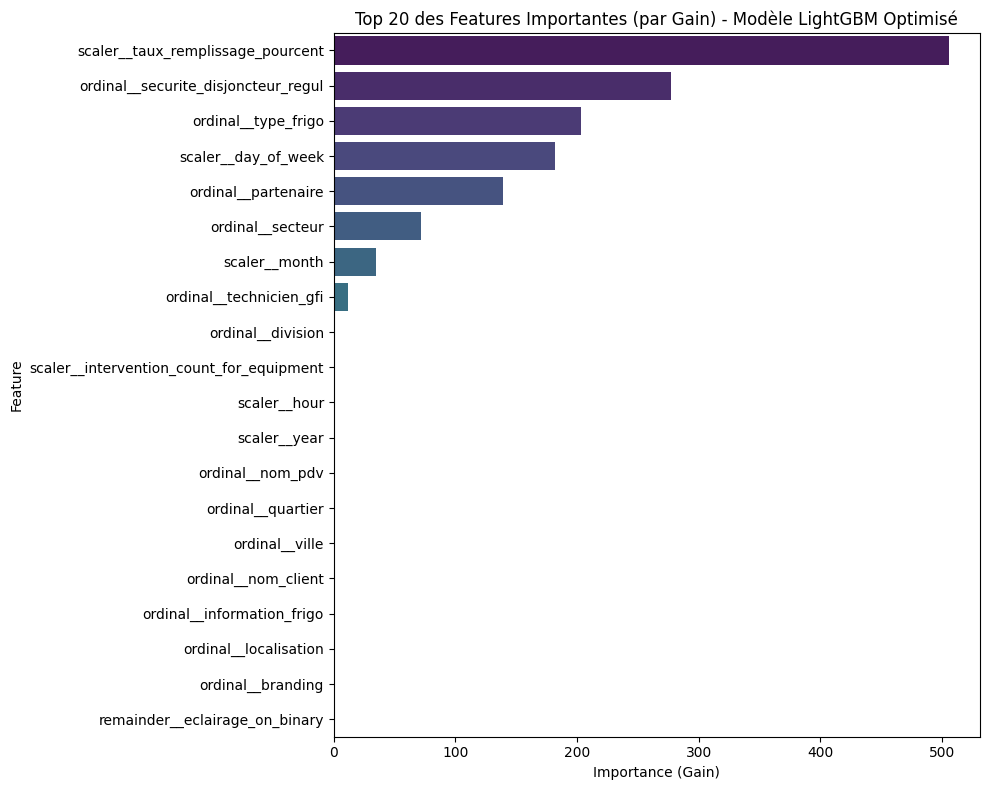

In [ ]:
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Souvent utilisé avec matplotlib pour de meilleurs graphiques
import pandas as pd # Pour manipuler les noms de features

# Assurez-vous que best_pipeline_refined est défini et entraîné
# (Cela devrait être le cas après l'exécution réussie de la cellule RandomizedSearchCV affinée)
if 'best_pipeline_refined' in locals() and best_pipeline_refined is not None:
    print("\n--- Analyse de l'Importance des Features du Meilleur Modèle ---")

    # Accéder au modèle LightGBM à l'intérieur du pipeline
    # L'étape LightGBM dans le pipeline s'appelle 'lgbm'
    lgbm_model = best_pipeline_refined.named_steps['lgbm']

    # L'attribut feature_importances_ contient les scores d'importance
    importance_scores = lgbm_model.feature_importances_

    # Pour interpréter ces scores, nous avons besoin des NOMS des features correspondantes.
    # Le préprocesseur a transformé nos features originales.
    # Les noms des features après le préprocesseur sont nécessaires.

    # Accéder au préprocesseur dans le pipeline
    preprocessor_step = best_pipeline_refined.named_steps['preprocessor']

    # Le ColumnTransformer a une méthode pour obtenir les noms des features après transformation.
    # IMPORTANT : Cette méthode get_feature_names_out est disponible dans les versions récentes de scikit-learn (>= 1.0).
    # Si vous avez une version plus ancienne, cela peut être plus complexe.
    try:
        feature_names_processed = preprocessor_step.get_feature_names_out()
        print(f"✅ Récupéré les noms de features après prétraitement ({len(feature_names_processed)}).")

        # Assurez-vous que le nombre de scores d'importance correspond au nombre de features traitées
        if len(importance_scores) == len(feature_names_processed):
            print("✅ Nombre de scores d'importance correspond au nombre de features traitées.")
            # Créer un DataFrame pour faciliter l'analyse et le tri
            feature_importance_df = pd.DataFrame({
                'feature': feature_names_processed,
                'importance': importance_scores
            })

            # Trier par importance décroissante
            feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

            # Afficher les features les plus importantes
            print("\n--- Top 20 des Features les plus Importantes (par Gain) ---")
            display(feature_importance_df.head(20))

            # Visualiser l'importance des features
            plt.figure(figsize=(10, 8))
            sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis') # Top 20
            plt.title('Top 20 des Features Importantes (par Gain) - Modèle LightGBM Optimisé')
            plt.xlabel('Importance (Gain)')
            plt.ylabel('Feature')
            plt.tight_layout() # Ajuste l'espace pour éviter que les labels se chevauchent
            plt.show()

        else:
            print(f"❌ Erreur : Le nombre de scores d'importance ({len(importance_scores)}) ne correspond pas au nombre de features après prétraitement ({len(feature_names_processed)}).")
            print("Cela peut indiquer un problème dans la correspondance entre le modèle et le préprocesseur.")

    except AttributeError:
        print("\n❌ Erreur : La méthode 'get_feature_names_out' n'est pas disponible.")
        print("Votre version de scikit-learn pourrait être trop ancienne. Les noms des features ne peuvent pas être facilement récupérés.")
        print("Importance scores (raw):", importance_scores)
        # Dans ce cas, on peut afficher les scores sans les noms correspondants, ou essayer de reconstruire les noms manuellement (plus complexe).
        # Pour l'instant, si get_feature_names_out n'est pas dispo, on affiche juste les scores bruts.
    except Exception as e:
        print(f"❌ Une erreur inattendue est survenue lors de l'analyse de l'importance des features : {e}")


else:
    print("❌ Le meilleur pipeline (best_pipeline_refined) n'a pas été trouvé.")
    print("Veuillez exécuter la dernière cellule d'optimisation RandomizedSearchCV.")